<div><center><img src="iscte.png" style="width: 190px;" align="center"></center></div>

<div style="border:3x; border-style:solid; border-color:#000000; padding: 1em;color:#003380">    
   <img src="Starbucks.jpg" style="width: 400px;height:155px" align="left">
    <div style="background-color: #fffff; padding: 2px; border-radius: 2px;">
 <div><center><h2 style="color: #000000">Estudo para a Starbucks </h2></center></div>
 <div><center><h4 style="color: #000000">Grupo 11</h4></center></div>
 <div><center><h4 style="color: #000000">Métodos de Aprendizagem Não Supervisionada</h4></center>
 <div><center><h4 style="color: #000000">2º Semestre 2021/2022</h4>  </center></div>  </div>

 <br>

       
    

### Trabalho realizado por:

* Luís Pereira nº98398
* Maria Pais nº98263
* Mariana Semedo nº98322
* Sebastião Rosalino nº98437

### Informação geral sobre o dataset:

* O dataset contém dados relativos às várias bebidas do catálogo do Starbucks, juntamente com a sua informação nutricional.

### Formulação do problema

A Starbucks é uma empresa norte-americana multinacional que se apresenta como uma das maiores cadeias de cafetarias 
no mundo. Criada em 1971 por Jerry Baldwin, Zev Siegl e Gordon Bowker em Seattle com a abertura de uma simples 
cafetaria, a empresa encontra-se atualmente com quase 30.000 lojas por todo o mundo.

A Starbucks pretende disponibilizar aos seus clientes um catálogo das diversas bebidas que serve tendo em conta as várias características nutricionais das mesmas. Para isso, foi solicitado um estudo detalhado a partir de um conjunto de dados disponibilizado pela própria empresa. O objetivo deste estudo será agrupar as bebidas de acordo com os seus valores nutricionais, tornando mais fácil a sua categorização num futuro catálogo disponível em versão física ou digital (na sua aplicação), aumentando a organização e facilitando a procura consoante as preferências individuais.


### Descrição das variáveis:

|Coluna    | Tipo| Descrição | Utilização|
|:---:|:---:| :---:| :---:|
| **Beverage_category** |String| Categoria da bebida | Variável de PROFILE|
| **Beverage** | String| Nome da bebida | Não utilizada |
| **Beverage_prep** | String | Preparação da bebida | Variável de PROFILE (modificada)|
| **Calories** | Integer | Calorias presentes na bebida | Variável de INPUT|
| **Total Fat (g)**  | Float | Gordura total (em g) | Variável de INPUT|
| **Trans Fat (g)** | Float | Gordura trans (produzida a partir de gorduras vegetais) em g |Variável de INPUT|
| **Saturated Fat (g)** | Float | Gordura saturada (em g)| Variável de INPUT|
| **Sodium (mg)** | Float| Quantidade de sódio (em mg) | Variável de INPUT|
| **Total Carbohydrates (g)** |Float| Total de hidratos de carbono (em g) | Váriavel de INPUT|
| **Cholesterol (mg)** | Float | Colesterol (em mg) | Variável de INPUT|
| **Dietary Fibre (g)** |Float | Fibra diatética (em g)| Variável de INPUT|
| **Sugars (g)** | Float | Açúcares (em g) | Variável de INPUT|
| **Protein (g)** | Float |  Proteína (em g) | Variável de INPUT|
| **Vitamin A (% DV)** | Integer |% de vitamina A | Variável de INPUT|
|**Vitamin C (% DV)**| Integer| % de vitamina C| Variável de INPUT|
|**Calcium (% DV)**|Integer| % de cálcio | Variável de INPUT|
|**Iron (% DV)**|Integer| % de ferro | Variável de INPUT|
|**Caffeine (mg)**|Integer| % de cafeína em mg | Variável de INPUT|

### Importação das bibliotecas necessárias

In [2]:
library(psych)
library(corrplot)
library(cluster)
library(tidyverse)
library(caret)
library(factoextra)
library(mclust)

options(repr.plot.width=6, repr.plot.height=6)

### Importação do dataset

In [3]:
starbucks <- read.csv("starbucks_drinkMenu_expanded.csv")
head(starbucks)

Beverage_category,Beverage,Beverage_prep,Calories,Total.Fat..g.,Trans.Fat..g.,Saturated.Fat..g.,Sodium..mg.,Total.Carbohydrates..g.,Cholesterol..mg.,Dietary.Fibre..g.,Sugars..g.,Protein..g.,Vitamin.A....DV.,Vitamin.C....DV.,Calcium....DV.,Iron....DV.,Caffeine..mg.
Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
Classic Espresso Drinks,CaffÃ¨ Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
Classic Espresso Drinks,CaffÃ¨ Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75


In [4]:
starbucks_final <- starbucks

In [5]:
# Informações estruturais básicas do dataset
str(starbucks)

'data.frame':	242 obs. of  18 variables:
 $ Beverage_category      : Factor w/ 9 levels "Classic Espresso Drinks",..: 2 2 2 2 1 1 1 1 1 1 ...
 $ Beverage               : Factor w/ 33 levels "Banana Chocolate Smoothie",..: 2 2 2 2 4 4 4 4 4 4 ...
 $ Beverage_prep          : Factor w/ 13 levels "2% Milk","Doppio",..: 5 9 3 11 6 1 8 10 1 8 ...
 $ Calories               : int  3 4 5 5 70 100 70 100 150 110 ...
 $ Total.Fat..g.          : Factor w/ 24 levels "0","0.1","0.2",..: 2 2 2 2 2 17 14 3 21 19 ...
 $ Trans.Fat..g.          : num  0 0 0 0 0.1 2 0.4 0.2 3 0.5 ...
 $ Saturated.Fat..g.      : num  0 0 0 0 0 0.1 0 0 0.2 0 ...
 $ Sodium..mg.            : int  0 0 0 0 5 15 0 5 25 0 ...
 $ Total.Carbohydrates..g.: int  5 10 10 10 75 85 65 120 135 105 ...
 $ Cholesterol..mg.       : int  0 0 0 0 10 10 6 15 15 10 ...
 $ Dietary.Fibre..g.      : int  0 0 0 0 0 0 1 0 0 1 ...
 $ Sugars..g.             : int  0 0 0 0 9 9 4 14 14 6 ...
 $ Protein..g.            : num  0.3 0.5 1 1 6 6 5 10 10 8 ...

In [6]:
# Mudar os nomes das variáveis para facilitar o acesso às mesmas:
colnames(starbucks)[which(names(starbucks) == "Total.Fat..g.")] <- "Total_Fat"
colnames(starbucks)[which(names(starbucks) == "Trans.Fat..g.")] <- "Trans_Fat"
colnames(starbucks)[which(names(starbucks) == "Saturated.Fat..g.")] <- "Saturated_Fat"
colnames(starbucks)[which(names(starbucks) == "Sodium..mg.")] <- "Sodium"
colnames(starbucks)[which(names(starbucks) == "Total.Carbohydrates..g.")] <- "Total_Carbs"
colnames(starbucks)[which(names(starbucks) == "Cholesterol..mg.")] <- "Chol"
colnames(starbucks)[which(names(starbucks) == "Dietary.Fibre..g.")] <- "Dietary_Fibre"
colnames(starbucks)[which(names(starbucks) == "Sugars..g.")] <- "Sugars"
colnames(starbucks)[which(names(starbucks) == "Protein..g.")] <- "Protein"
colnames(starbucks)[which(names(starbucks) == "Vitamin.A....DV.")] <- "VitA"
colnames(starbucks)[which(names(starbucks) == "Vitamin.C....DV.")] <- "VitC"
colnames(starbucks)[which(names(starbucks) == "Iron....DV.")] <- "Iron"
colnames(starbucks)[which(names(starbucks) == "Calcium....DV.")] <- "Calcium"
colnames(starbucks)[which(names(starbucks) == "Caffeine..mg.")] <- "Caffeine"

In [7]:
# Confirmação das alterações efetuadas
str(starbucks)

'data.frame':	242 obs. of  18 variables:
 $ Beverage_category: Factor w/ 9 levels "Classic Espresso Drinks",..: 2 2 2 2 1 1 1 1 1 1 ...
 $ Beverage         : Factor w/ 33 levels "Banana Chocolate Smoothie",..: 2 2 2 2 4 4 4 4 4 4 ...
 $ Beverage_prep    : Factor w/ 13 levels "2% Milk","Doppio",..: 5 9 3 11 6 1 8 10 1 8 ...
 $ Calories         : int  3 4 5 5 70 100 70 100 150 110 ...
 $ Total_Fat        : Factor w/ 24 levels "0","0.1","0.2",..: 2 2 2 2 2 17 14 3 21 19 ...
 $ Trans_Fat        : num  0 0 0 0 0.1 2 0.4 0.2 3 0.5 ...
 $ Saturated_Fat    : num  0 0 0 0 0 0.1 0 0 0.2 0 ...
 $ Sodium           : int  0 0 0 0 5 15 0 5 25 0 ...
 $ Total_Carbs      : int  5 10 10 10 75 85 65 120 135 105 ...
 $ Chol             : int  0 0 0 0 10 10 6 15 15 10 ...
 $ Dietary_Fibre    : int  0 0 0 0 0 0 1 0 0 1 ...
 $ Sugars           : int  0 0 0 0 9 9 4 14 14 6 ...
 $ Protein          : num  0.3 0.5 1 1 6 6 5 10 10 8 ...
 $ VitA             : Factor w/ 11 levels "0%","10%","15%",..: 1 1 1 1 2 2 10

In [8]:
# Transformar as variáveis que se encontram em percentagem (%):
starbucks$VitA <- as.numeric(sub("%","",as.character(starbucks$VitA),fixed=TRUE)) /100
starbucks$VitC <- as.numeric(sub("%","",as.character(starbucks$VitC),fixed=TRUE)) /100
starbucks$Calcium <- as.numeric(sub("%","",as.character(starbucks$Calcium),fixed=TRUE))/100
starbucks$Iron <- as.numeric(sub("%","",as.character(starbucks$Iron),fixed=TRUE))/100

In [9]:
# Verificação das alterações
head(starbucks)

Beverage_category,Beverage,Beverage_prep,Calories,Total_Fat,Trans_Fat,Saturated_Fat,Sodium,Total_Carbs,Chol,Dietary_Fibre,Sugars,Protein,VitA,VitC,Calcium,Iron,Caffeine
Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0,0.00,0,175
Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0,0.00,0,260
Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0,0.00,0,330
Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0,0.02,0,410
Classic Espresso Drinks,CaffÃ¨ Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,0.1,0,0.20,0,75
Classic Espresso Drinks,CaffÃ¨ Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,0.1,0,0.20,0,75


### Alterações e preenchimento de dados necessários

In [10]:
# Variável Caffeine que seria de INPUT encontra-se em factor. Nota-se que os levels não se encontram ordenados,não sendo 
# interpretados de maneira correta.  
levels(starbucks$Caffeine)

[1] ""       "0"      "10"     "100"    "105"    "110"    "120"    "125"   
 [9] "130"    "140"    "145"    "15"     "150"    "165"    "170"    "175"   
[17] "180"    "20"     "225"    "235"    "25"     "260"    "30"     "300"   
[25] "330"    "410"    "50"     "55"     "65"     "70"     "75"     "80"    
[33] "85"     "90"     "95"     "varies" "Varies"

In [11]:
# Antes de converter a numérica, imputam-se valores nos valores nulos level=""
starbucks$Caffeine[which(starbucks$Caffeine=="")]=125

In [12]:
# Também se recorre à imputação nos levels="varies" e "Varies" após pesquisa
starbucks$Caffeine[which(starbucks$Caffeine=="varies")]=30
starbucks$Caffeine[which(starbucks$Caffeine=="Varies")]=30

In [13]:
# Conversão a numérica:
starbucks$Caffeine = as.numeric(as.character(starbucks$Caffeine))

In [14]:
# A variável Total_Fat também se encontra em factor. 
levels(starbucks$Total_Fat)

[1] "0"   "0.1" "0.2" "0.3" "0.4" "0.5" "1"   "1.5" "10"  "11"  "13"  "15" 
[13] "2"   "2.5" "3"   "3 2" "3.5" "4"   "4.5" "5"   "6"   "7"   "8"   "9"

In [15]:
# Nota-se um erro de inserção em "3 2" 
starbucks$Total_Fat= as.character(starbucks$Total_Fat)

In [16]:
# Correção do erro:
starbucks$Total_Fat[which(starbucks$Total_Fat=="3 2")]="3.2"

In [17]:
# Conversão a numérica
starbucks$Total_Fat = as.numeric(starbucks$Total_Fat)

### Variáveis de PROFILE

In [18]:
table(starbucks$Beverage_category)


           Classic Espresso Drinks                             Coffee 
                                58                                  4 
      FrappuccinoÂ® Blended Coffee       FrappuccinoÂ® Blended CrÃ¨me 
                                36                                 13 
FrappuccinoÂ® Light Blended Coffee              Shaken Iced Beverages 
                                12                                 18 
         Signature Espresso Drinks                          Smoothies 
                                40                                  9 
                 TazoÂ® Tea Drinks 
                                52 

In [19]:
# Alteração dos nomes das várias categorias em nomes mais simples (facilita a legibilidade):
starbucks$Beverage_cat_new[starbucks$Beverage_category=="Classic Espresso Drinks"]="C_Espresso"
starbucks$Beverage_cat_new[starbucks$Beverage_category=="FrappuccinoÂ® Blended Coffee"]="FrapCoffee"
starbucks$Beverage_cat_new[starbucks$Beverage_category=="FrappuccinoÂ® Light Blended Coffee"]="FrapLight"
starbucks$Beverage_cat_new[starbucks$Beverage_category=="Signature Espresso Drinks"]="S_Espresso"
starbucks$Beverage_cat_new[starbucks$Beverage_category=="TazoÂ® Tea Drinks"]="Tea"
starbucks$Beverage_cat_new[starbucks$Beverage_category=="Coffee"]="Coffee"
starbucks$Beverage_cat_new[starbucks$Beverage_category=="FrappuccinoÂ® Blended CrÃ¨me"]="FrapCréme"
starbucks$Beverage_cat_new[starbucks$Beverage_category=="Shaken Iced Beverages"]="IcedBev"
starbucks$Beverage_cat_new[starbucks$Beverage_category=="Smoothies"]="Smoothies"

In [20]:
table(starbucks$Beverage_cat_new)


C_Espresso     Coffee FrapCoffee  FrapCréme  FrapLight    IcedBev S_Espresso 
        58          4         36         13         12         18         40 
 Smoothies        Tea 
         9         52 

In [21]:
table(starbucks$Beverage_prep)


           2% Milk             Doppio             Grande Grande Nonfat Milk 
                50                  1                  7                 26 
             Short  Short Nonfat Milk               Solo            Soymilk 
                 4                 12                  1                 66 
              Tall   Tall Nonfat Milk              Venti  Venti Nonfat Milk 
                 7                 23                  7                 22 
        Whole Milk 
                16 

In [22]:
# Atribuição de uma categoria mais geral a cada tipo de leite usado na preparação da bebida, também para facilitar a legibilidade.
no_milk <- c("Doppio","Grande","Short","Solo","Tall","Venti")
nonfat <- c("Grande Nonfat Milk","Short Nonfat Milk","Tall Nonfat Milk","Venti Nonfat Milk")
starbucks$Beverage_prep = as.character(starbucks$Beverage_prep)
starbucks$Beverage_prep[starbucks$Beverage_prep %in% no_milk] = "No Milk" 
starbucks$Beverage_prep[starbucks$Beverage_prep %in% nonfat] = "Nonfat Milk" 

In [23]:
table(starbucks$Beverage_prep)


    2% Milk     No Milk Nonfat Milk     Soymilk  Whole Milk 
         50          27          83          66          16 

In [24]:
# Remoção das variáveis não importantes para análise
starbucks = starbucks[,-2]

In [25]:
head(starbucks)

Beverage_category,Beverage_prep,Calories,Total_Fat,Trans_Fat,Saturated_Fat,Sodium,Total_Carbs,Chol,Dietary_Fibre,Sugars,Protein,VitA,VitC,Calcium,Iron,Caffeine,Beverage_cat_new
Coffee,No Milk,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0,0.00,0,175,Coffee
Coffee,No Milk,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0,0.00,0,260,Coffee
Coffee,No Milk,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0,0.00,0,330,Coffee
Coffee,No Milk,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0,0.02,0,410,Coffee
Classic Espresso Drinks,Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,0.1,0,0.20,0,75,C_Espresso
Classic Espresso Drinks,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,0.1,0,0.20,0,75,C_Espresso


### Início da análise:

In [26]:
# Informações estruturais básicas
str(starbucks)

'data.frame':	242 obs. of  18 variables:
 $ Beverage_category: Factor w/ 9 levels "Classic Espresso Drinks",..: 2 2 2 2 1 1 1 1 1 1 ...
 $ Beverage_prep    : chr  "No Milk" "No Milk" "No Milk" "No Milk" ...
 $ Calories         : int  3 4 5 5 70 100 70 100 150 110 ...
 $ Total_Fat        : num  0.1 0.1 0.1 0.1 0.1 3.5 2.5 0.2 6 4.5 ...
 $ Trans_Fat        : num  0 0 0 0 0.1 2 0.4 0.2 3 0.5 ...
 $ Saturated_Fat    : num  0 0 0 0 0 0.1 0 0 0.2 0 ...
 $ Sodium           : int  0 0 0 0 5 15 0 5 25 0 ...
 $ Total_Carbs      : int  5 10 10 10 75 85 65 120 135 105 ...
 $ Chol             : int  0 0 0 0 10 10 6 15 15 10 ...
 $ Dietary_Fibre    : int  0 0 0 0 0 0 1 0 0 1 ...
 $ Sugars           : int  0 0 0 0 9 9 4 14 14 6 ...
 $ Protein          : num  0.3 0.5 1 1 6 6 5 10 10 8 ...
 $ VitA             : num  0 0 0 0 0.1 0.1 0.06 0.15 0.15 0.1 ...
 $ VitC             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Calcium          : num  0 0 0 0.02 0.2 0.2 0.2 0.3 0.3 0.3 ...
 $ Iron             : num  0 0 0 

In [27]:
# estatísticas descritivas básicas das variáveis.
summary(starbucks)

                    Beverage_category Beverage_prep         Calories    
 Classic Espresso Drinks     :58      Length:242         Min.   :  0.0  
 TazoÂ® Tea Drinks           :52      Class :character   1st Qu.:120.0  
 Signature Espresso Drinks   :40      Mode  :character   Median :185.0  
 FrappuccinoÂ® Blended Coffee:36                         Mean   :193.9  
 Shaken Iced Beverages       :18                         3rd Qu.:260.0  
 FrappuccinoÂ® Blended CrÃ¨me:13                         Max.   :510.0  
 (Other)                     :25                                        
   Total_Fat        Trans_Fat     Saturated_Fat        Sodium      
 Min.   : 0.000   Min.   :0.000   Min.   :0.0000   Min.   : 0.000  
 1st Qu.: 0.200   1st Qu.:0.100   1st Qu.:0.0000   1st Qu.: 0.000  
 Median : 2.500   Median :0.500   Median :0.0000   Median : 5.000  
 Mean   : 2.905   Mean   :1.307   Mean   :0.0376   Mean   : 6.364  
 3rd Qu.: 4.500   3rd Qu.:2.000   3rd Qu.:0.1000   3rd Qu.:10.000  
 Max.   

Uma vez que as bebidas que não têm quaisquer valores nutricionais são os chás, achou-se importante manter esta informação no dataset para que fossem agrupados corretamente.

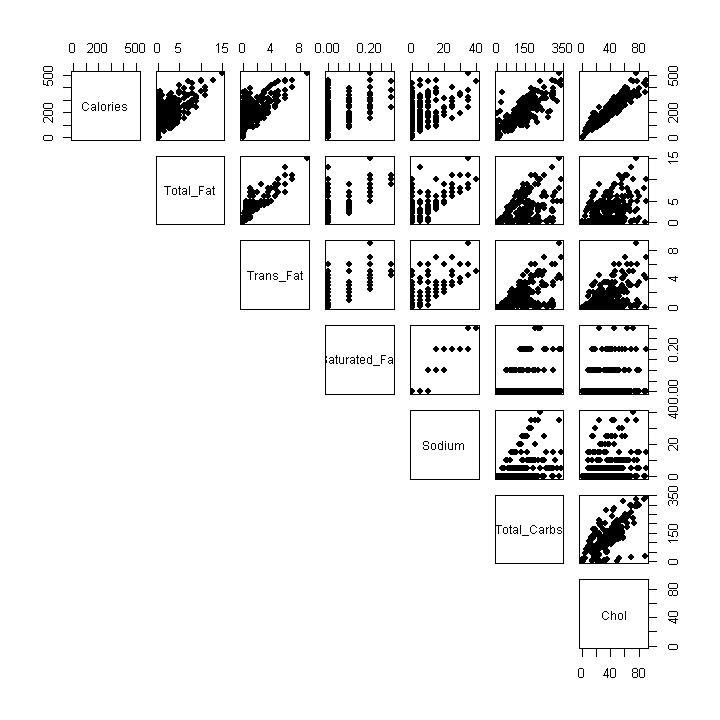

In [28]:
# scatterplot
pairs(starbucks[,3:9], pch = 19, lower.panel = NULL)

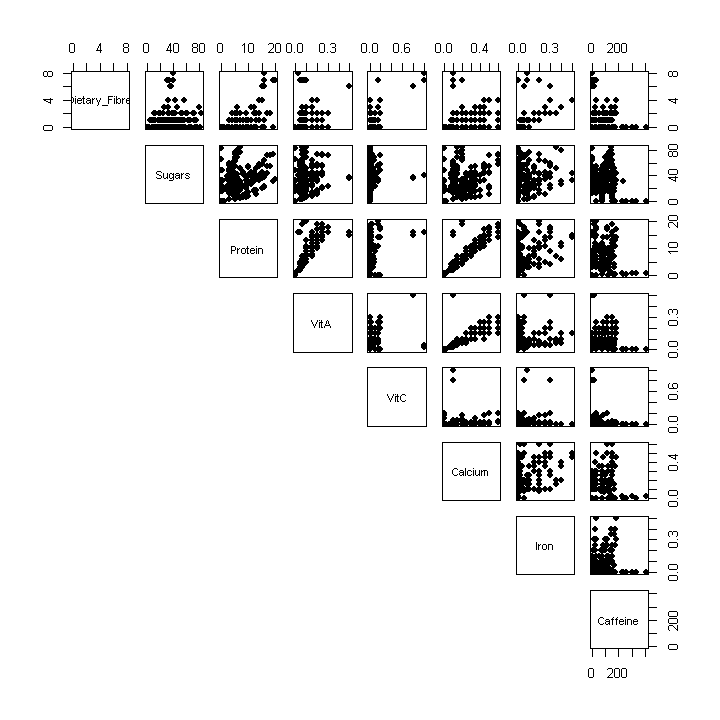

In [29]:
pairs(starbucks[,10:17], pch = 19, lower.panel = NULL)

In [30]:
# Matriz de correlações das variáveis numéricas
correlation <- cor(starbucks[,-c(1,2,18)])
correlation

,Calories,Total_Fat,Trans_Fat,Saturated_Fat,Sodium,Total_Carbs,Chol,Dietary_Fibre,Sugars,Protein,VitA,VitC,Calcium,Iron,Caffeine
Calories,1.00000000,0.63278473,0.64281765,0.33104679,0.38789152,0.79503711,0.94003442,0.38429249,0.90967543,0.57845312,0.40682034,0.21543337,0.51872009,0.42715339,0.01450136
Total_Fat,0.63278473,1.00000000,0.89017507,0.61926444,0.58717712,0.44954571,0.37271295,0.25938024,0.33044267,0.55047984,0.32086953,-0.02939119,0.61974875,0.51217471,0.14922525
Trans_Fat,0.64281765,0.89017507,1.00000000,0.69487106,0.70779393,0.52417633,0.43981077,0.13126682,0.41988689,0.49631703,0.30529344,-0.04823792,0.48949374,0.34488042,0.17048458
Saturated_Fat,0.33104679,0.61926444,0.69487106,1.00000000,0.92007663,0.23814198,0.16179148,-0.09378275,0.17925548,0.28753163,0.25155664,-0.04314608,0.28709686,-0.06686298,0.03614737
Sodium,0.38789152,0.58717712,0.70779393,0.92007663,1.00000000,0.29029477,0.19947701,-0.06015450,0.20596872,0.49623281,0.45900149,0.02386700,0.46205196,-0.10120130,0.07889892
Total_Carbs,0.79503711,0.44954571,0.52417633,0.23814198,0.29029477,1.00000000,0.76665361,0.17337831,0.77140652,0.41062928,0.31168662,0.01662312,0.40488746,0.30675738,0.14344928
Chol,0.94003442,0.37271295,0.43981077,0.16179148,0.19947701,0.76665361,1.00000000,0.34204014,0.98419582,0.36044876,0.24282093,0.22385176,0.26357372,0.35625742,-0.05511641
Dietary_Fibre,0.38429249,0.25938024,0.13126682,-0.09378275,-0.06015450,0.17337831,0.34204014,1.00000000,0.18417051,0.54027374,0.28067340,0.70926695,0.14731633,0.58451874,-0.15255119
Sugars,0.90967543,0.33044267,0.41988689,0.17925548,0.20596872,0.77140652,0.98419582,0.18417051,1.00000000,0.26306079,0.18873799,0.11891799,0.23603984,0.26041429,-0.04640248
Protein,0.57845312,0.55047984,0.49631703,0.28753163,0.49623281,0.41062928,0.36044876,0.54027374,0.26306079,1.00000000,0.79979602,0.36099713,0.83994155,0.35841264,0.07127602


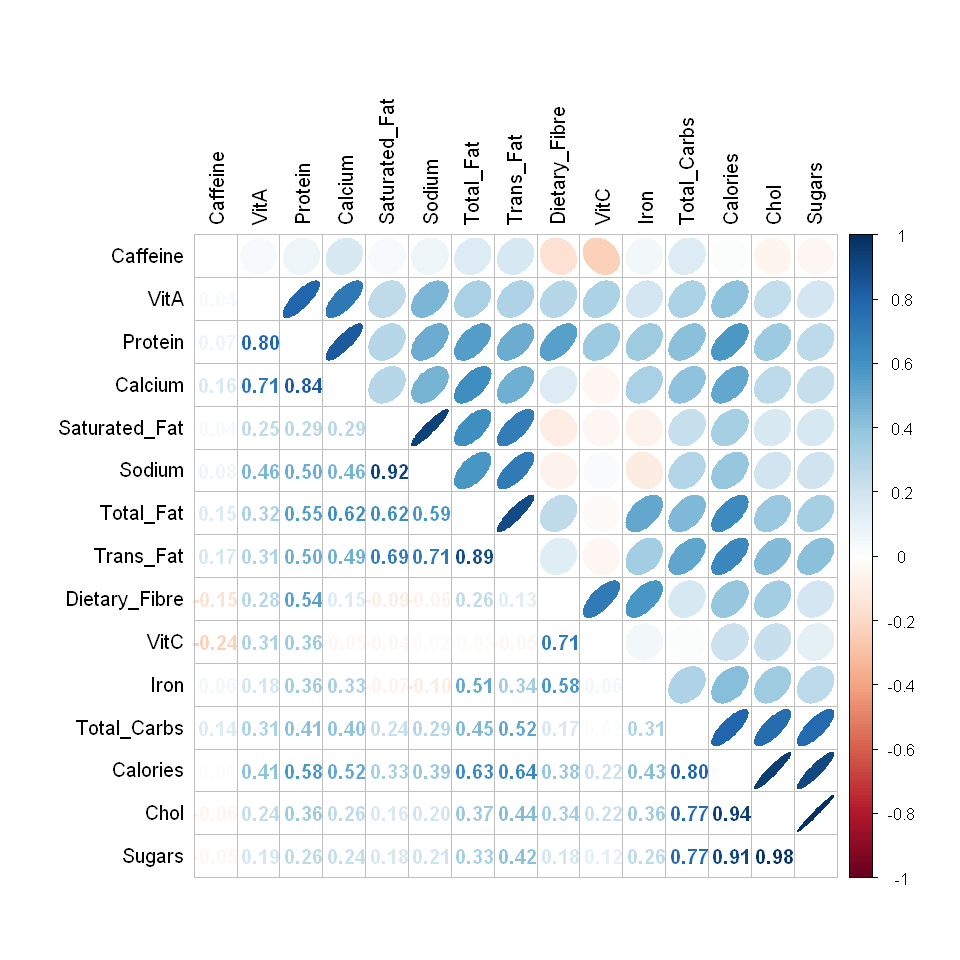

In [31]:
options(repr.plot.width=8, repr.plot.height=8)
par(oma = c(2, 1, 2, 1))  
corrplot.mixed(correlation,order = "hclust", tl.pos = "lt",tl.col = "black", upper = "ellipse")

Existem correlações muito elevadas entre as variáveis pelo que se pode presumir a adequabilidade da utilização de PCA

### Aplicação do PCA- Análise das componentes principais

In [32]:
cortest.bartlett(correlation)

Warning message in cortest.bartlett(correlation):
"n not specified, 100 used"

$chisq
[1] 2482.304

$p.value
[1] 0

$df
[1] 105

Com base no teste de Bartlett, uma vez que o p-value é inferior a 0.05 rejeita-se H0. Isto significa que poderá ser adequado utilizar o PCA sobre as variáveis do dataset.

In [33]:
KMO(correlation)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = correlation)
Overall MSA =  0.66
MSA for each item = 
     Calories     Total_Fat     Trans_Fat Saturated_Fat        Sodium 
         0.75          0.64          0.68          0.67          0.74 
  Total_Carbs          Chol Dietary_Fibre        Sugars       Protein 
         0.90          0.65          0.59          0.62          0.60 
         VitA          VitC       Calcium          Iron      Caffeine 
         0.82          0.60          0.55          0.51          0.56 

O valor do KMO é 0.66 logo este valor é considerado medíocre, mas é adequada a utilização do PCA

#### Estandardização dos dados

In [34]:
starbucks_est <- scale(starbucks[,-c(1,2,18)])

In [35]:
head(starbucks_est)

Calories,Total_Fat,Trans_Fat,Saturated_Fat,Sodium,Total_Carbs,Chol,Dietary_Fibre,Sugars,Protein,VitA,VitC,Calcium,Iron,Caffeine
-1.8555879,-0.9526495,-0.7968407,-0.5268282,-0.7373635,-1.5052181,-1.730772,-0.5572726,-1.670678,-1.3708907,-1.2139571,-0.2530032,-1.42729398,-0.7100848,1.4188208
-1.8458663,-0.9526495,-0.7968407,-0.5268282,-0.7373635,-1.4444671,-1.730772,-0.5572726,-1.670678,-1.3298369,-1.2139571,-0.2530032,-1.42729398,-0.7100848,2.7478346
-1.8361446,-0.9526495,-0.7968407,-0.5268282,-0.7373635,-1.4444671,-1.730772,-0.5572726,-1.670678,-1.2272025,-1.2139571,-0.2530032,-1.42729398,-0.7100848,3.8423165
-1.8361446,-0.9526495,-0.7968407,-0.5268282,-0.7373635,-1.4444671,-1.730772,-0.5572726,-1.670678,-1.2272025,-1.2139571,-0.2530032,-1.28976456,-0.7100848,5.0931530
-1.2042380,-0.9526495,-0.7358747,-0.5268282,-0.1580065,-0.6547046,-1.249892,-0.5572726,-1.214524,-0.2008581,0.0209215,-0.2530032,-0.05199976,-0.7100848,-0.1447249
-0.9125888,0.2020942,0.4224792,0.8741874,1.0007076,-0.5332027,-1.249892,-0.5572726,-1.214524,-0.2008581,0.0209215,-0.2530032,-0.05199976,-0.7100848,-0.1447249


In [36]:
# Assumir que o nº de componentes = nº de variáveis (15)
pc15 <- principal(starbucks_est, nfactors=15, rotate="none", scores=TRUE)

In [37]:
#Valores próprios- variâncias das componentes principais
round(pc15$values,3)

[1] 6.313 2.463 1.975 1.368 1.124 0.783 0.282 0.257 0.196 0.124 0.074 0.025
[13] 0.013 0.002 0.001

#### Screeplot

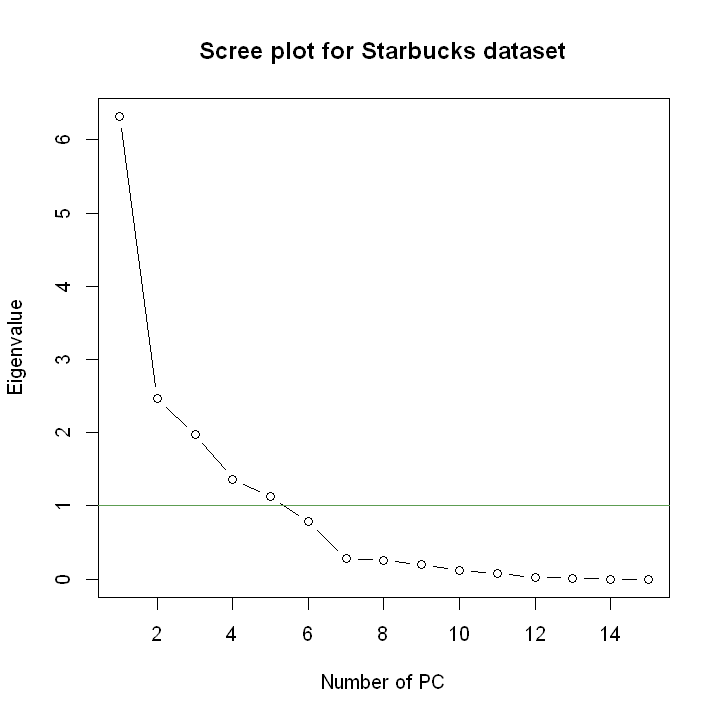

In [38]:
options(repr.plot.width=6, repr.plot.height=6)
plot(pc15$values, type = "b", main = "Scree plot for Starbucks dataset", xlab = "Number of PC", ylab = "Eigenvalue")
abline(h=1,col="#5D9D52FF")

In [39]:
round(pc15$values,3)

[1] 6.313 2.463 1.975 1.368 1.124 0.783 0.282 0.257 0.196 0.124 0.074 0.025
[13] 0.013 0.002 0.001

O critério de Kaiser dá a entender a necessidade de criação de 5 componentes principais enquanto que o scree plot sugere 6.

In [40]:
# Vetores Próprios - "Loadings" das componentes
pc15$loadings


Loadings:
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9   
Calories       0.910  0.255 -0.282                              0.100       
Total_Fat      0.801 -0.299         0.188  0.397        -0.173        -0.113
Trans_Fat      0.803 -0.377 -0.115         0.320        -0.101        -0.194
Saturated_Fat  0.538 -0.657        -0.389  0.246         0.155         0.113
Sodium         0.626 -0.639        -0.370                0.109         0.111
Total_Carbs    0.743  0.165 -0.419        -0.208               -0.427       
Chol           0.741  0.437 -0.457 -0.136                       0.139       
Dietary_Fibre  0.413  0.638  0.473         0.342  0.165                0.171
Sugars         0.690  0.358 -0.569 -0.153 -0.161                0.145       
Protein        0.781         0.534        -0.214        -0.105         0.138
VitA           0.610         0.531        -0.464         0.259        -0.208
VitC           0.211  0.540  0.490 -0.485         0.357          

É recomendado que os componentes principais expliquem pelo menos 60% da variância do dataset original, portanto poderiam ser utilizadas 5 ou 6 componentes.

In [41]:
pc5 <- principal(starbucks_est,nfactors=5,rotate="none")
pc5

Principal Components Analysis
Call: principal(r = starbucks_est, nfactors = 5, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
               PC1   PC2   PC3   PC4   PC5   h2    u2 com
Calories      0.91  0.26 -0.28 -0.05 -0.06 0.98 0.021 1.4
Total_Fat     0.80 -0.30  0.03  0.19  0.40 0.93 0.075 1.9
Trans_Fat     0.80 -0.38 -0.12  0.03  0.32 0.90 0.096 1.8
Saturated_Fat 0.54 -0.66 -0.03 -0.39  0.25 0.93 0.067 2.9
Sodium        0.63 -0.64  0.10 -0.37  0.02 0.95 0.053 2.6
Total_Carbs   0.74  0.16 -0.42  0.07 -0.21 0.80 0.197 1.9
Chol          0.74  0.44 -0.46 -0.14 -0.10 0.98 0.023 2.5
Dietary_Fibre 0.41  0.64  0.47 -0.02  0.34 0.92 0.081 3.3
Sugars        0.69  0.36 -0.57 -0.15 -0.16 0.98 0.022 2.7
Protein       0.78  0.03  0.53  0.08 -0.21 0.95 0.053 2.0
VitA          0.61 -0.05  0.53 -0.03 -0.46 0.87 0.127 2.9
VitC          0.21  0.54  0.49 -0.48  0.07 0.82 0.183 3.3
Calcium       0.71 -0.22  0.33  0.31 -0.33 0.87 0.129 2.6
Iron          0.48  0.3

In [42]:
# Solução com 5 PCs rodada
pc5r <- principal(starbucks_est, nfactors=5,rotate="varimax")
pc5r$loadings


Loadings:
              RC1    RC2    RC3    RC5    RC4   
Calories       0.863  0.287  0.283  0.252       
Total_Fat      0.256  0.713  0.242  0.520 -0.149
Trans_Fat      0.353  0.791  0.172  0.320 -0.145
Saturated_Fat         0.950        -0.127       
Sodium         0.110  0.881  0.344 -0.198       
Total_Carbs    0.833  0.163  0.226  0.111 -0.142
Chol           0.957                0.149  0.156
Dietary_Fibre  0.133         0.267  0.663  0.619
Sugars         0.980                            
Protein        0.202  0.256  0.858  0.279  0.162
VitA           0.134  0.151  0.902         0.133
VitC                         0.265  0.129  0.848
Calcium        0.192  0.269  0.815  0.191 -0.247
Iron           0.224         0.116  0.902       
Caffeine                     0.198  0.132 -0.658

                 RC1   RC2   RC3   RC5   RC4
SS loadings    3.691 3.117 2.762 1.929 1.744
Proportion Var 0.246 0.208 0.184 0.129 0.116
Cumulative Var 0.246 0.454 0.638 0.767 0.883

In [43]:
# Solução não rodada com 6 PCs
pc6 <- principal(starbucks_est, nfactors=6,rotate="none")
pc6

Principal Components Analysis
Call: principal(r = starbucks_est, nfactors = 6, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
               PC1   PC2   PC3   PC4   PC5   PC6   h2     u2 com
Calories      0.91  0.26 -0.28 -0.05 -0.06 -0.01 0.98 0.0205 1.4
Total_Fat     0.80 -0.30  0.03  0.19  0.40 -0.07 0.93 0.0701 1.9
Trans_Fat     0.80 -0.38 -0.12  0.03  0.32  0.04 0.91 0.0948 1.8
Saturated_Fat 0.54 -0.66 -0.03 -0.39  0.25  0.08 0.94 0.0606 3.0
Sodium        0.63 -0.64  0.10 -0.37  0.02  0.09 0.95 0.0457 2.7
Total_Carbs   0.74  0.16 -0.42  0.07 -0.21  0.06 0.81 0.1936 1.9
Chol          0.74  0.44 -0.46 -0.14 -0.10  0.02 0.98 0.0223 2.5
Dietary_Fibre 0.41  0.64  0.47 -0.02  0.34  0.17 0.95 0.0533 3.5
Sugars        0.69  0.36 -0.57 -0.15 -0.16 -0.01 0.98 0.0224 2.7
Protein       0.78  0.03  0.53  0.08 -0.21 -0.03 0.95 0.0522 2.0
VitA          0.61 -0.05  0.53 -0.03 -0.46 -0.07 0.88 0.1222 2.9
VitC          0.21  0.54  0.49 -0.48  0.07  0.36 0.94 0

In [44]:
# Solução rodada com 6 PCs
pc6r <- principal(starbucks_est, nfactors=6,rotate="varimax")
pc6r$loadings


Loadings:
              RC1    RC2    RC3    RC4    RC5    RC6   
Calories       0.863  0.281  0.278  0.146  0.240       
Total_Fat      0.252  0.688  0.266         0.560       
Trans_Fat      0.353  0.781  0.177         0.351  0.117
Saturated_Fat         0.956                            
Sodium         0.113  0.893  0.331        -0.185       
Total_Carbs    0.832  0.162  0.222         0.116  0.148
Chol           0.958                0.166  0.126       
Dietary_Fibre  0.142         0.169  0.799  0.501       
Sugars         0.980                                   
Protein        0.201  0.258  0.829  0.319  0.224       
VitA           0.132  0.155  0.886  0.218              
VitC                         0.115  0.950        -0.114
Calcium        0.181  0.237  0.870 -0.160  0.251       
Iron           0.217         0.142  0.117  0.907       
Caffeine                           -0.133         0.984

                 RC1   RC2   RC3   RC4   RC5   RC6
SS loadings    3.687 3.074 2.648 1.806 1.

|Componentes Principais|Variáveis| Descrição|
|:---:|:---:|:---:|
|**PC1**| Sugars, Chol, Calories| Hypercaloric drinks|
|**PC2**| Saturated_Fat, Sodium, Trans_Fat, Total_Fat| High in fat Drinks|
|**PC3**| Protein, VitA, Calcium | Vegetable Drinks (Soy Milk)|
|**PC4**| VitC, Fibra| Natural Juices|
|**PC5**| Iron,Fibra | Energetic Drinks|
|**PC6**| Caffeine| Coffee Drinks|




In [45]:
# Communalidades: constituem valores bons.
round(pc6r$communality,2)

Calories     Total_Fat     Trans_Fat Saturated_Fat        Sodium 
         0.98          0.93          0.91          0.94          0.95 
  Total_Carbs          Chol Dietary_Fibre        Sugars       Protein 
         0.81          0.98          0.95          0.98          0.95 
         VitA          VitC       Calcium          Iron      Caffeine 
         0.88          0.94          0.94          0.91          0.99

In [46]:
# Cálculo dos "scores" das variáveis
pc6scores <- principal(starbucks_est, nfactors = 6, rotate = "none", scores = TRUE)
round(pc6scores$scores,3)

PC1,PC2,PC3,PC4,PC5,PC6
-1.697,-0.620,0.226,0.604,0.561,1.613
-1.664,-0.775,0.159,1.187,0.335,2.819
-1.635,-0.906,0.133,1.668,0.145,3.807
-1.601,-1.069,0.096,2.244,-0.090,4.893
-0.935,-0.446,0.692,0.046,-0.600,-0.278
-0.350,-1.399,0.612,-0.489,0.428,-0.050
-0.900,-0.199,0.827,0.654,0.562,-0.382
-0.522,-0.376,0.907,0.208,-1.356,-0.548
0.506,-2.163,0.804,-0.921,0.422,-0.097
-0.408,-0.131,1.055,1.178,0.422,-0.839


In [47]:
# Adicionar as componentes principais na base de dados:
starbucks$hypercaloric = pc6scores$scores[,1]
starbucks$high_in_fat = pc6scores$scores[,2]
starbucks$veg = pc6scores$scores[,3]
starbucks$rich_in_vitc = pc6scores$scores[,4]
starbucks$energetic = pc6scores$scores[,5]
starbucks$caffeine = pc6scores$scores[,6]

In [48]:
head(starbucks)

Beverage_category,Beverage_prep,Calories,Total_Fat,Trans_Fat,Saturated_Fat,Sodium,Total_Carbs,Chol,Dietary_Fibre,...,Calcium,Iron,Caffeine,Beverage_cat_new,hypercaloric,high_in_fat,veg,rich_in_vitc,energetic,caffeine
Coffee,No Milk,3,0.1,0.0,0.0,0,5,0,0,...,0.00,0,175,Coffee,-1.6968842,-0.6202372,0.22628333,0.60441523,0.56072603,1.61302641
Coffee,No Milk,4,0.1,0.0,0.0,0,10,0,0,...,0.00,0,260,Coffee,-1.6642846,-0.7754303,0.15939572,1.18723706,0.33475794,2.81933242
Coffee,No Milk,5,0.1,0.0,0.0,0,10,0,0,...,0.00,0,330,Coffee,-1.6345694,-0.9056013,0.13329205,1.66831842,0.14474972,3.80686673
Coffee,No Milk,5,0.1,0.0,0.0,0,10,0,0,...,0.02,0,410,Coffee,-1.6012301,-1.0691237,0.09649615,2.24371142,-0.08967986,4.89349361
Classic Espresso Drinks,Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,...,0.20,0,75,C_Espresso,-0.9346405,-0.4461042,0.69158404,0.04618153,-0.60023566,-0.27801812
Classic Espresso Drinks,2% Milk,100,3.5,2.0,0.1,15,85,10,0,...,0.20,0,75,C_Espresso,-0.3501527,-1.3994790,0.61196339,-0.48947538,0.42783583,-0.05019443


### Clustering

#### Hierarchical cluster: standardized Euclidian complete

Tenta-se a implementação de 3 clusters.

In [49]:
pca_dist <- dist(starbucks[,19:24])

ERROR: Error in aggregate.data.frame(as.data.frame(x), ...): arguments must have same length


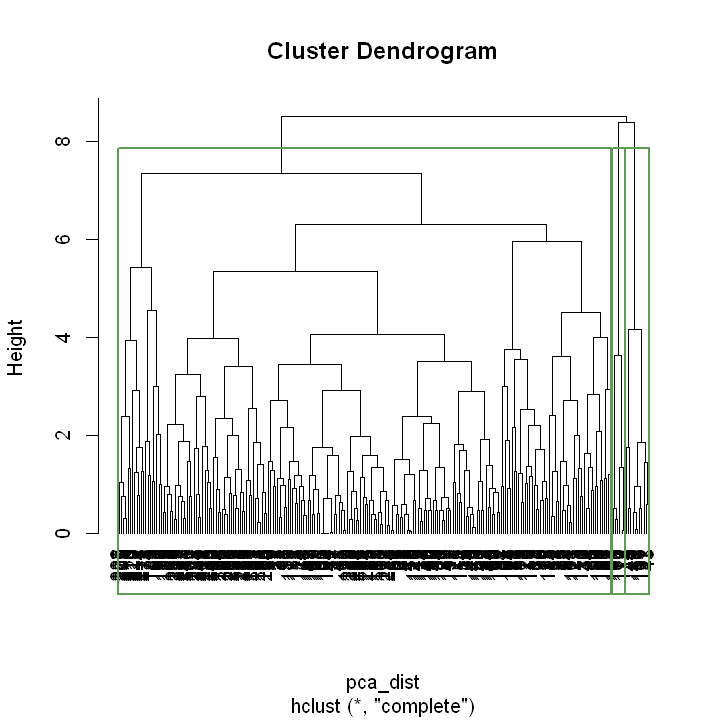

In [50]:
hclust_demo_c <- hclust(pca_dist,method='complete')
plot(hclust_demo_c,hang=-1)

par(lwd=2, mar=c(0,0,0,0))
groups.k3_comp <- cutree(hclust_demo_c, k=3) 
rect.hclust(hclust_demo_c, k=3, border="#5D9D52FF") 
aggregate(data,list(groups.k3_comp), mean)

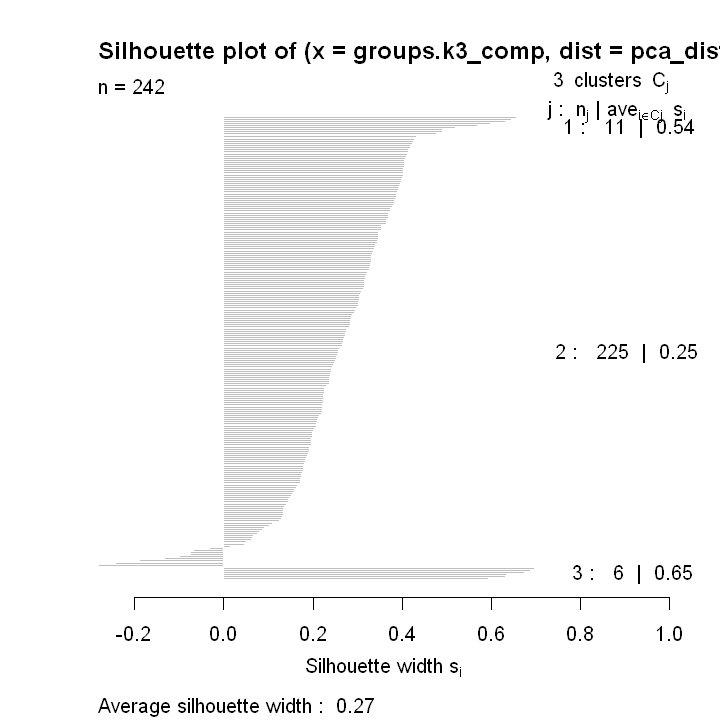

In [51]:
plot(silhouette(groups.k3_comp,pca_dist)) 

O plot indica estrutura fraca ("Average silhouette width"=0.27).

#### Hierarchical cluster: standardized Euclidian Ward algorithm

ERROR: Error in aggregate.data.frame(as.data.frame(x), ...): arguments must have same length


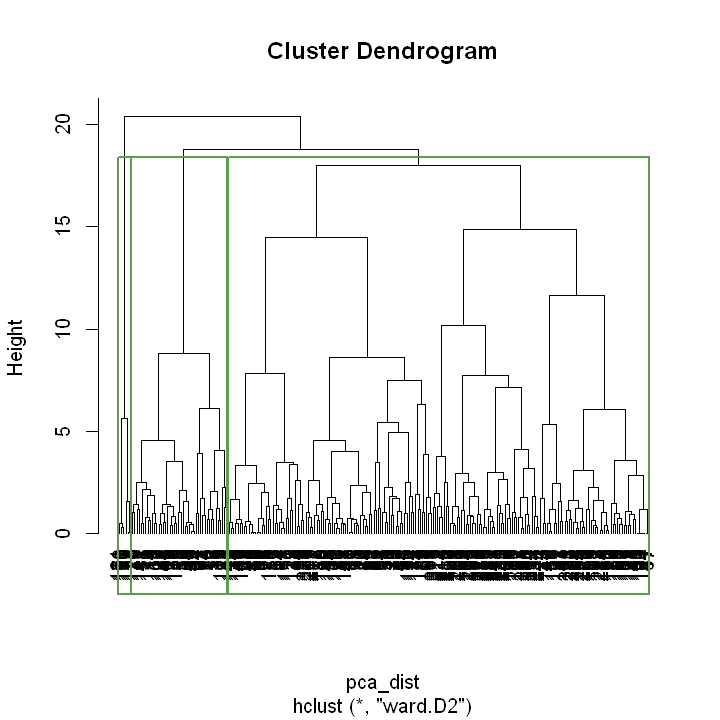

In [52]:
hclust_demo_w <- hclust(pca_dist,method='ward.D2')
plot(hclust_demo_w,hang=-1)

par(lwd=2, mar=c(0,0,0,0))
# Cut the dendrogram
groups.k3_w <- cutree(hclust_demo_w, k=3) 
rect.hclust(hclust_demo_w, k=3, border="#5D9D52FF") 
aggregate(data,list(groups.k3_w), mean)

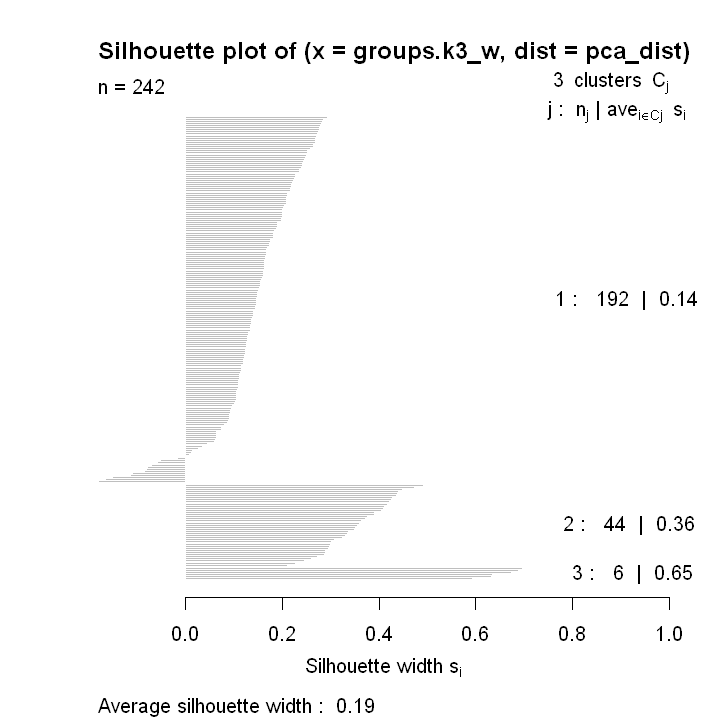

In [53]:
plot(silhouette(groups.k3_w,pca_dist)) 

O plot não indica qualquer estrutura nos dados. ("Average silhouette width"=0.19).

In [54]:
# Crosstable dos modelos:
table(groups.k3_comp,groups.k3_w)

              groups.k3_w
groups.k3_comp   1   2   3
             1  11   0   0
             2 181  44   0
             3   0   0   6

Os 2 métodos não representam o mesmo cluster porque existem valores fora da diagonal principal (ou seja, há discordância no agrupamento das observações)

### K-means

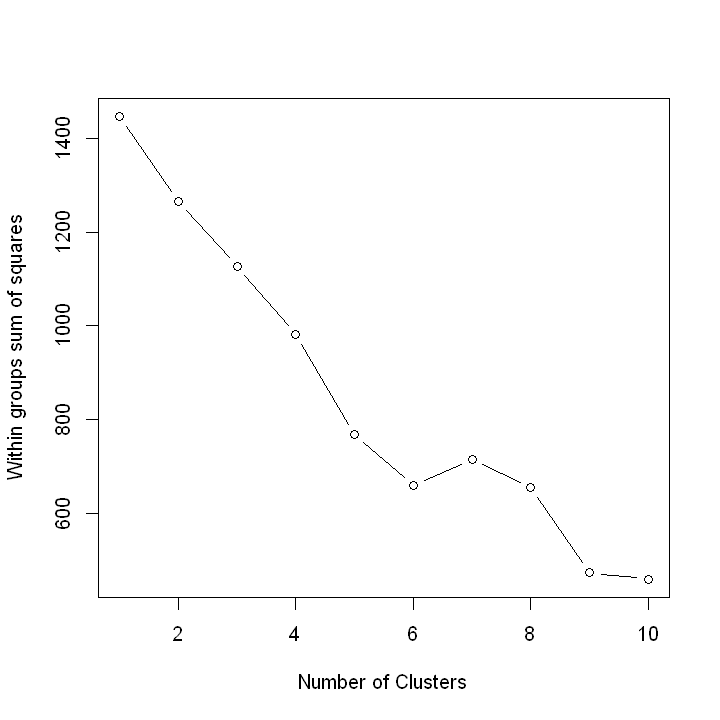

In [55]:
# K-Means: determinar o melhor nº de clusters:
wssplot <- function(xx, nc=15, seed=1234){
  wss <- (nrow(xx)-1)*sum(apply(xx,2,var))
  for (i in 2:nc){
    set.seed(seed)
    wss[i] <- sum(kmeans(xx, centers=i)$withinss)}
  plot(1:nc, wss, type="b", xlab="Number of Clusters",
       ylab="Within groups sum of squares")}

wssplot(starbucks[,19:24], nc=10) 


Confere-se que o número ótimo de clusters é 6 porque é o valor no qual as descidas acentuadas da soma dos quadrados se torna cada vez menor.

In [56]:
# Aplicar o K-means ao dataset
kmeans.k6 <- kmeans(starbucks[,19:24], 6,nstart=100)
kmeans.k6$centers

hypercaloric,high_in_fat,veg,rich_in_vitc,energetic,caffeine
0.4131631,0.51320696,0.5742973,1.12451941,0.4387143,-0.59432927
0.1673272,-0.07911348,0.4890618,0.24401958,-1.9322768,-0.23396129
0.8828471,3.22426671,3.0819514,-2.75053733,0.3683461,2.31762823
-1.0608542,-0.22951640,0.1009683,0.04896229,0.2234545,0.22522003
0.9136837,-1.48103194,0.2973006,-0.69783736,0.3636201,-0.00401196
0.1636026,0.58270024,-1.3265304,-0.29135788,-0.0230275,0.06207589


In [57]:
kmeans.k6$cluster

[1] 4 4 4 4 4 5 4 2 5 1 2 5 1 2 5 1 4 4 1 1 5 1 1 5 1 1 5 1 4 5 4 2 5 1 2 5 1
 [38] 2 5 1 4 4 4 4 4 4 4 4 5 4 2 5 4 2 5 1 4 4 4 2 2 2 4 5 4 2 5 1 2 5 1 2 5 1
 [75] 4 5 1 2 5 1 2 5 1 2 5 1 1 5 1 1 5 1 1 5 1 1 5 1 4 6 6 6 4 4 4 4 4 4 4 4 5
[112] 4 2 5 1 2 5 1 4 5 1 2 5 1 2 5 1 2 5 1 4 4 4 4 5 4 2 5 1 2 5 1 4 4 4 4 5 4
[149] 2 5 1 2 5 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 1 1 1 3 3 3 3 3 3 6 6 6 6
[186] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 4 6 4 4
[223] 6 4 6 6 1 1 1 6 6 6 6 6 6 6 6 6 6 6 6 6

In [58]:
# Nº de elementos em cada cluster:
kmeans.k6$size

[1] 45 26  6 69 39 57

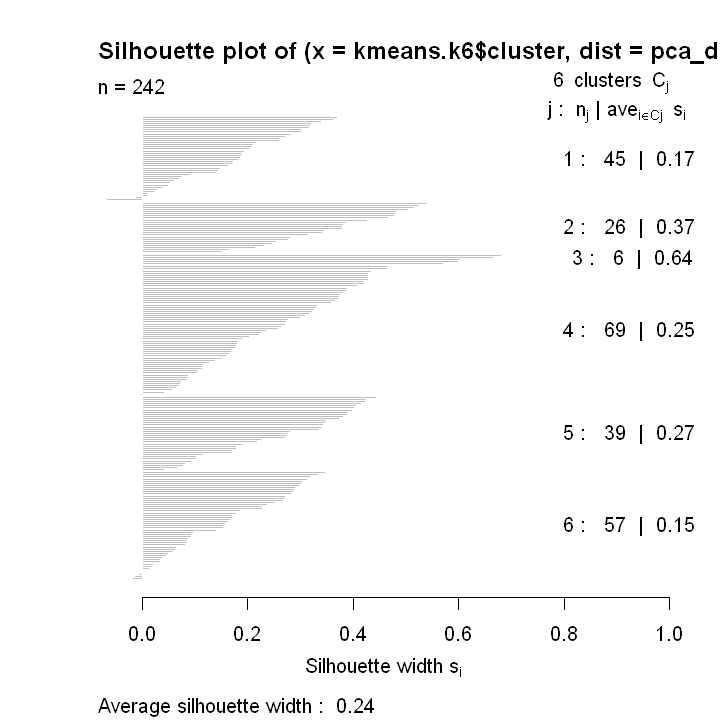

In [59]:
plot(silhouette(kmeans.k6$cluster,pca_dist))

In [60]:
table(groups.k3_w,kmeans.k6$cluster)

           
groups.k3_w  1  2  3  4  5  6
          1 45 26  0 64  0 57
          2  0  0  0  5 39  0
          3  0  0  6  0  0  0

In [61]:
starbucks = starbucks %>% mutate(cluster = kmeans.k6$cluster)

In [62]:
head(starbucks)

Beverage_category,Beverage_prep,Calories,Total_Fat,Trans_Fat,Saturated_Fat,Sodium,Total_Carbs,Chol,Dietary_Fibre,...,Iron,Caffeine,Beverage_cat_new,hypercaloric,high_in_fat,veg,rich_in_vitc,energetic,caffeine,cluster
Coffee,No Milk,3,0.1,0.0,0.0,0,5,0,0,...,0,175,Coffee,-1.6968842,-0.6202372,0.22628333,0.60441523,0.56072603,1.61302641,4
Coffee,No Milk,4,0.1,0.0,0.0,0,10,0,0,...,0,260,Coffee,-1.6642846,-0.7754303,0.15939572,1.18723706,0.33475794,2.81933242,4
Coffee,No Milk,5,0.1,0.0,0.0,0,10,0,0,...,0,330,Coffee,-1.6345694,-0.9056013,0.13329205,1.66831842,0.14474972,3.80686673,4
Coffee,No Milk,5,0.1,0.0,0.0,0,10,0,0,...,0,410,Coffee,-1.6012301,-1.0691237,0.09649615,2.24371142,-0.08967986,4.89349361,4
Classic Espresso Drinks,Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,...,0,75,C_Espresso,-0.9346405,-0.4461042,0.69158404,0.04618153,-0.60023566,-0.27801812,4
Classic Espresso Drinks,2% Milk,100,3.5,2.0,0.1,15,85,10,0,...,0,75,C_Espresso,-0.3501527,-1.3994790,0.61196339,-0.48947538,0.42783583,-0.05019443,5


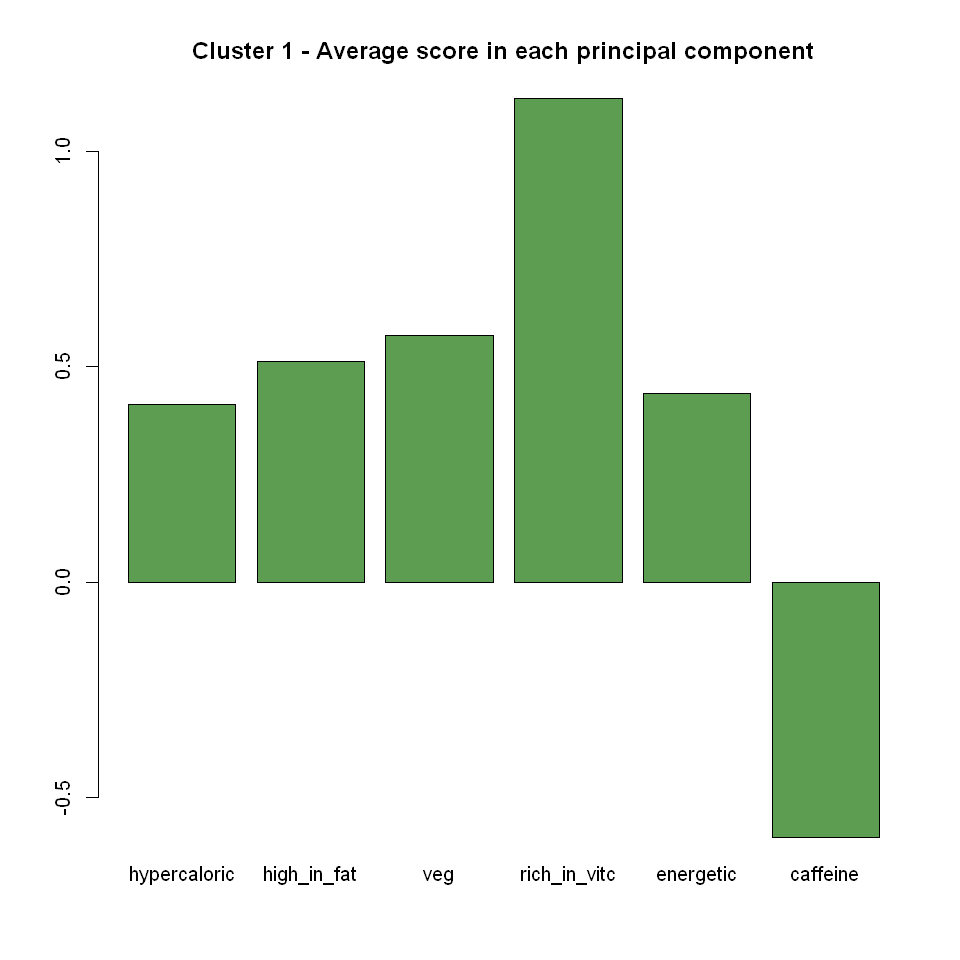

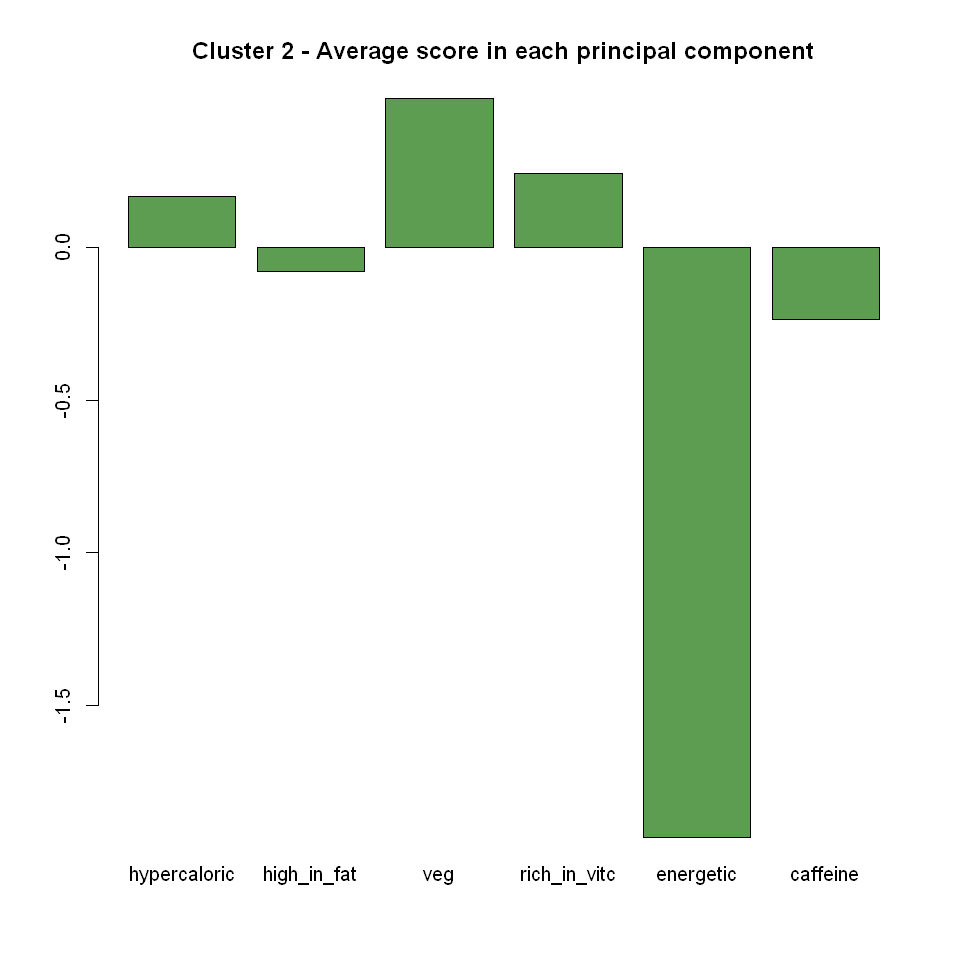

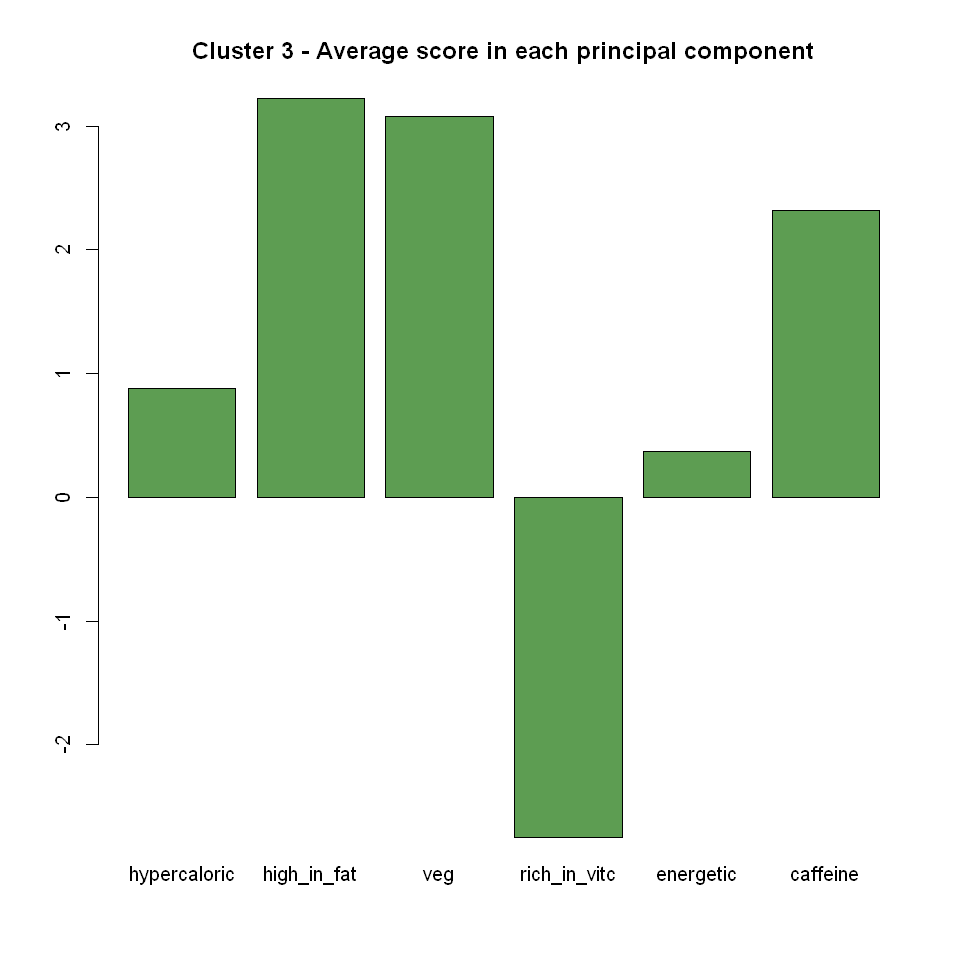

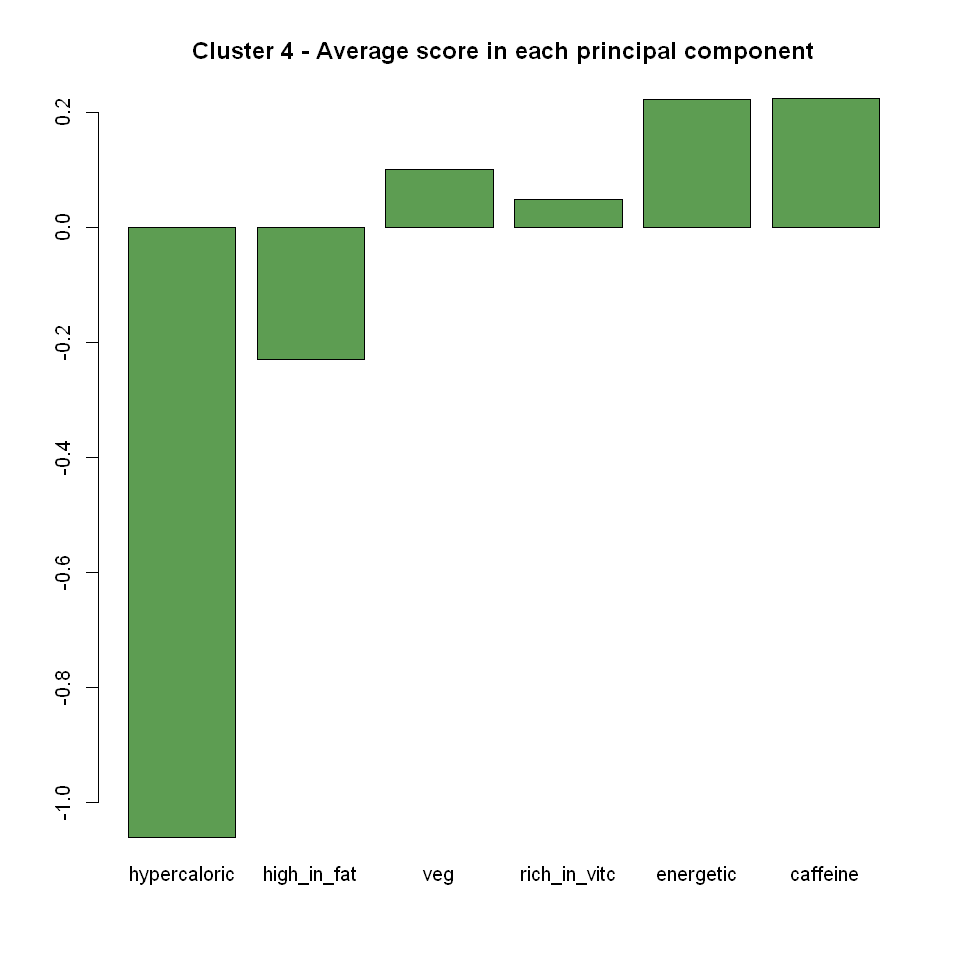

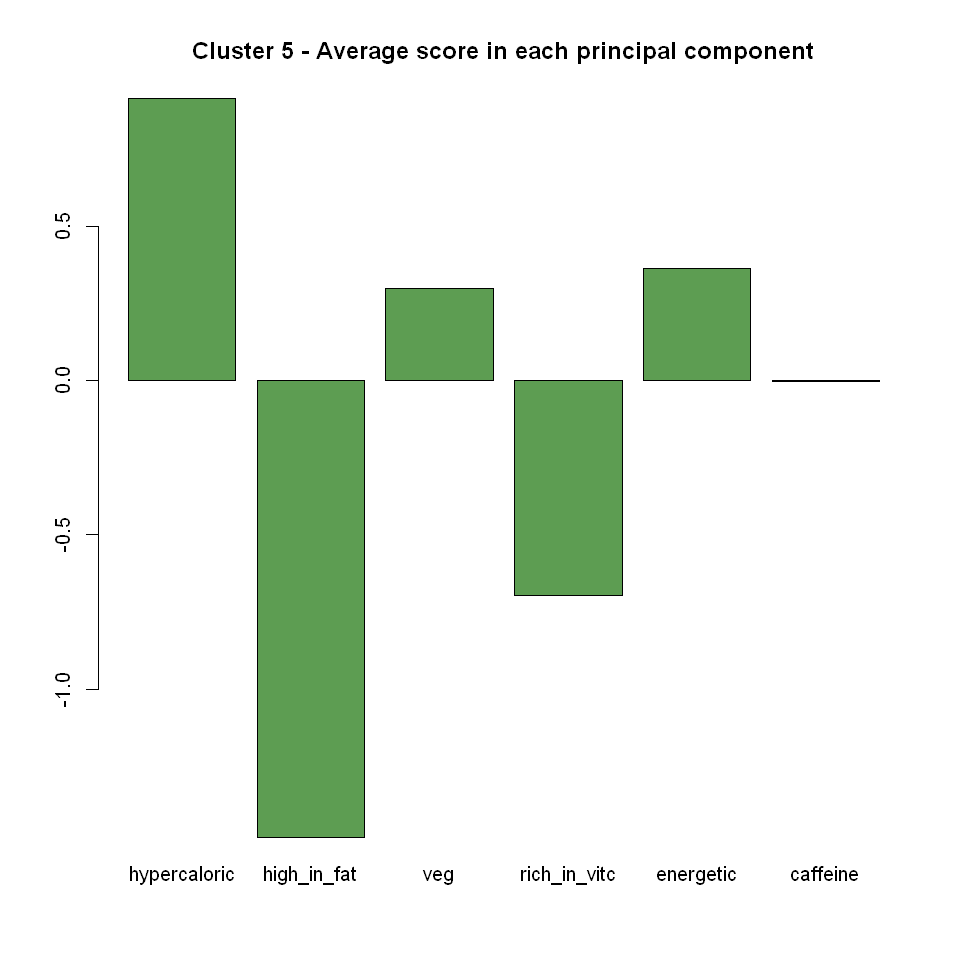

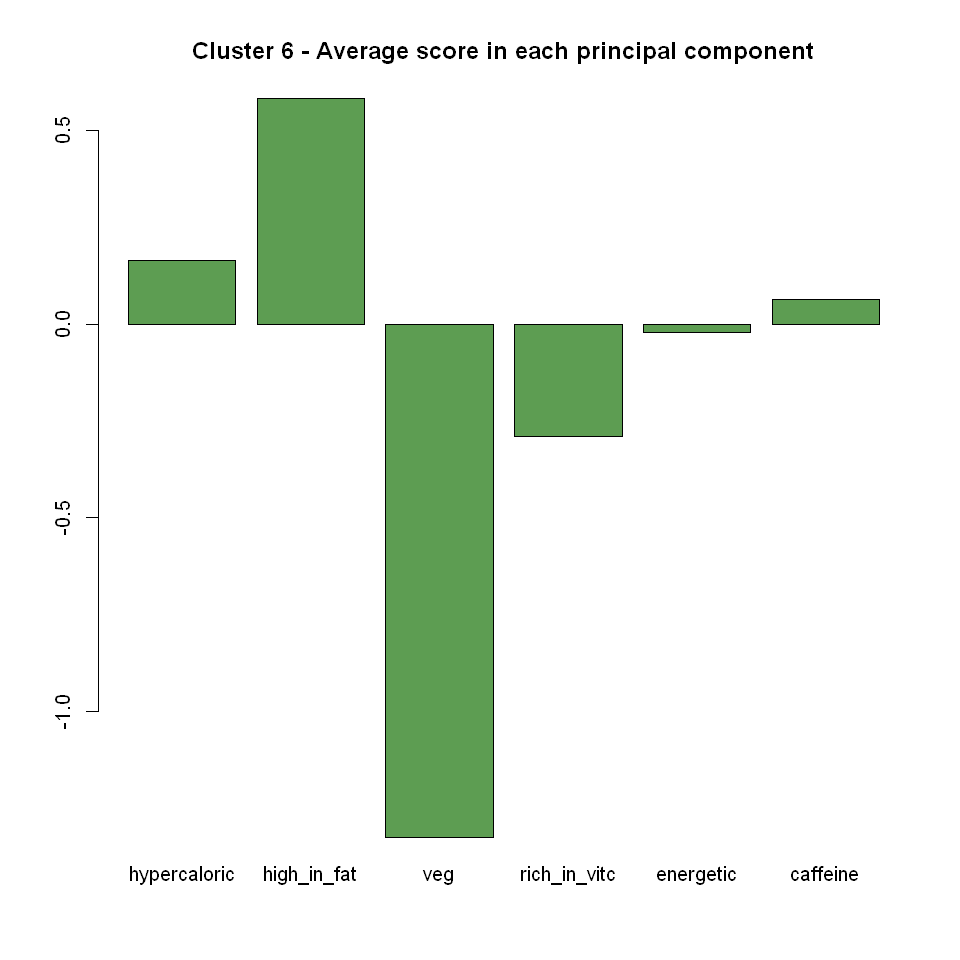

In [63]:
# Gráfico de barras do score médio de cada PC em cada cluster:
options(repr.plot.width=8, repr.plot.height=8)
barplot(colMeans(subset(starbucks,cluster==1)[,19:24]),main= "Cluster 1 - Average score in each principal component",col="#5D9D52FF")
barplot(colMeans(subset(starbucks,cluster==2)[,19:24]),main= "Cluster 2 - Average score in each principal component",col="#5D9D52FF")
barplot(colMeans(subset(starbucks,cluster==3)[,19:24]),main= "Cluster 3 - Average score in each principal component",col="#5D9D52FF")
barplot(colMeans(subset(starbucks,cluster==4)[,19:24]),main= "Cluster 4 - Average score in each principal component",col="#5D9D52FF")
barplot(colMeans(subset(starbucks,cluster==5)[,19:24]),main= "Cluster 5 - Average score in each principal component",col="#5D9D52FF")
barplot(colMeans(subset(starbucks,cluster==6)[,19:24]),main= "Cluster 6 - Average score in each principal component",col="#5D9D52FF")

### Utilização das variáveis de PROFILE para caracterizar o cluster

### Beverage_Category

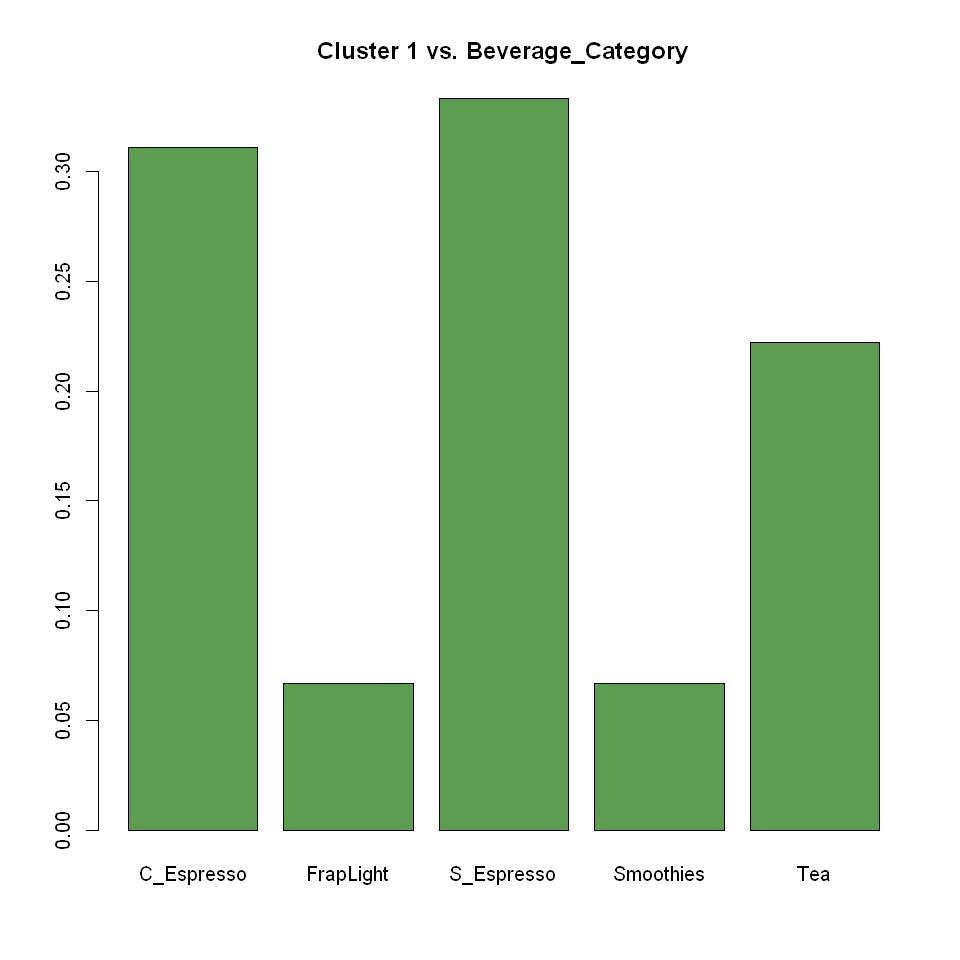

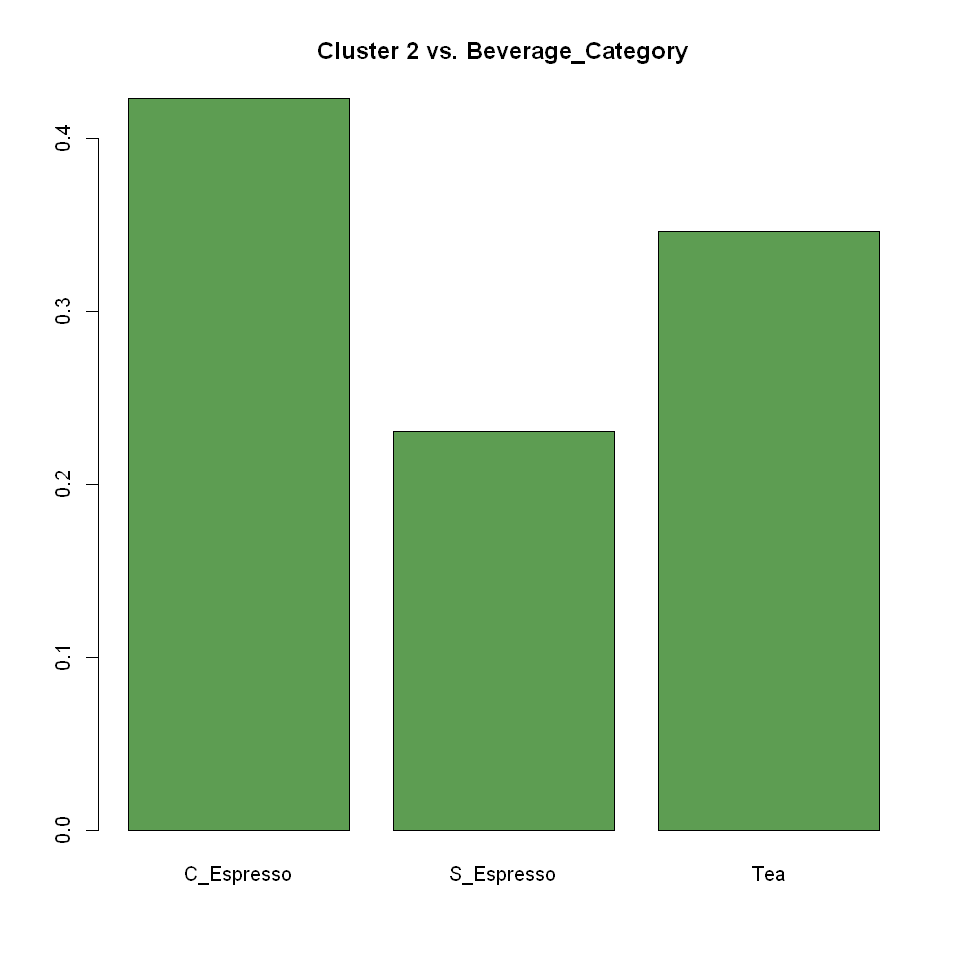

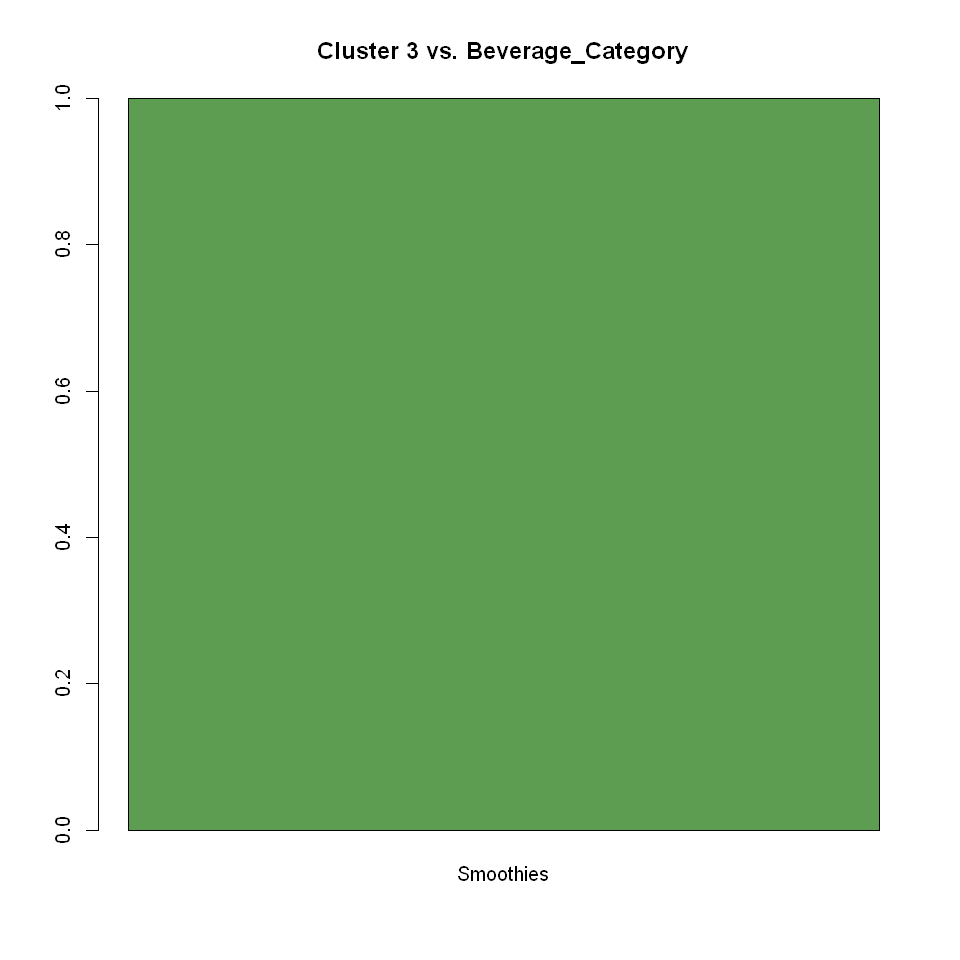

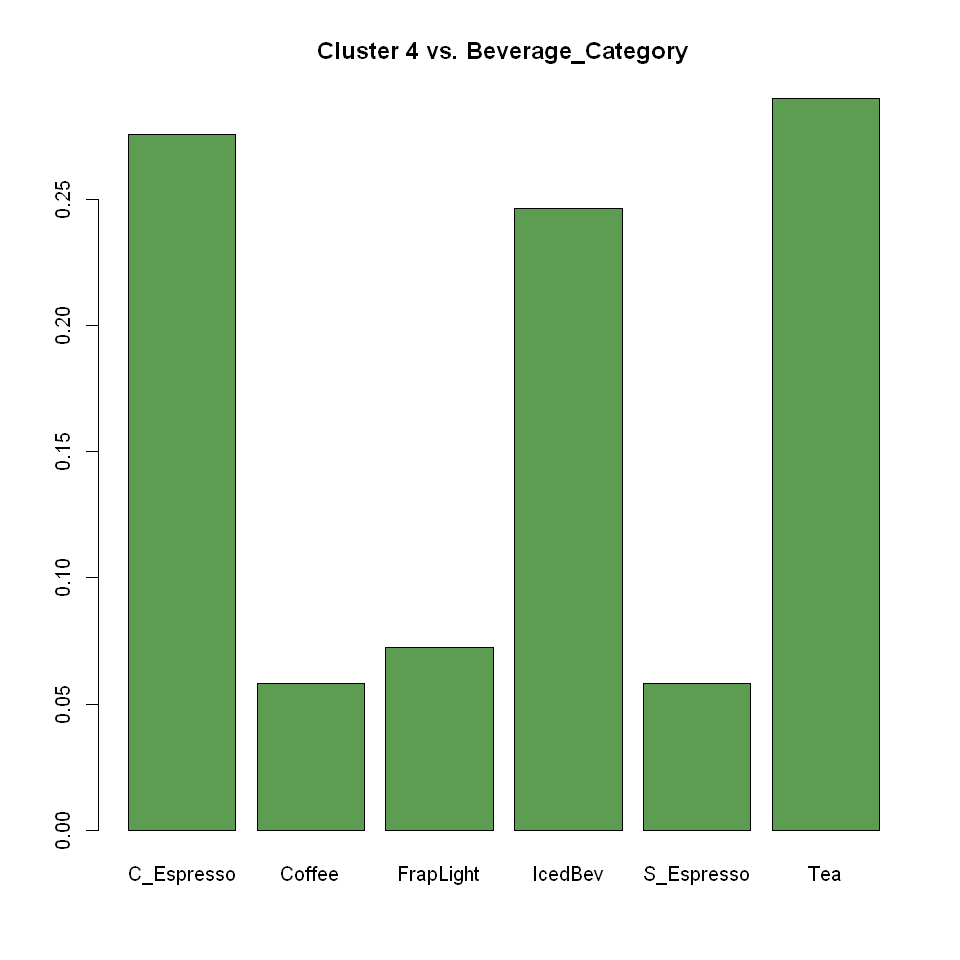

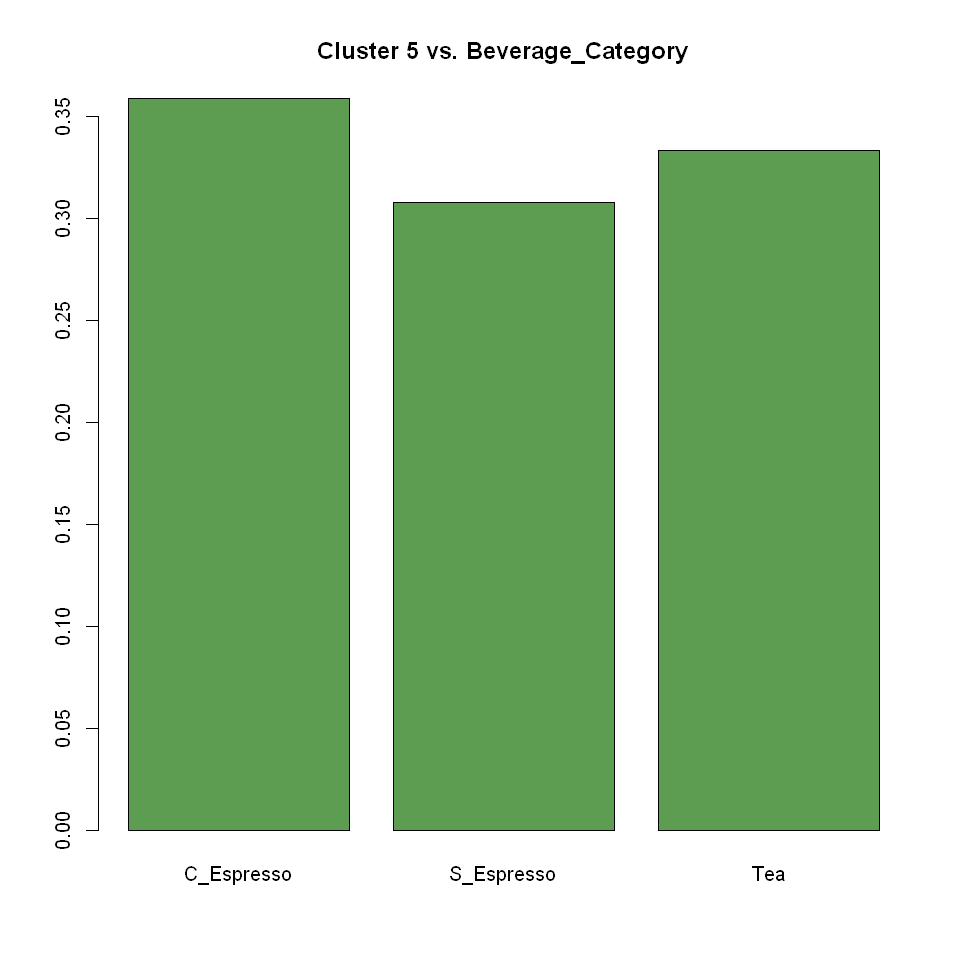

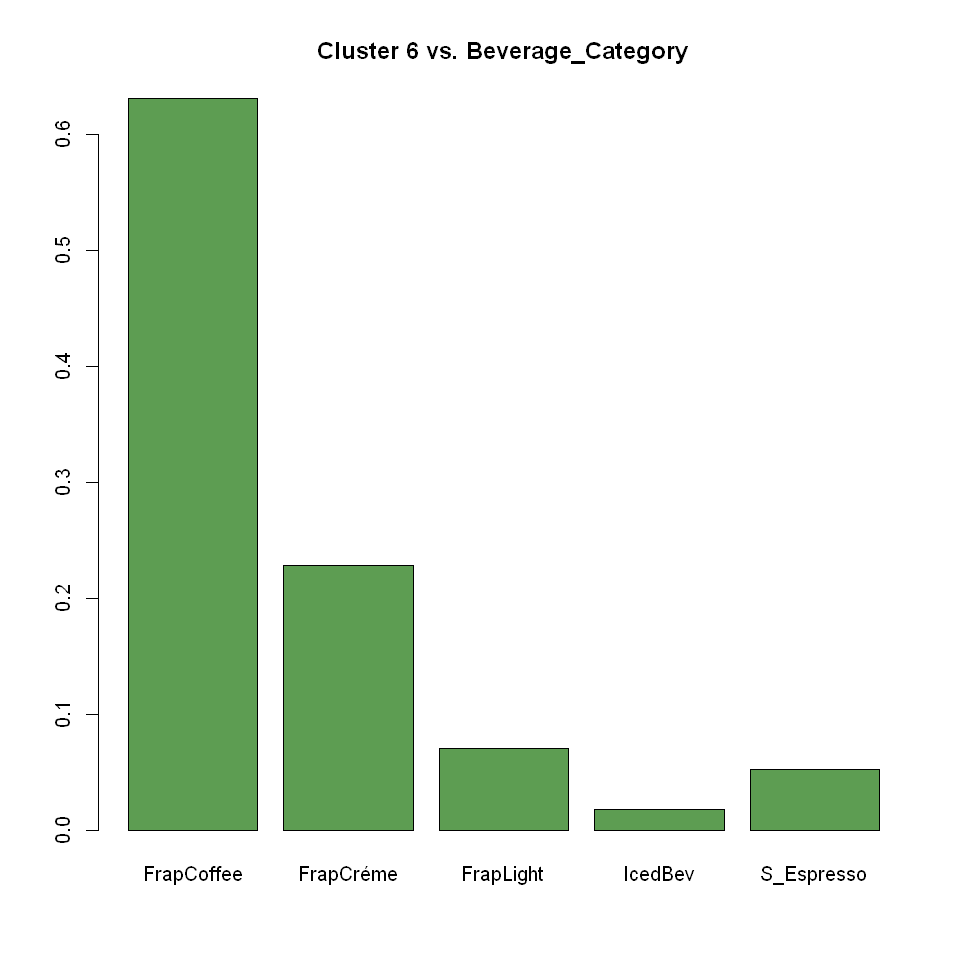

In [64]:
# Gráfico de barras de cada categoria de bebida por cluster
barplot(prop.table(table(subset(starbucks,cluster==1)[,18])),main= "Cluster 1 vs. Beverage_Category",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==2)[,18])),main= "Cluster 2 vs. Beverage_Category",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==3)[,18])),main= "Cluster 3 vs. Beverage_Category",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==4)[,18])),main= "Cluster 4 vs. Beverage_Category",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==5)[,18])),main= "Cluster 5 vs. Beverage_Category",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==6)[,18])),main= "Cluster 6 vs. Beverage_Category",col="#5D9D52FF")

### Beverage_Prep

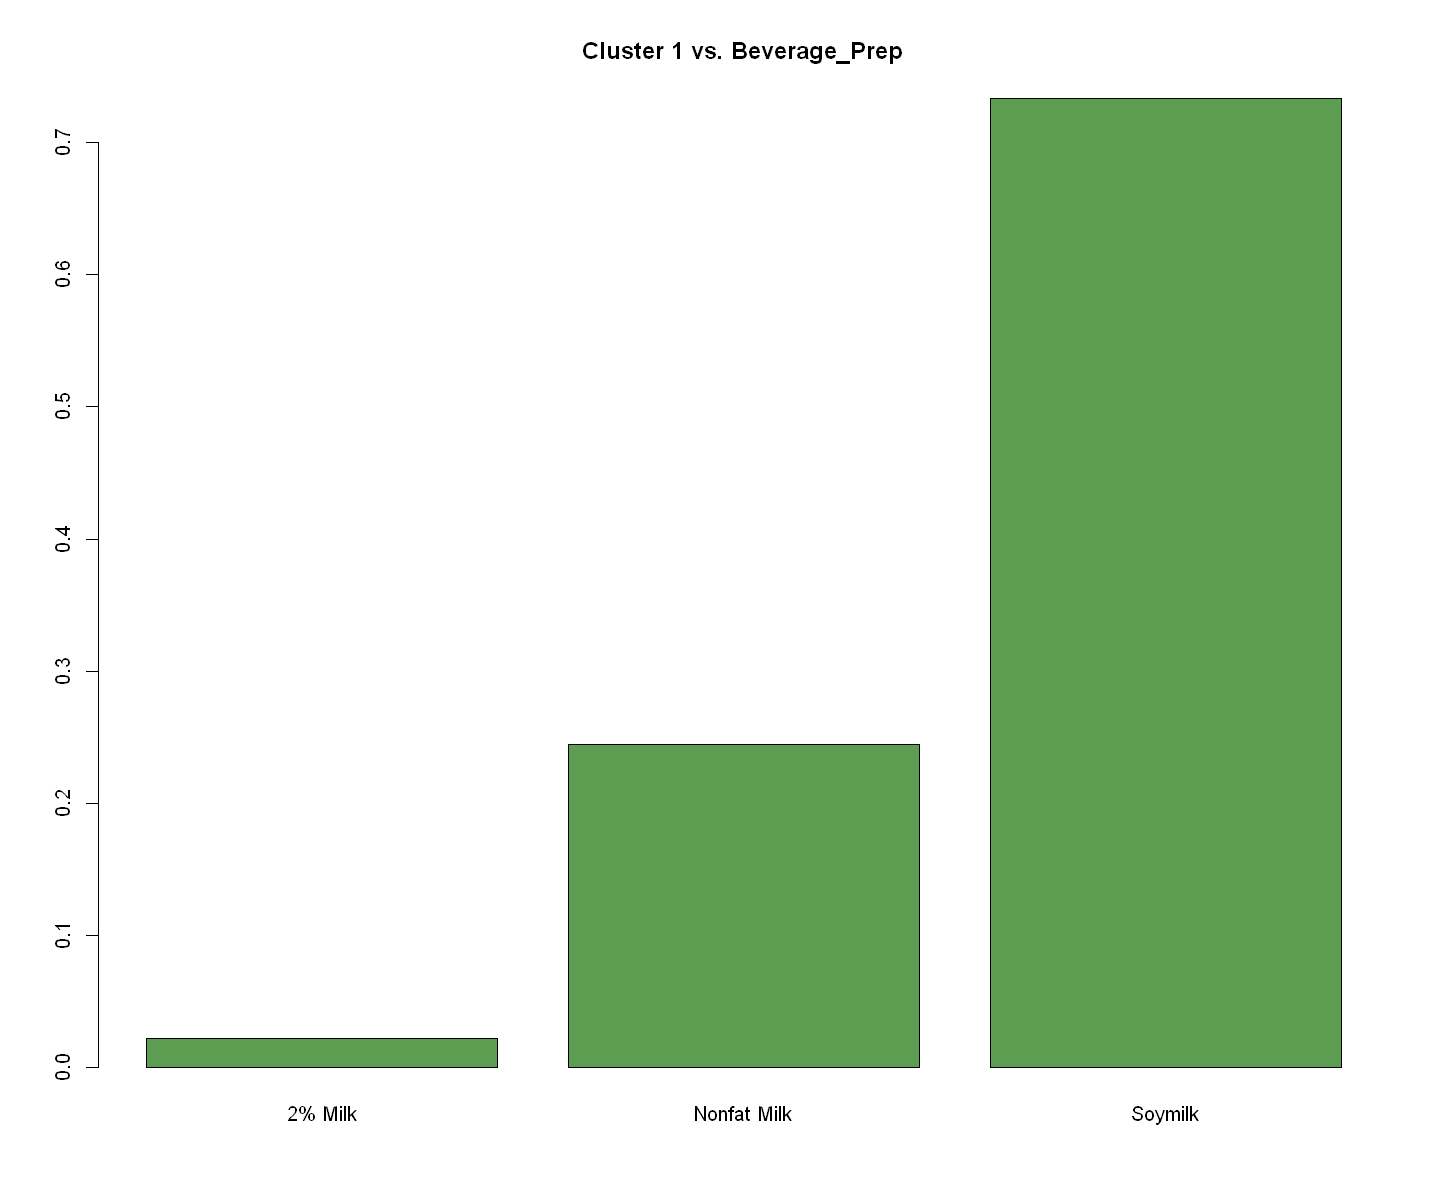

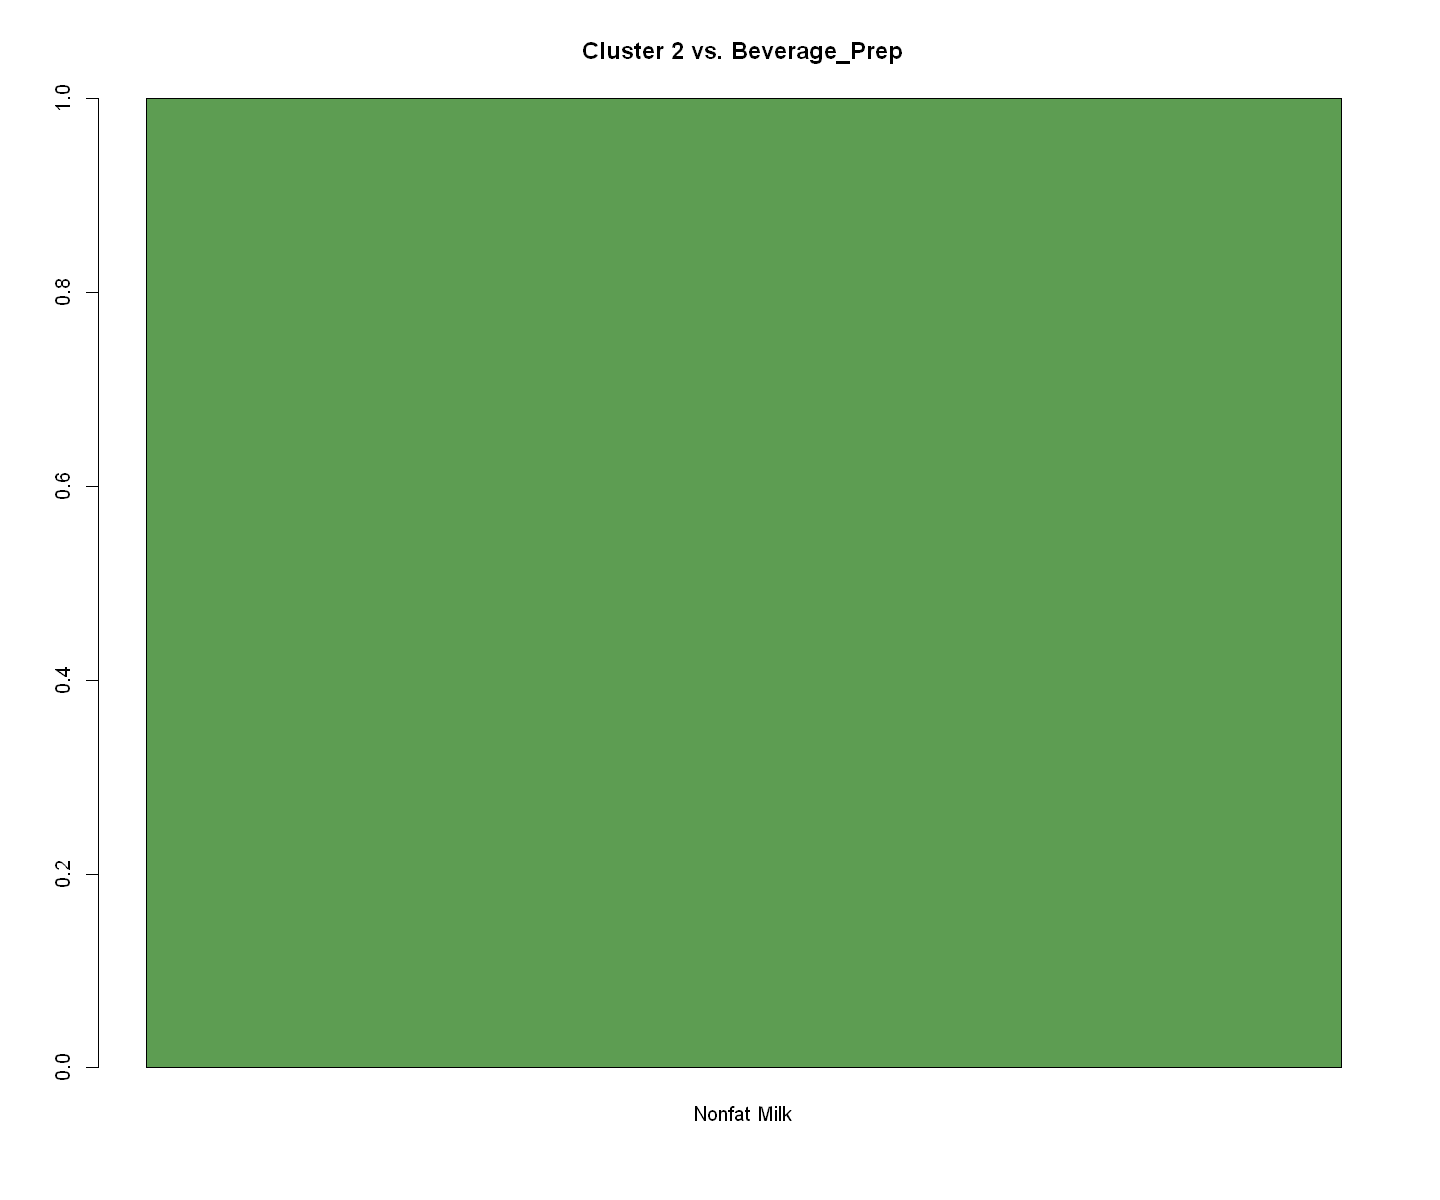

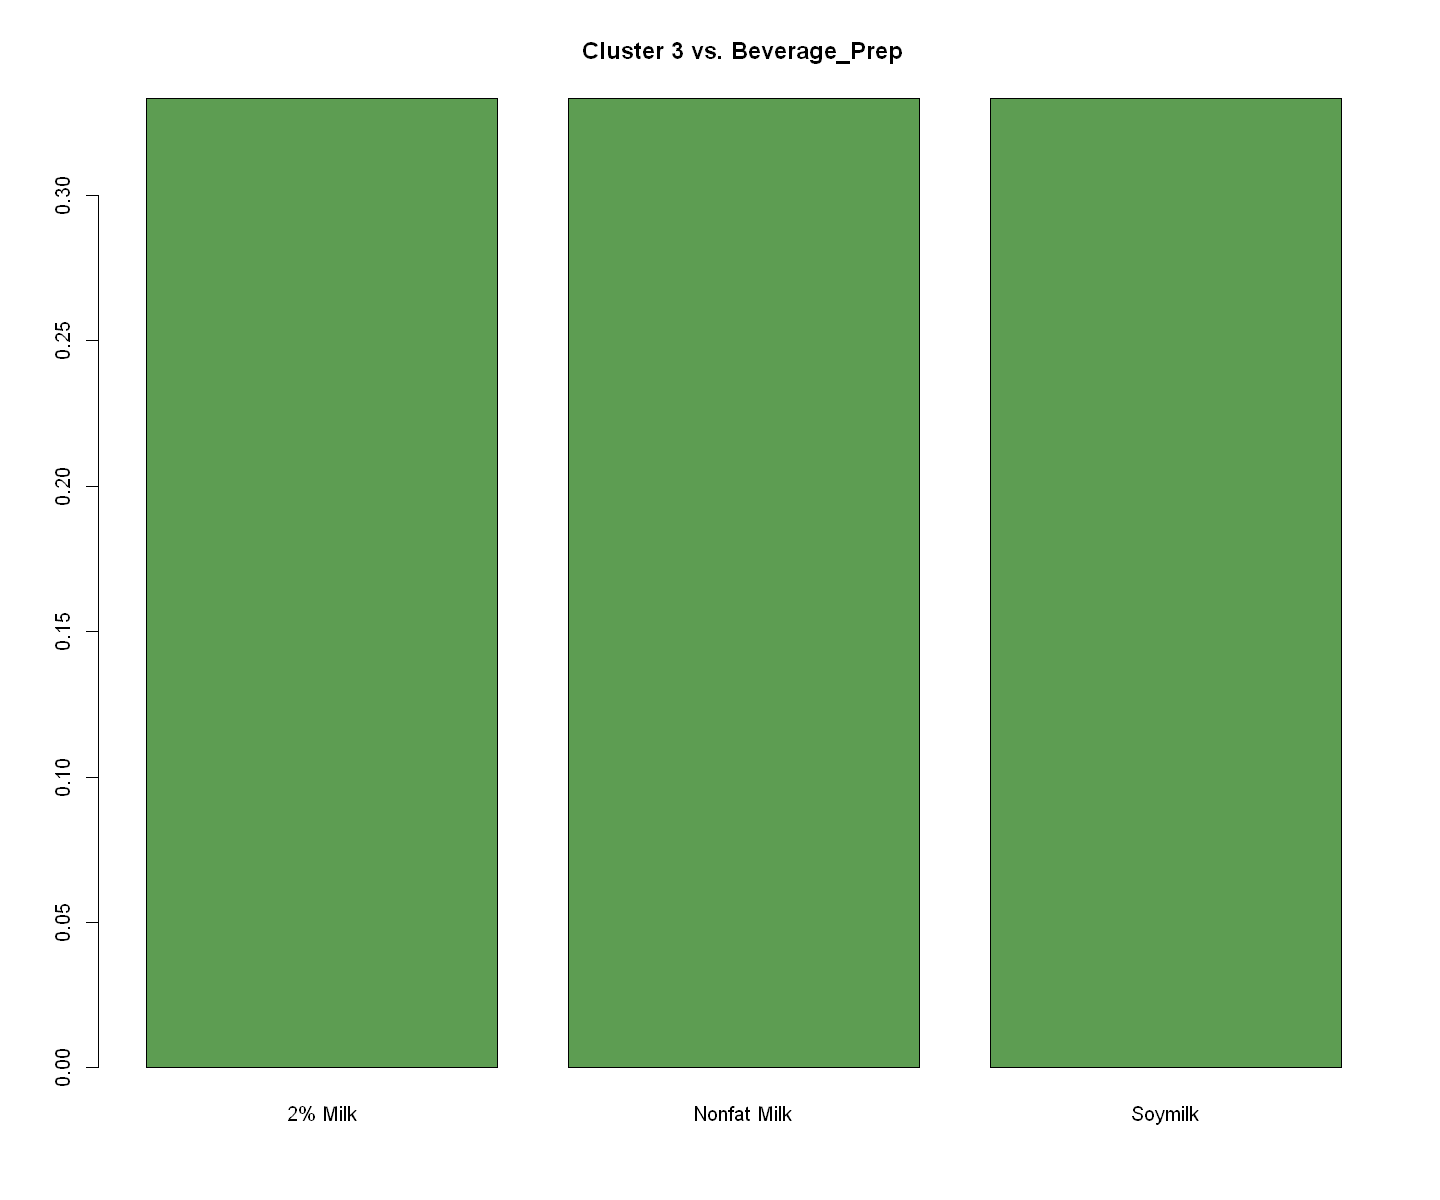

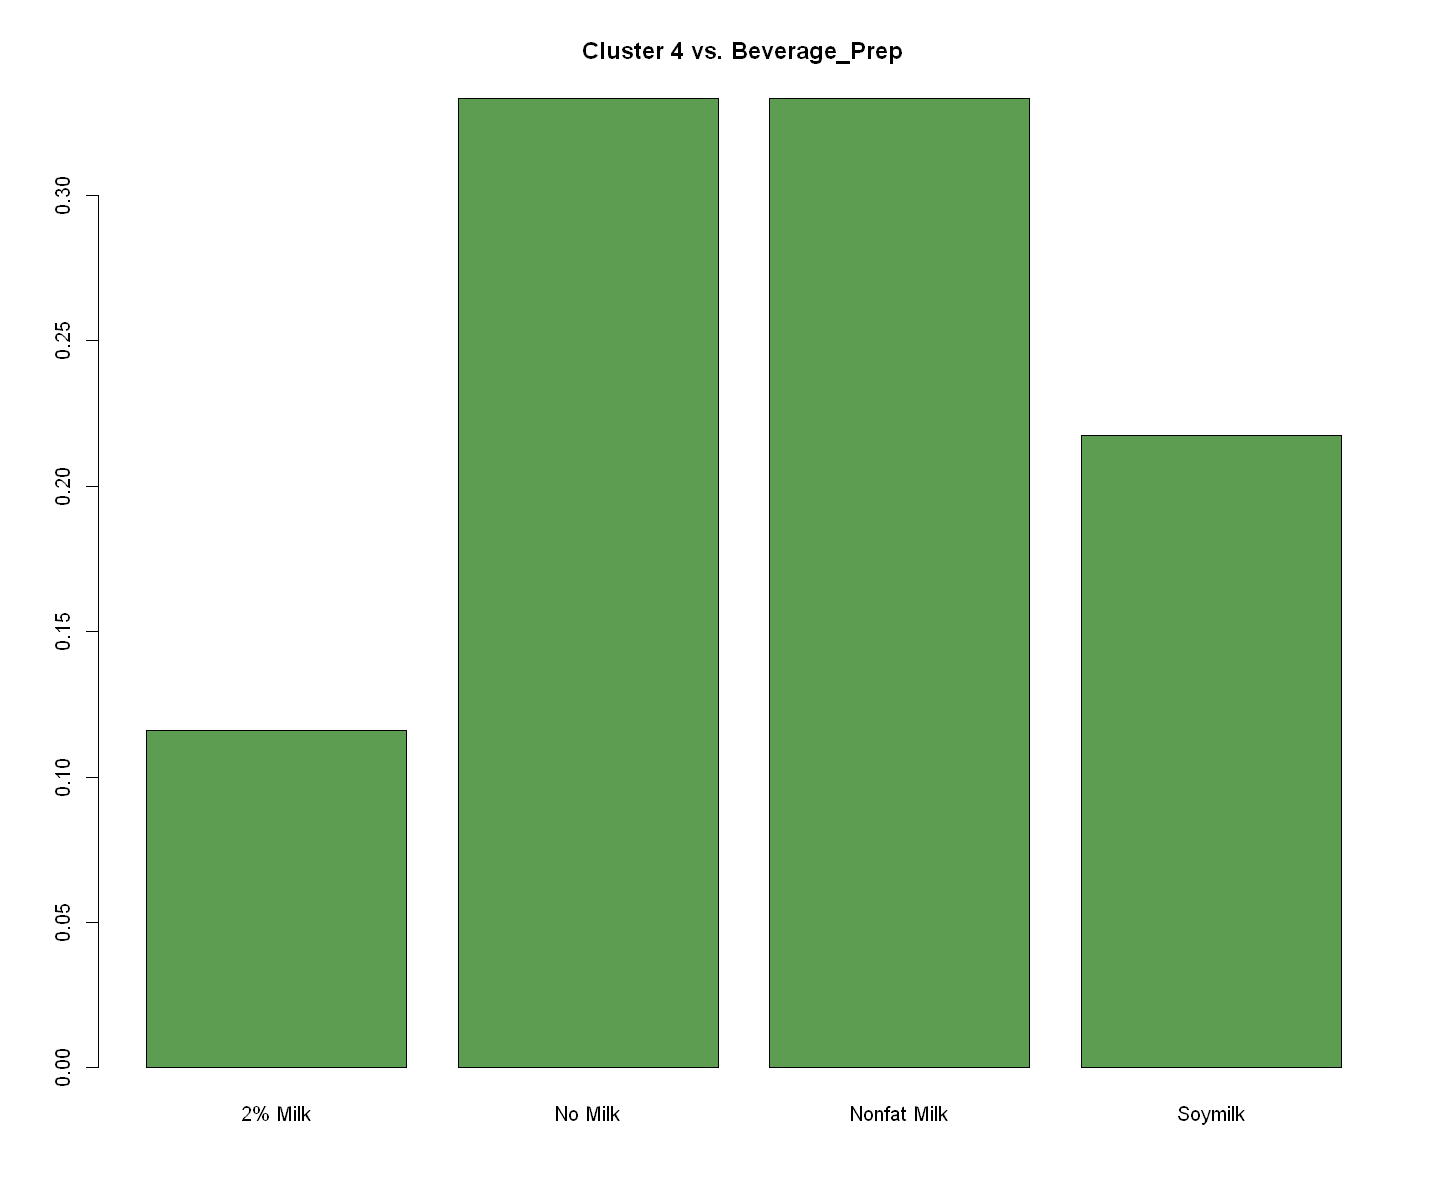

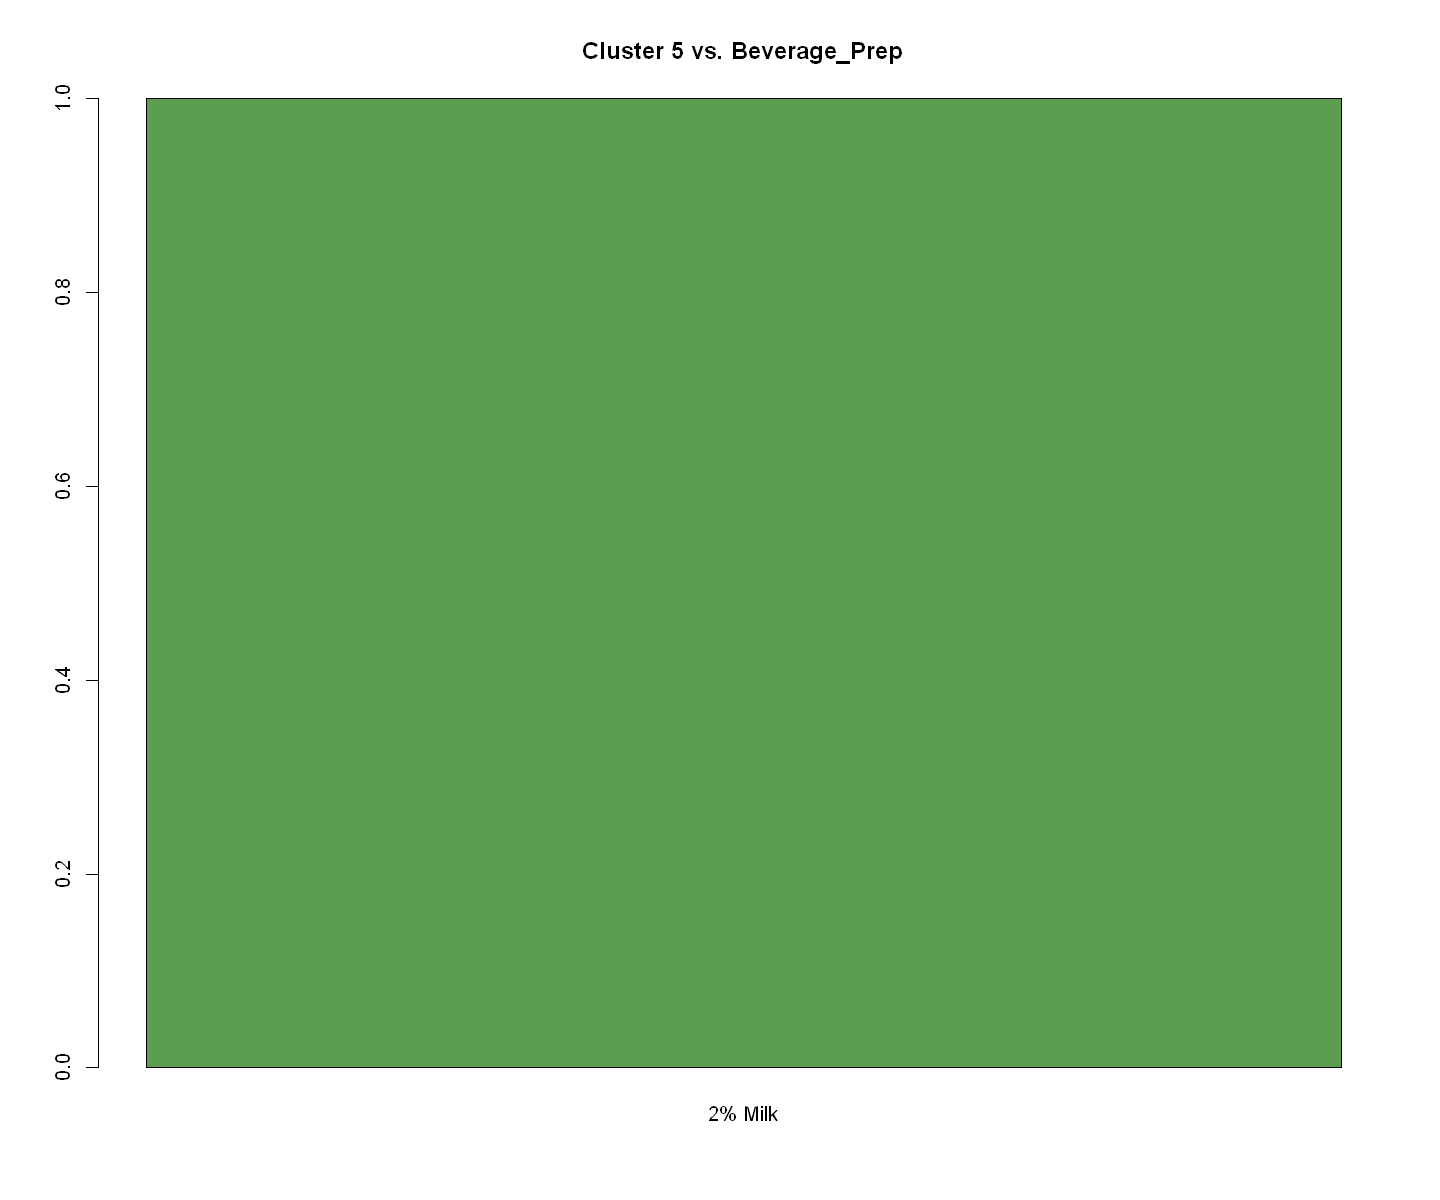

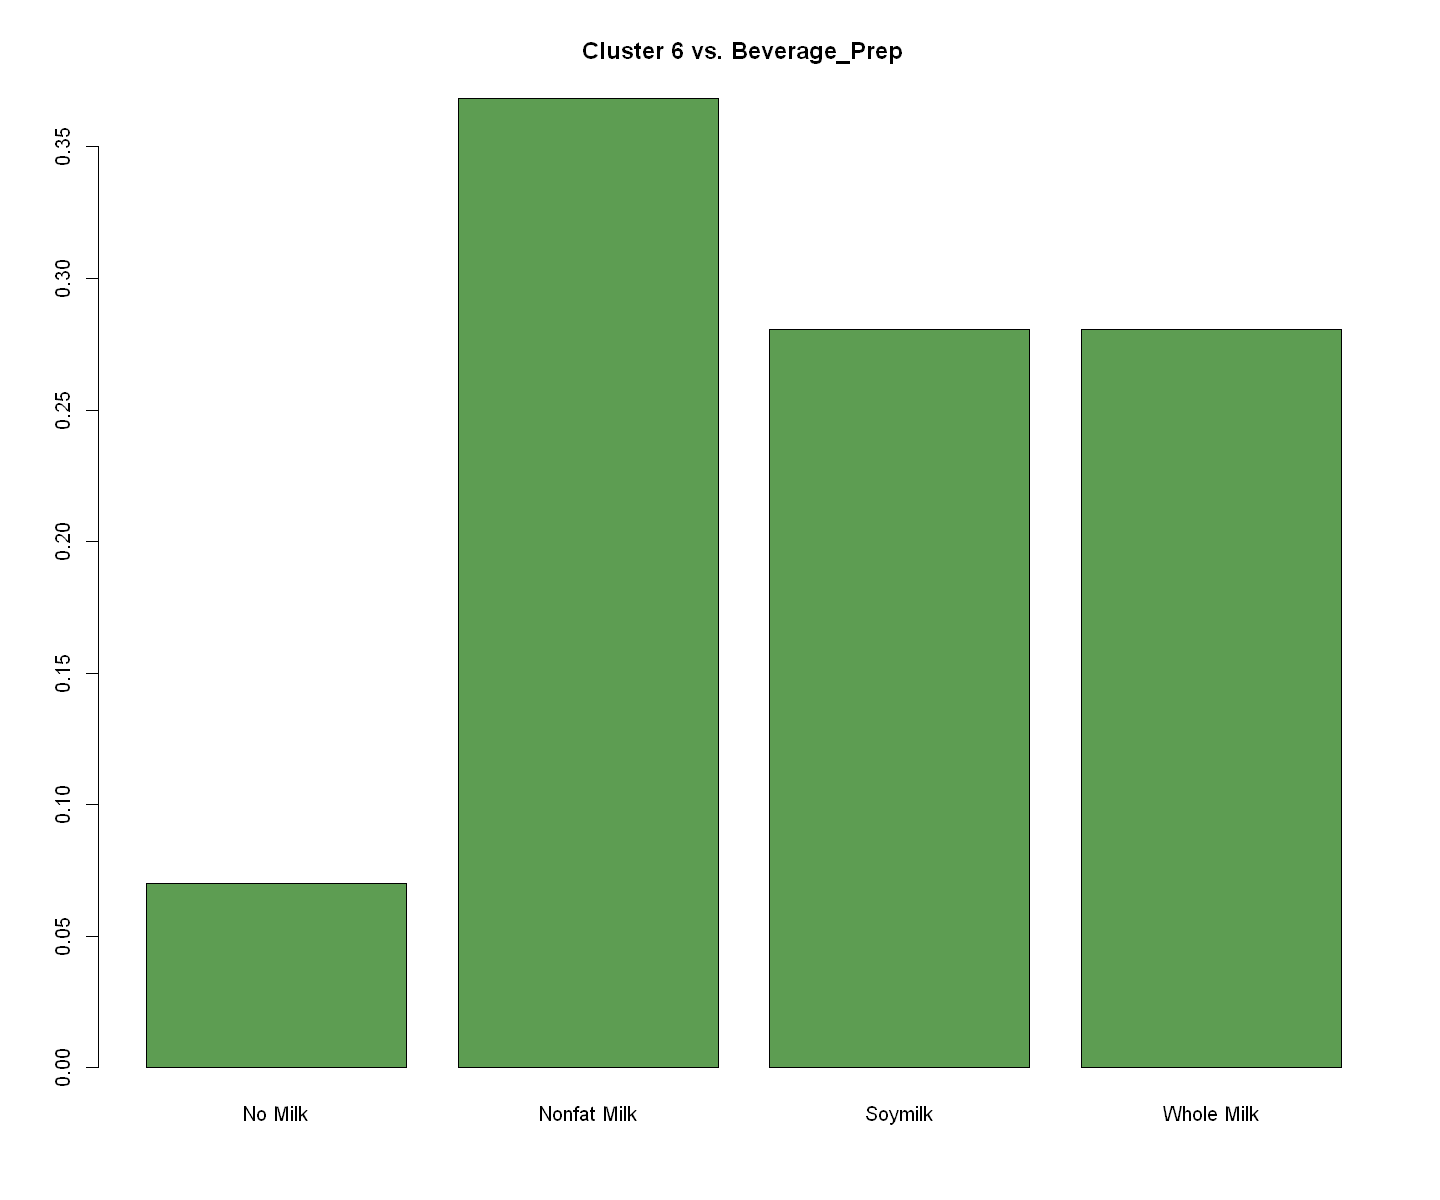

In [65]:
# Gráfico de barras de cada categoria de preparação de bebida, por cluster.
options(repr.plot.width=12, repr.plot.height=10)
barplot(prop.table(table(subset(starbucks,cluster==1)[,2])),main= "Cluster 1 vs. Beverage_Prep",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==2)[,2])),main= "Cluster 2 vs. Beverage_Prep",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==3)[,2])),main= "Cluster 3 vs. Beverage_Prep",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==4)[,2])),main= "Cluster 4 vs. Beverage_Prep",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==5)[,2])),main= "Cluster 5 vs. Beverage_Prep",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==6)[,2])),main= "Cluster 6 vs. Beverage_Prep",col="#5D9D52FF")

### PAM Clustering

           
groups.k3_w  1  2  3  4  5  6
          1 53 35 10 54 40  0
          2  0  0 44  0  0  0
          3  0  0  0  0  0  6

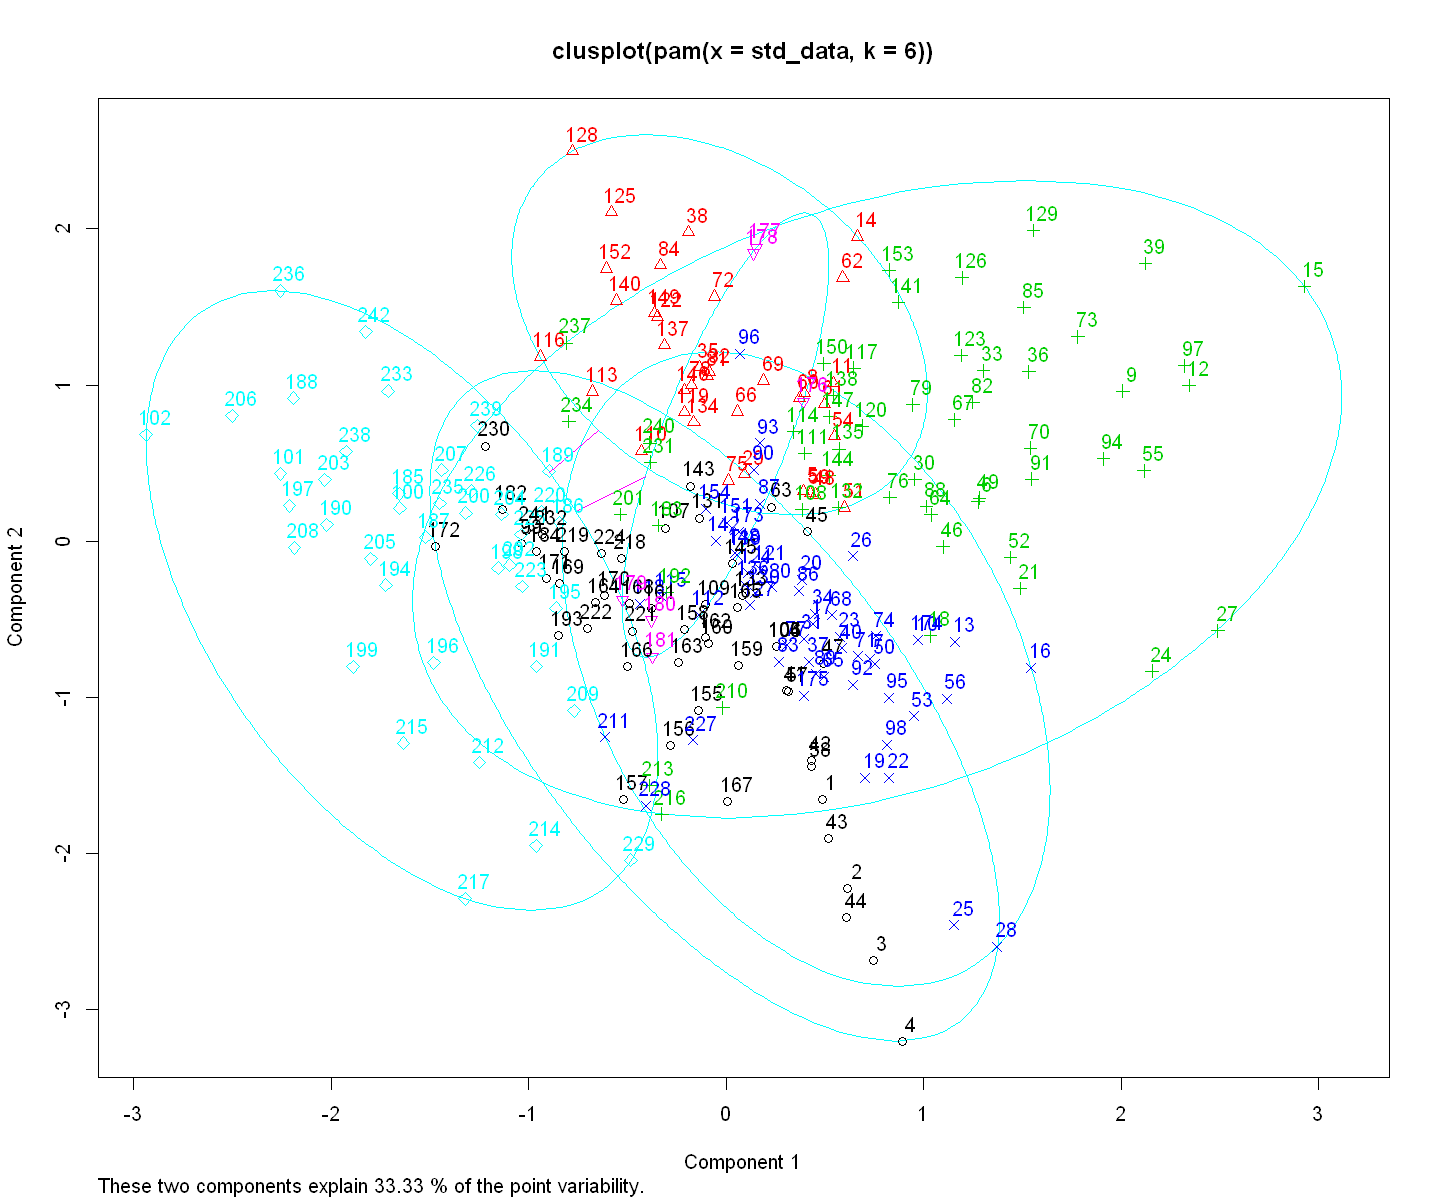

In [66]:
std_data <- starbucks[,19:24]
pam.k6 <- pam(std_data, 6)

table(groups.k3_w,pam.k6$clustering)

# PCA and Clustering
clusplot(pam.k6, labels = 3, col.p = pam.k6$clustering)

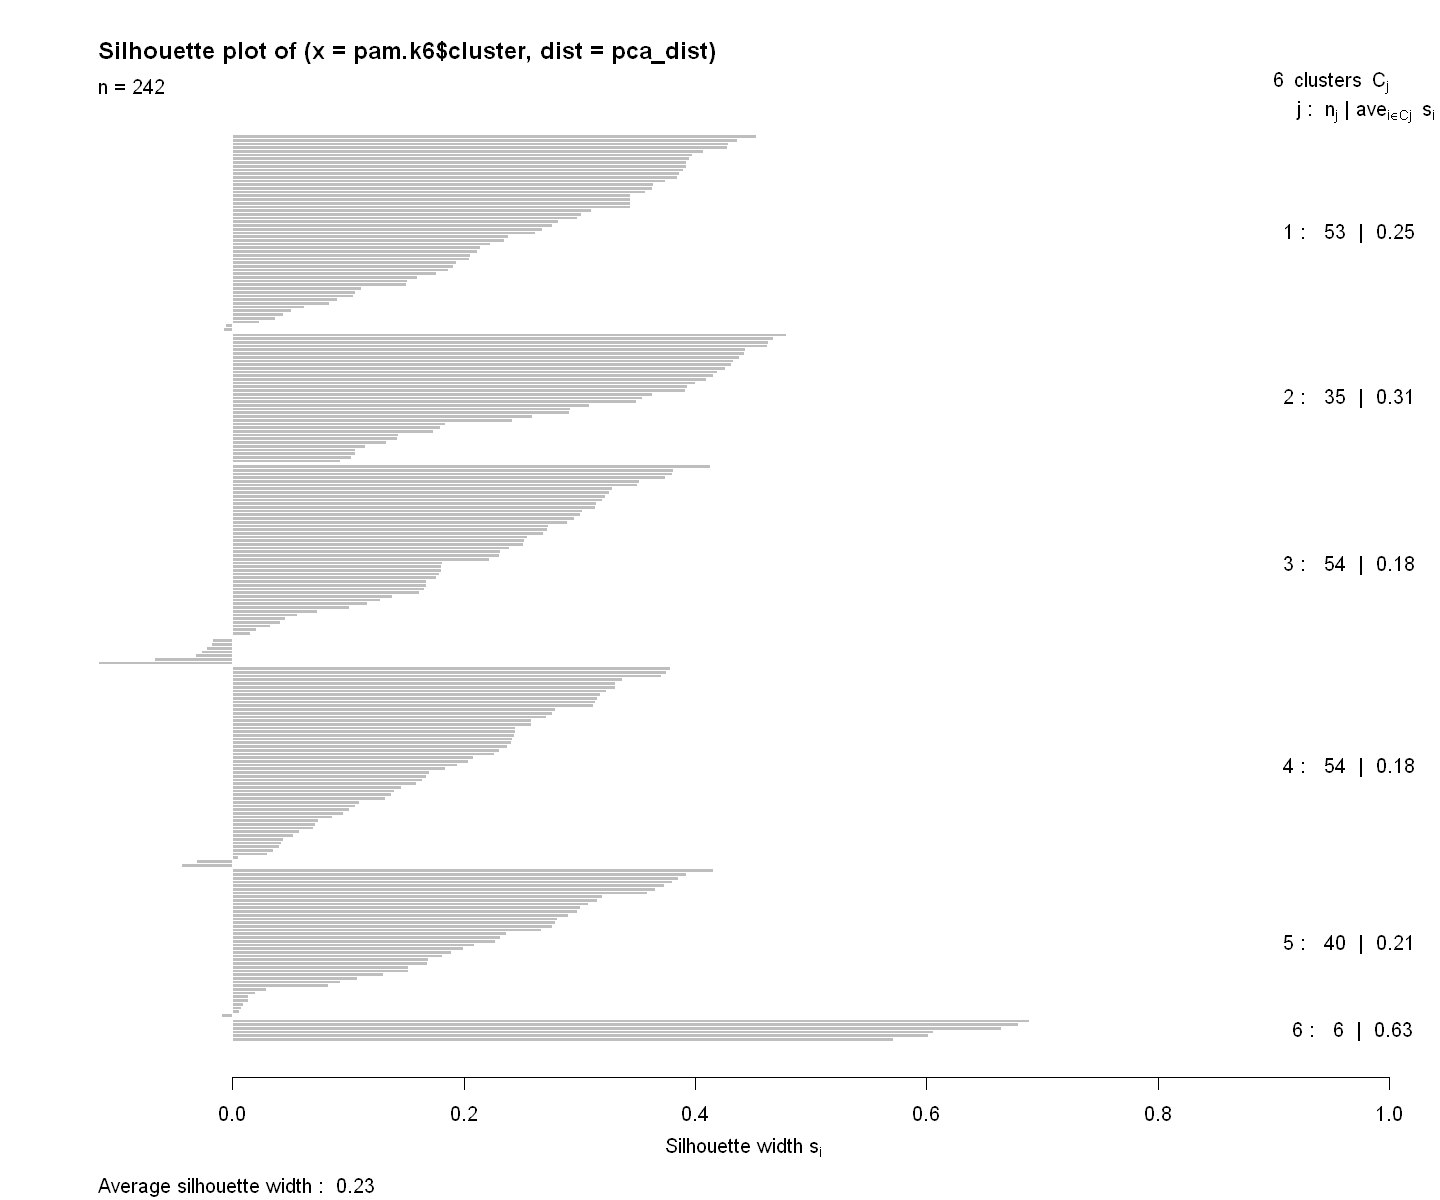

In [67]:
plot(silhouette(pam.k6$cluster,pca_dist)) 

### Gaussian Mixture Model

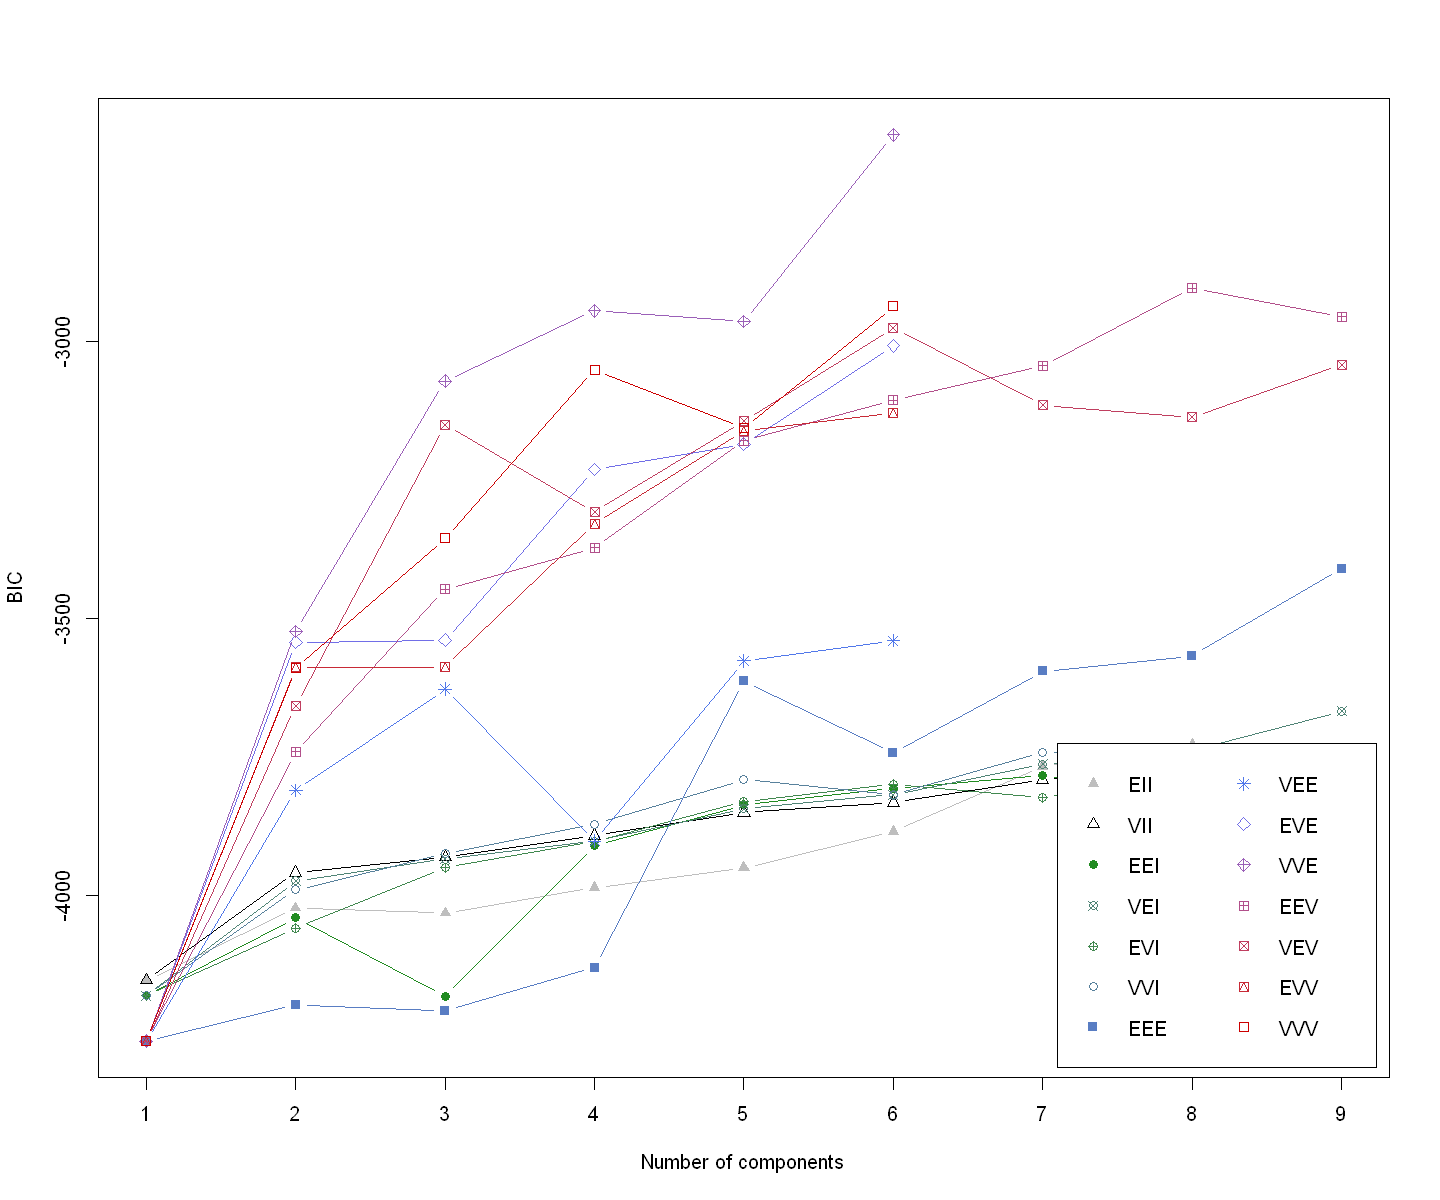

In [68]:
# Clustering probabilistico
BIC <- mclustBIC(starbucks[,19:24])
plot(BIC)

In [69]:
# Estimação do modelo:
results <- Mclust(starbucks[,19:24], G= 6)
summary(results, parameters = TRUE)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVE (ellipsoidal, equal orientation) model with 6 components: 

 log-likelihood   n df       BIC       ICL
      -1061.063 242 92 -2627.109 -2637.848

Clustering table:
 1  2  3  4  5  6 
23 36 39 86 24 34 

Mixing probabilities:
         1          2          3          4          5          6 
0.09500226 0.14982147 0.15892875 0.35679041 0.09980225 0.13965487 

Means:
                    [,1]         [,2]        [,3]        [,4]       [,5]
hypercaloric -1.43599800  0.883686003 -0.52452927 -0.19797747  1.4987954
high_in_fat  -0.20323343  1.063065447 -0.19068439  0.45652667 -1.7136914
veg          -0.22816628  0.371518883  0.37656923 -0.19411300  0.3309952
rich_in_vitc  0.07246744 -0.006544732  0.08542902  0.45033475 -0.6702947
energetic     0.45078004  0.190399024 -1.10261496  0.03547435  0.3664926
caffeine      0.8985

In [70]:
# Resultados
results$modelName          # Modelo ótimo selecionado

[1] "VVE"

In [71]:
results$G                  # Nº ótimo de clusters

[1] 6

In [72]:
head(results$z, 5)         # Probabilidade de pertencer a cada cluster

0.9999791,1.105279e-12,1.641977e-05,4.450961e-06,1.747807e-12,5.228756e-12
0.9999999,1.207535e-19,2.122781e-09,6.337391e-08,3.601536e-14,6.790378e-15
1.0000000,3.066885e-27,2.151175e-14,1.374196e-09,8.856740e-16,1.087371e-17
1.0000000,1.281165e-38,2.197838e-19,4.042386e-12,1.278241e-18,1.091538e-21
0.0000000,4.804326e-06,9.979437e-01,2.051303e-03,1.558606e-07,1.298954e-08


In [73]:
head(results$classification, 5) # A que cluster são atribuidas as primeiras 5 observações

[1] 1 1 1 1 3

In [74]:
starbucks = starbucks %>% mutate(cluster = results$classification)

### Beverage_category

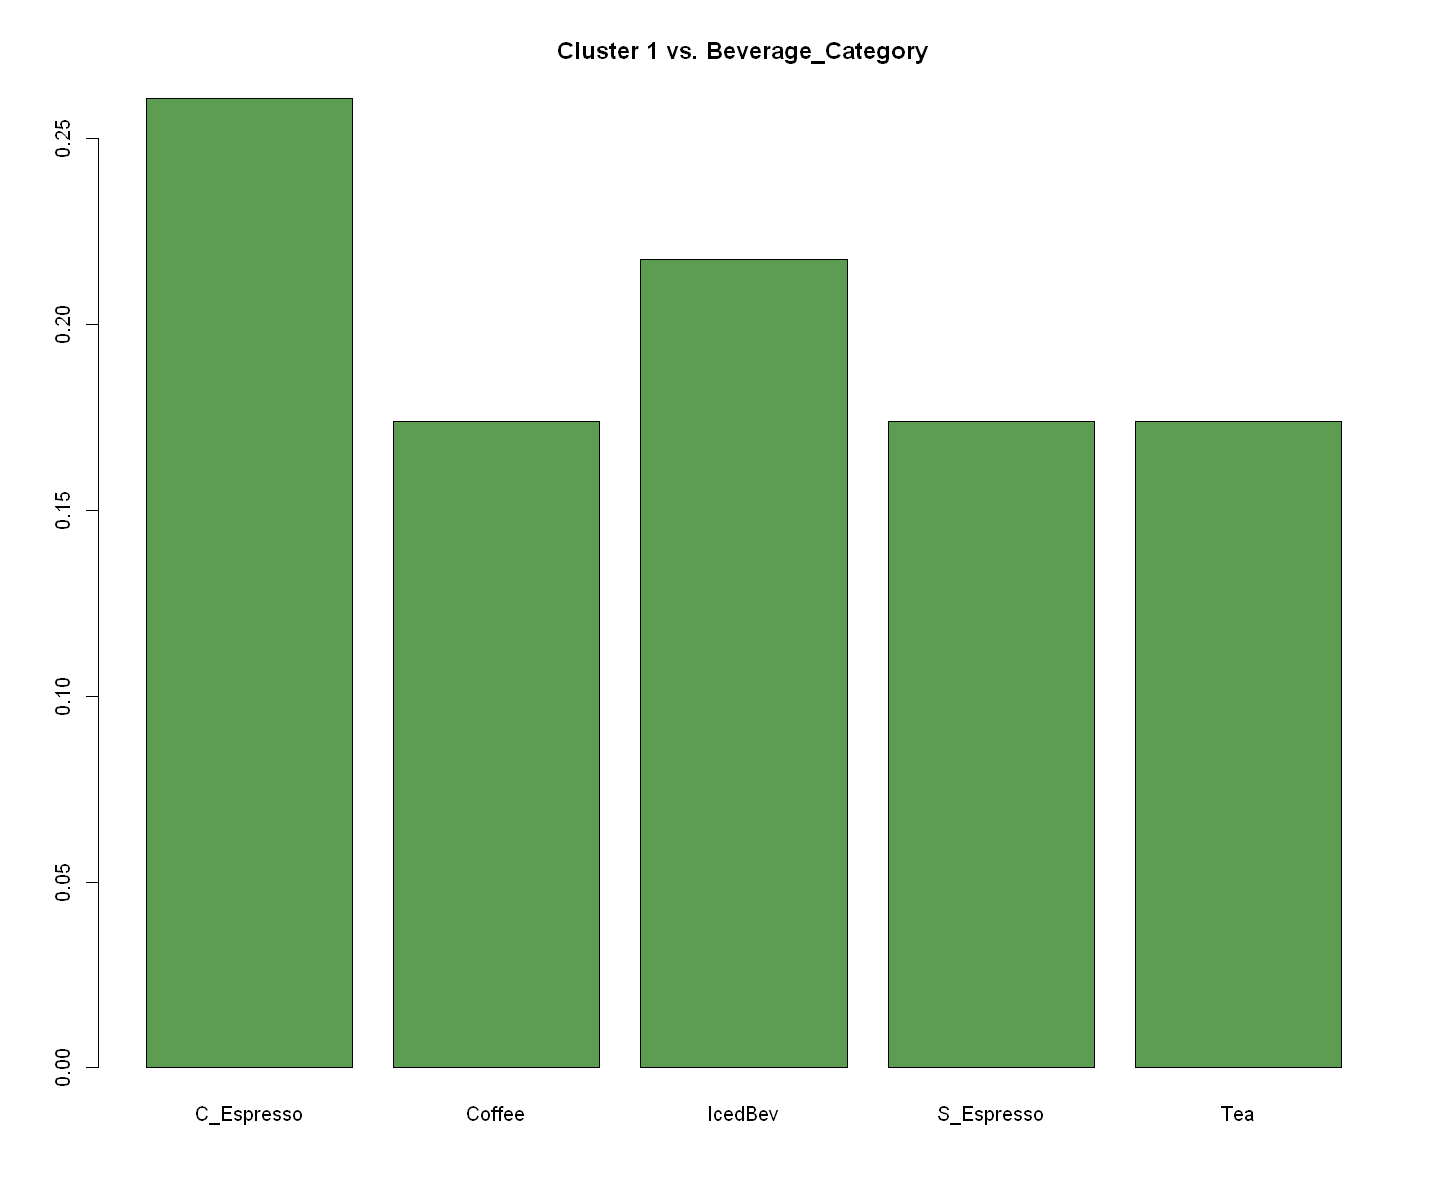

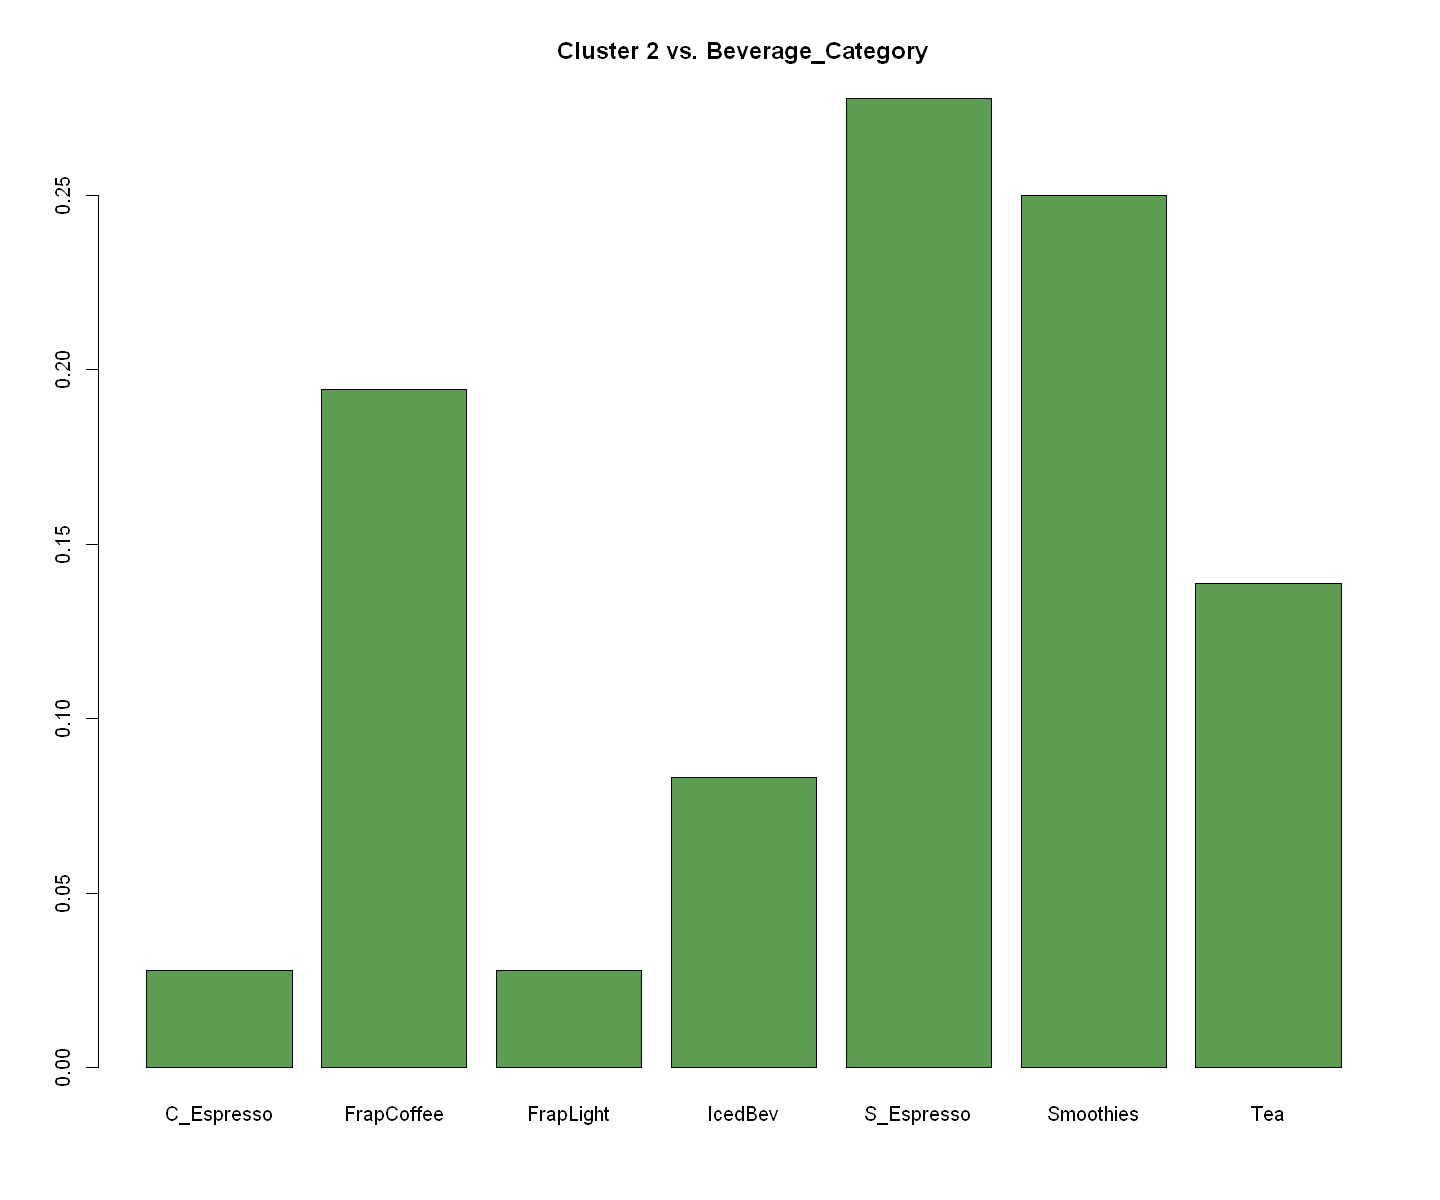

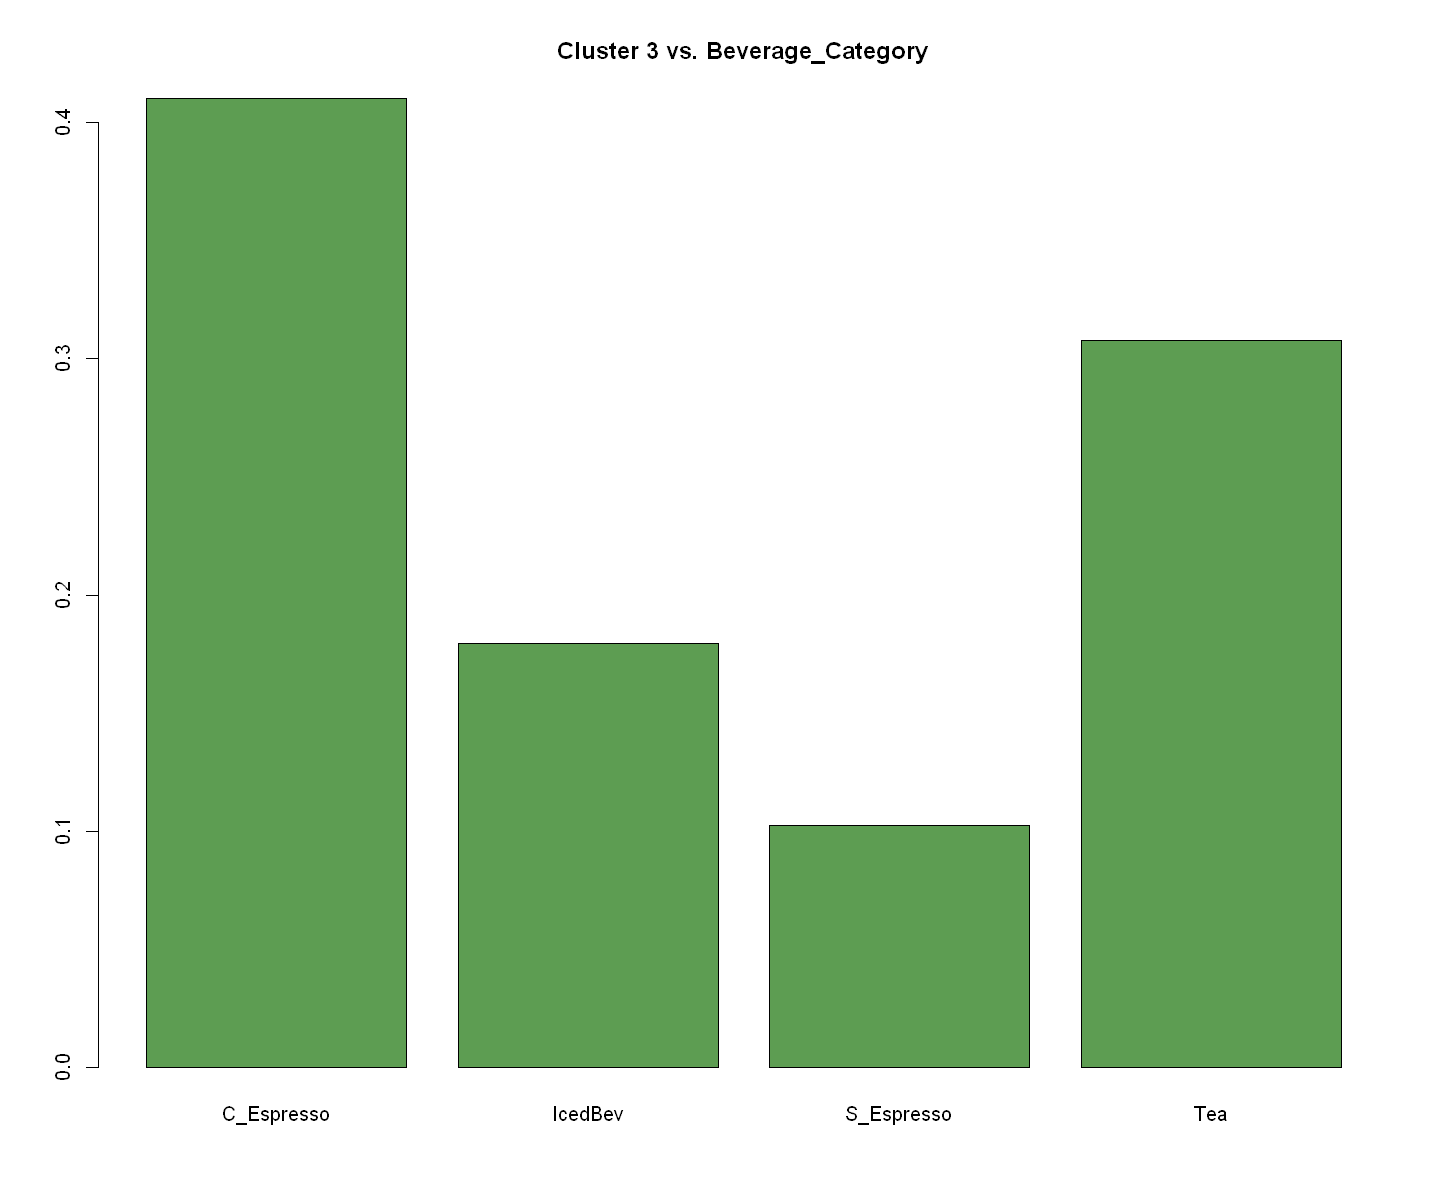

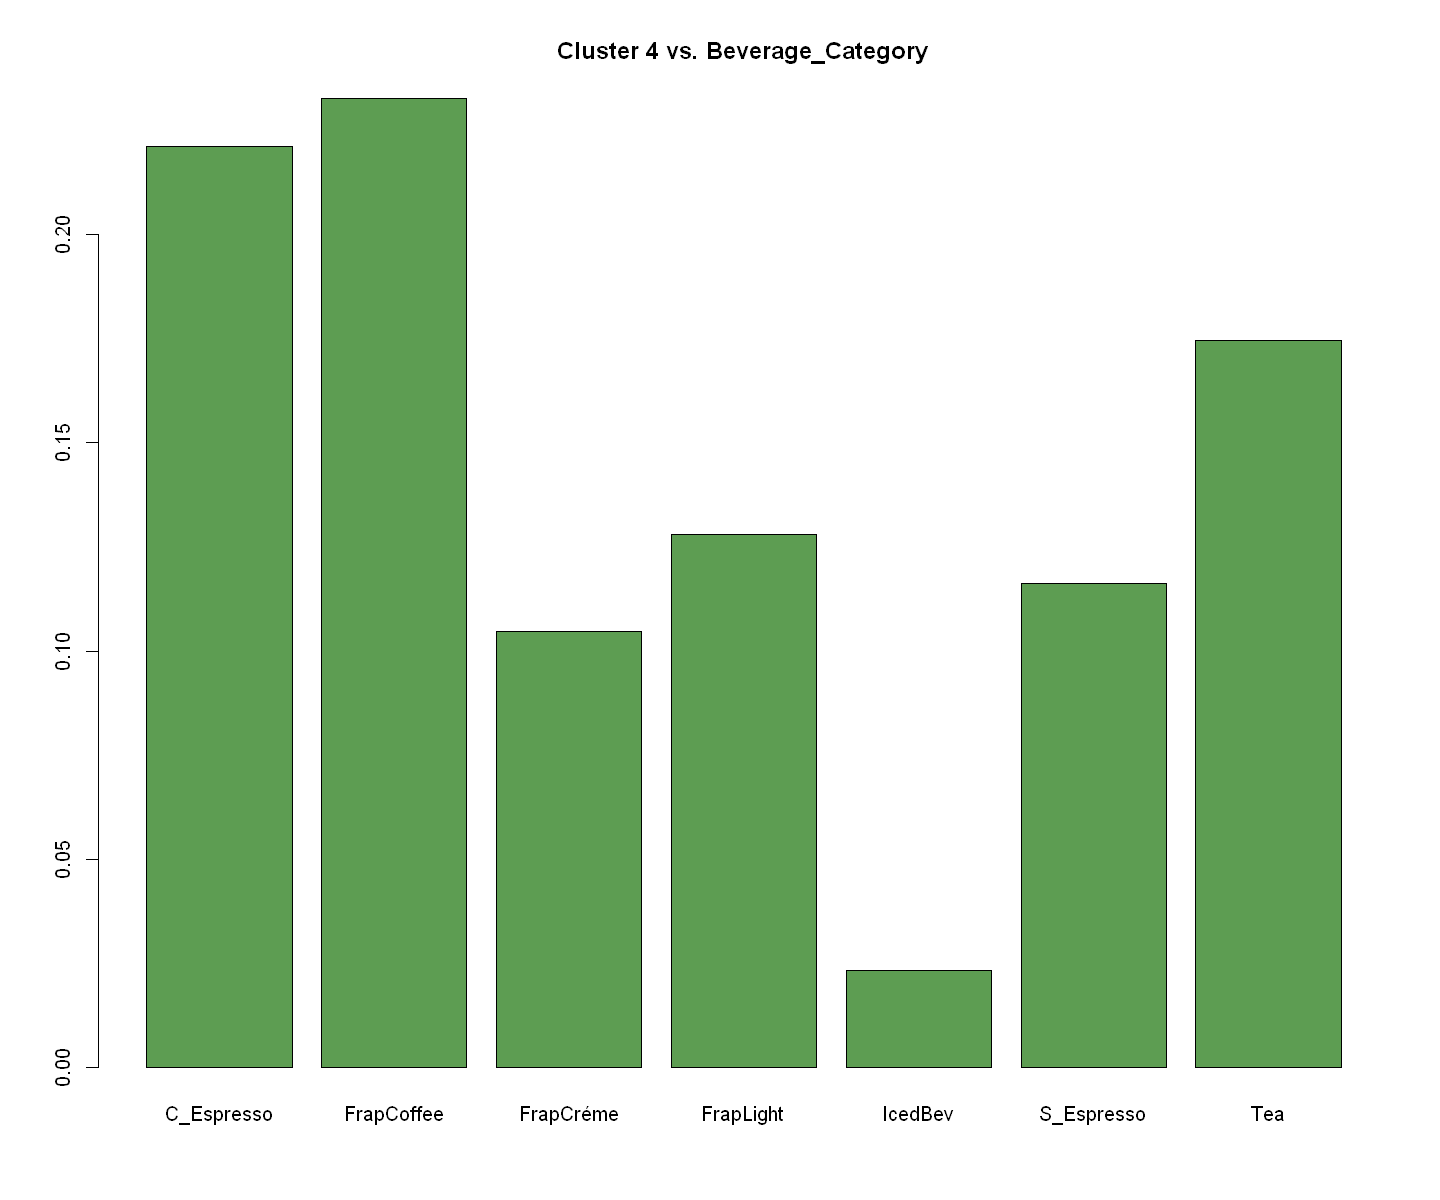

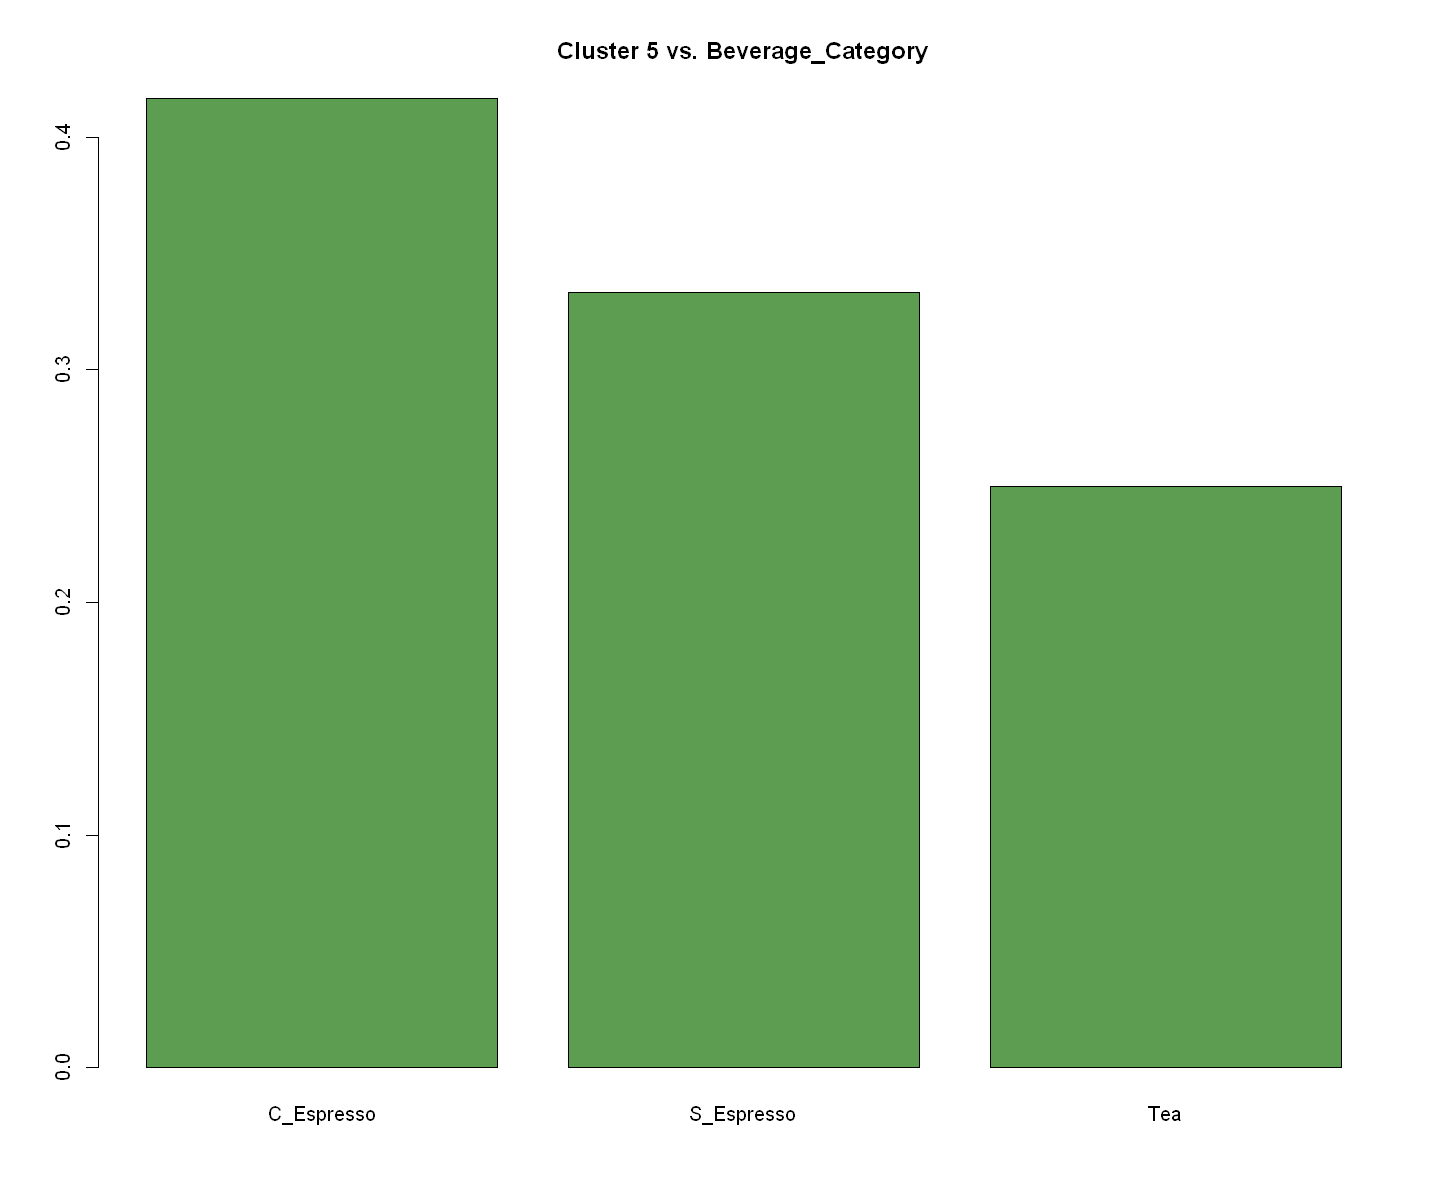

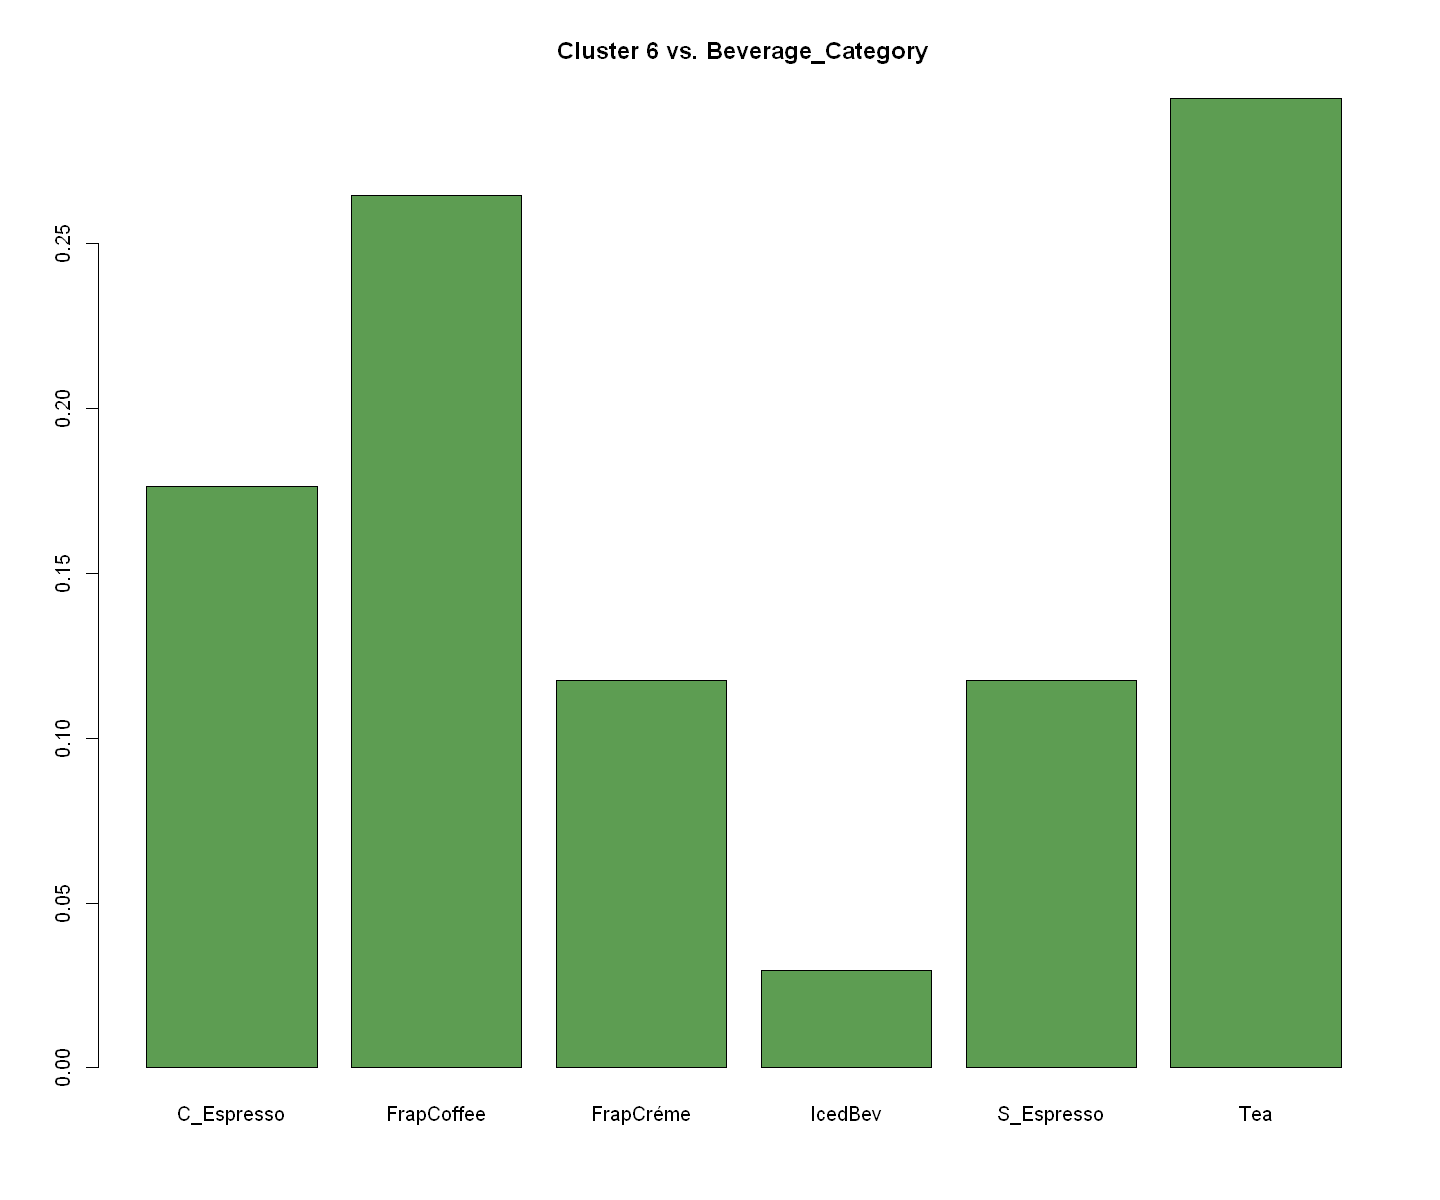

In [75]:
# Gráfico de barras de cada categoria de bebida, por cluster
barplot(prop.table(table(subset(starbucks,cluster==1)[,18])),main= "Cluster 1 vs. Beverage_Category",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==2)[,18])),main= "Cluster 2 vs. Beverage_Category",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==3)[,18])),main= "Cluster 3 vs. Beverage_Category",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==4)[,18])),main= "Cluster 4 vs. Beverage_Category",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==5)[,18])),main= "Cluster 5 vs. Beverage_Category",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==6)[,18])),main= "Cluster 6 vs. Beverage_Category",col="#5D9D52FF")

### Beverage_Prep

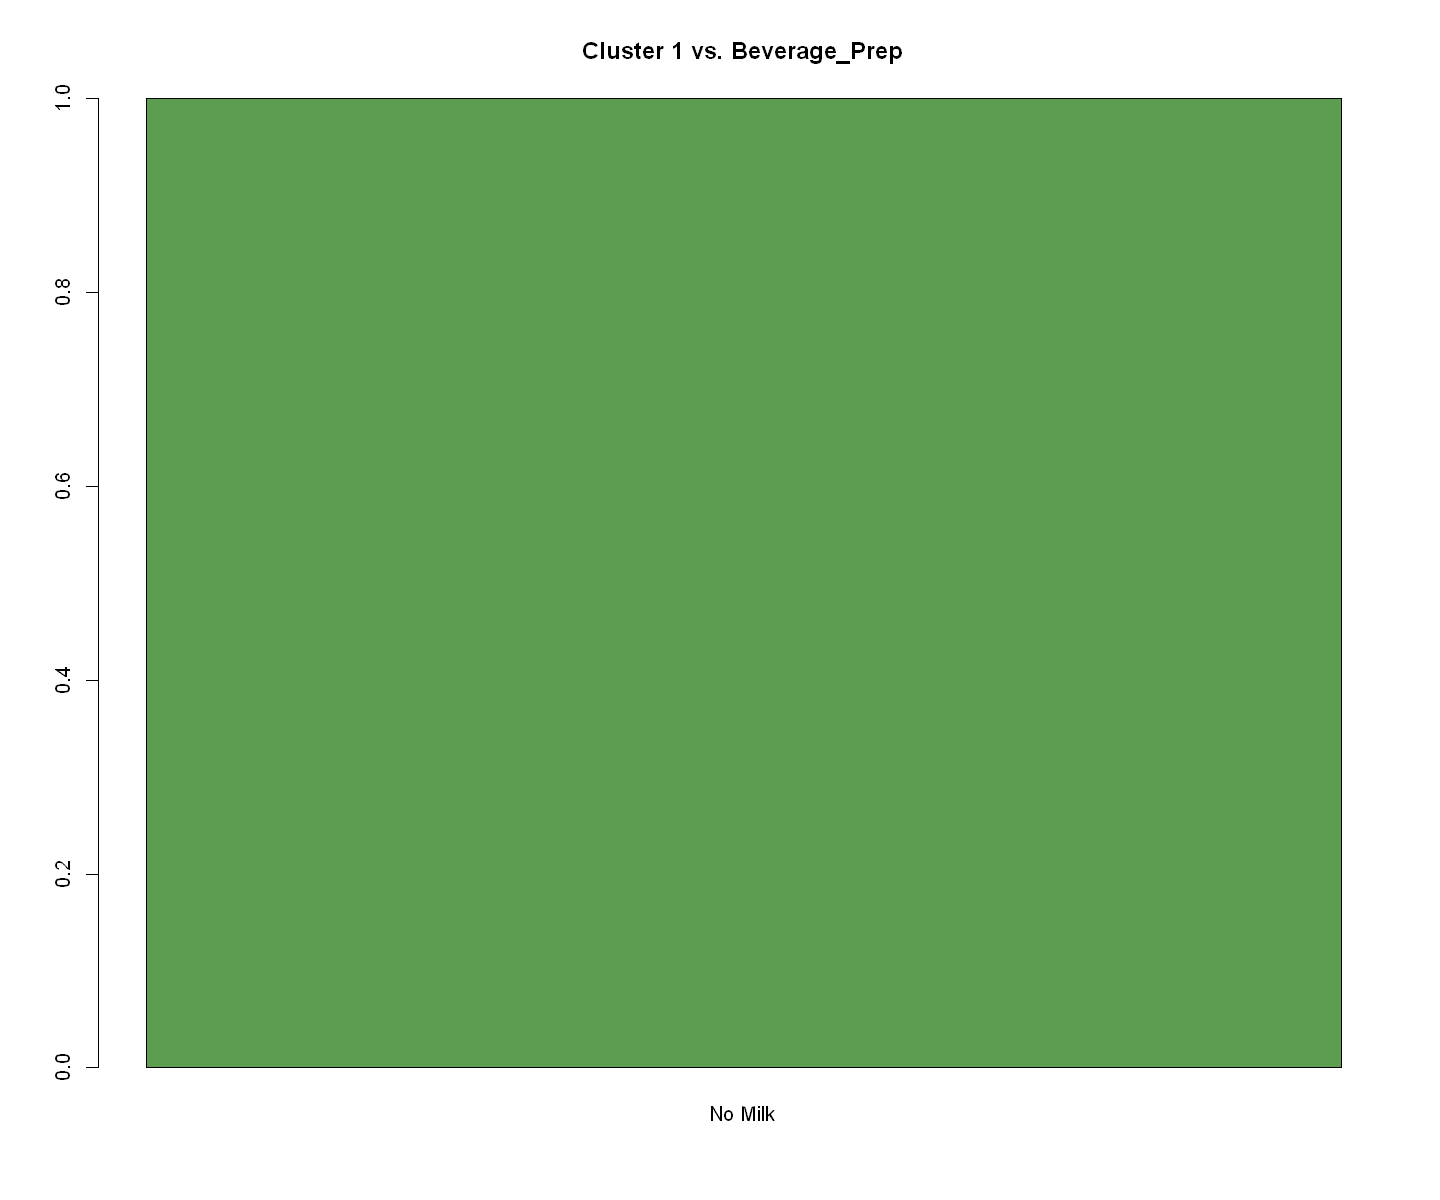

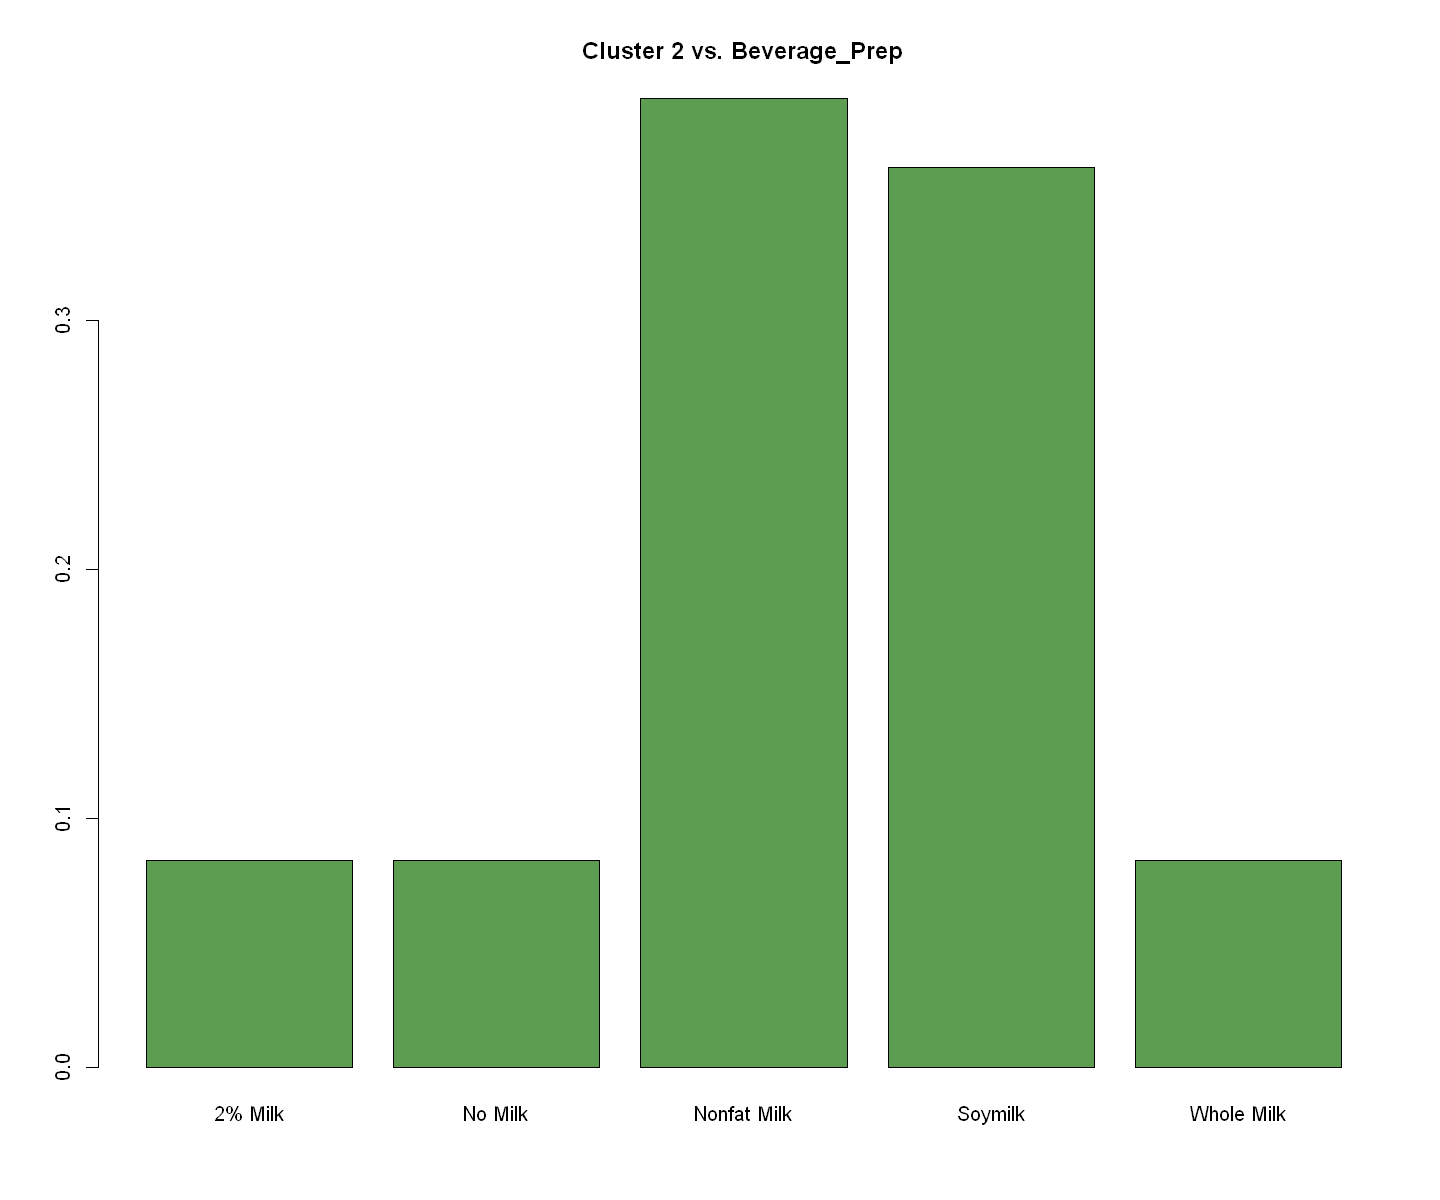

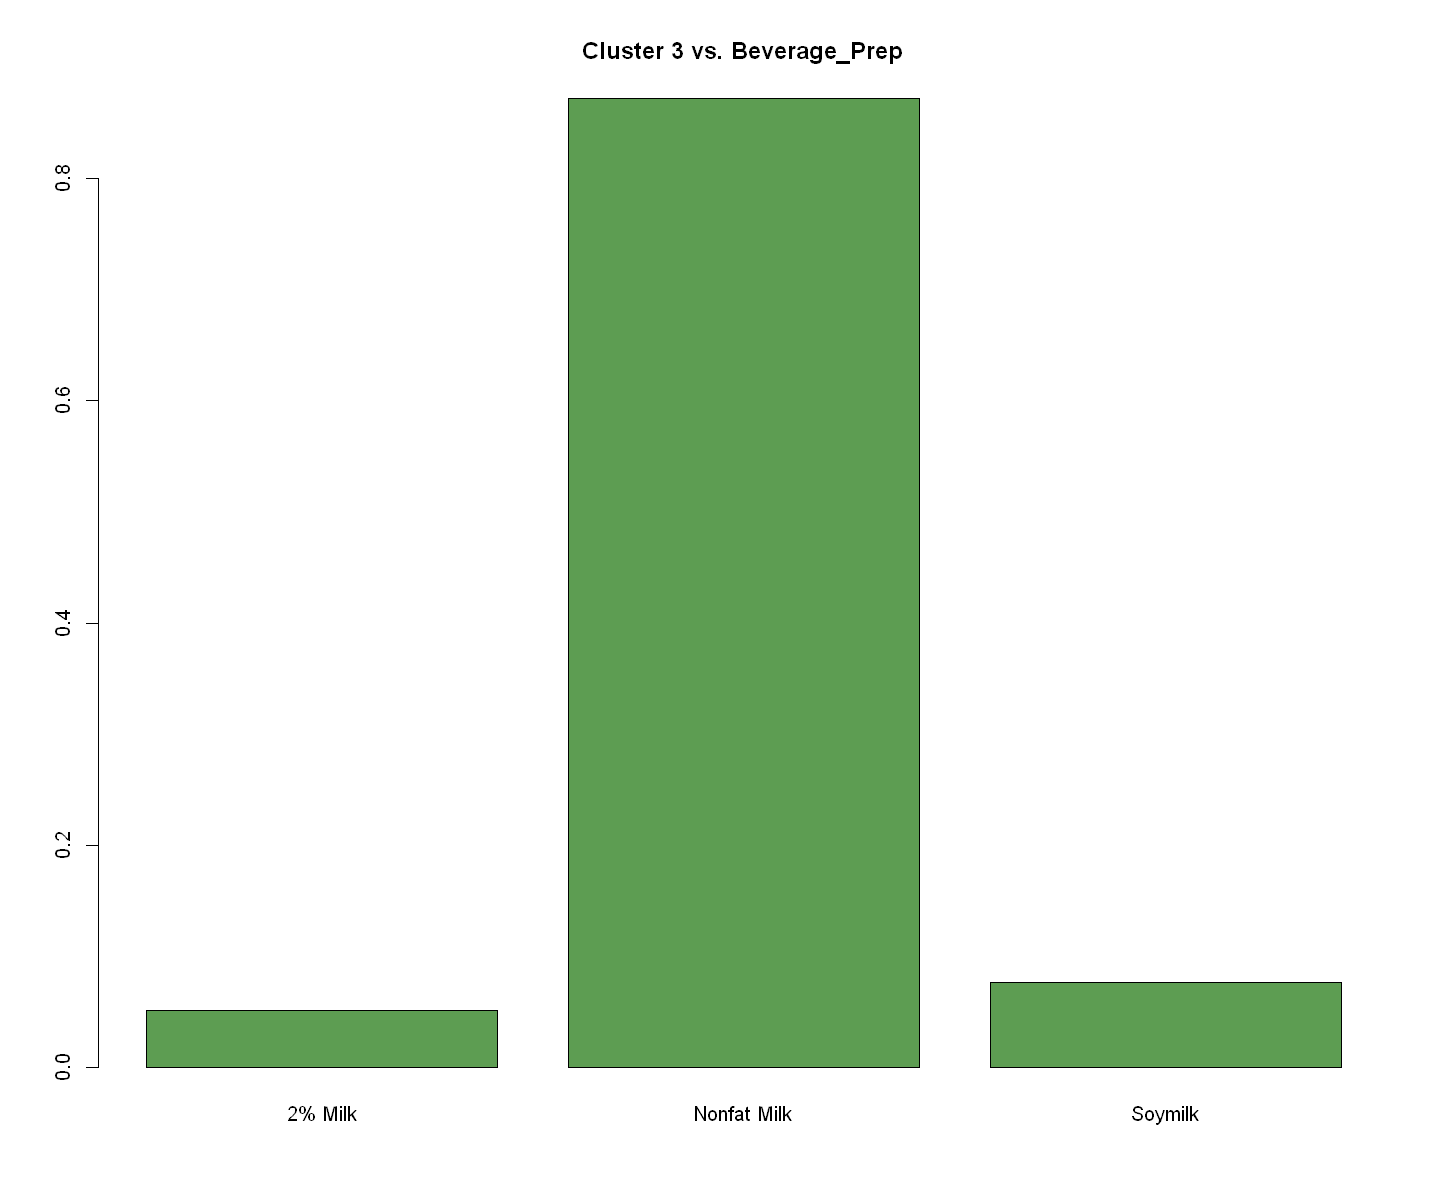

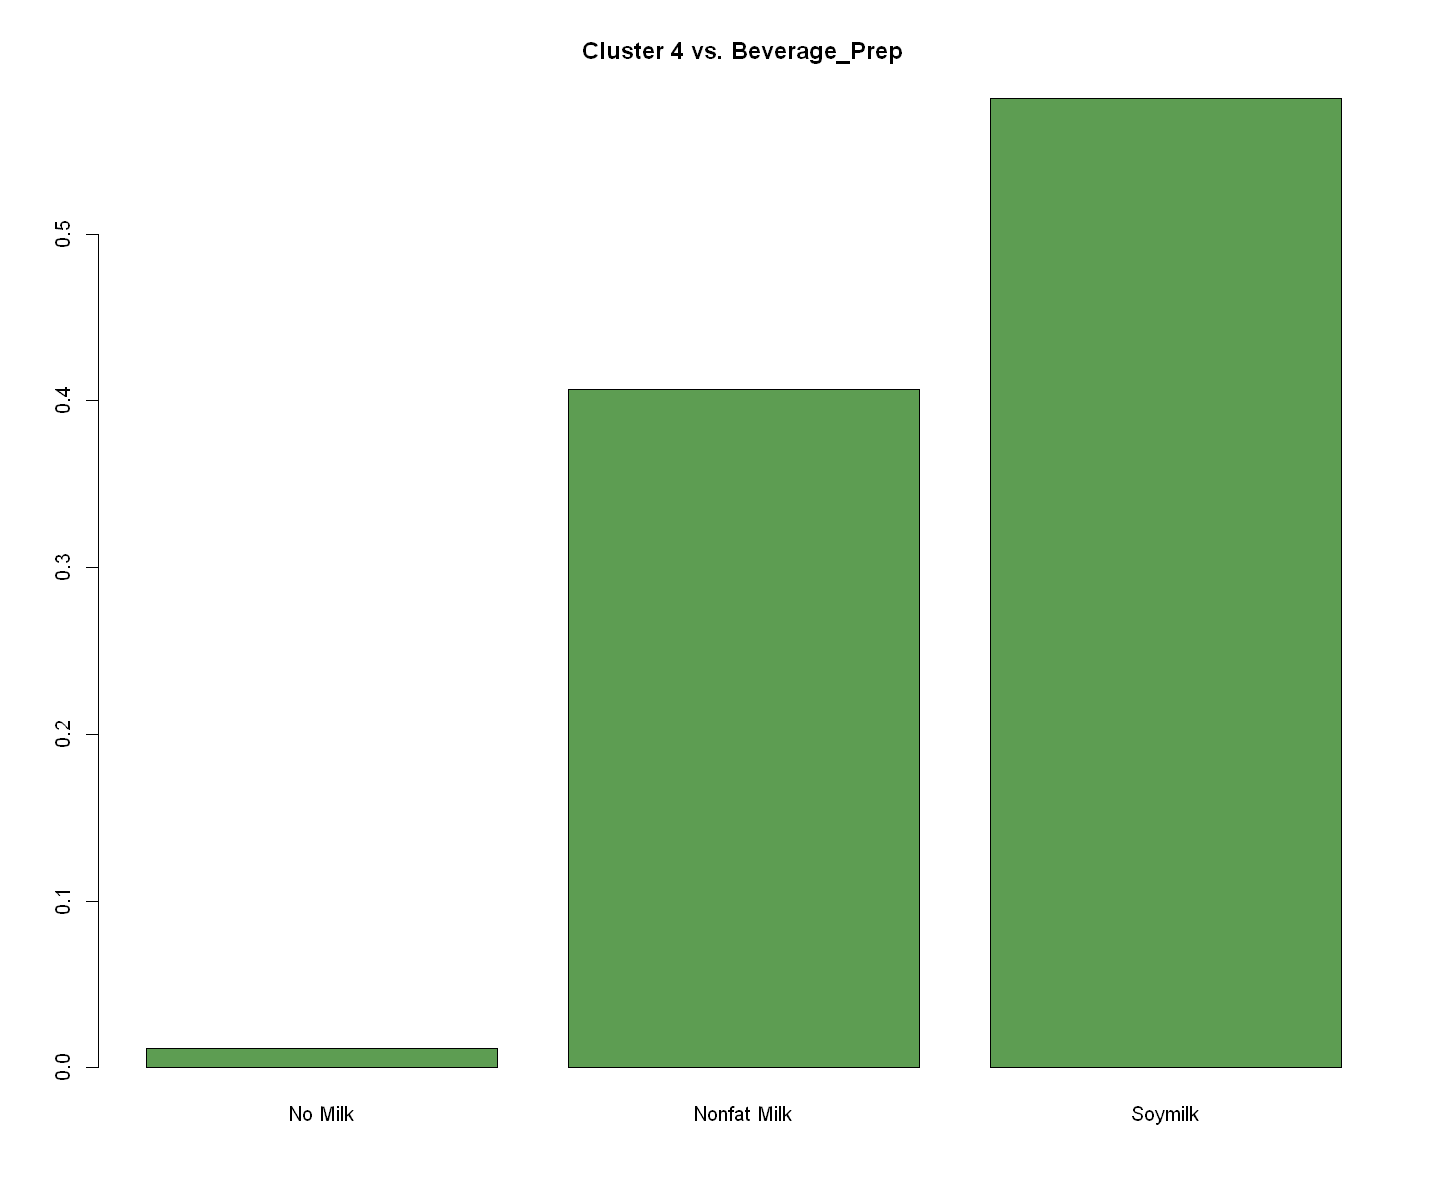

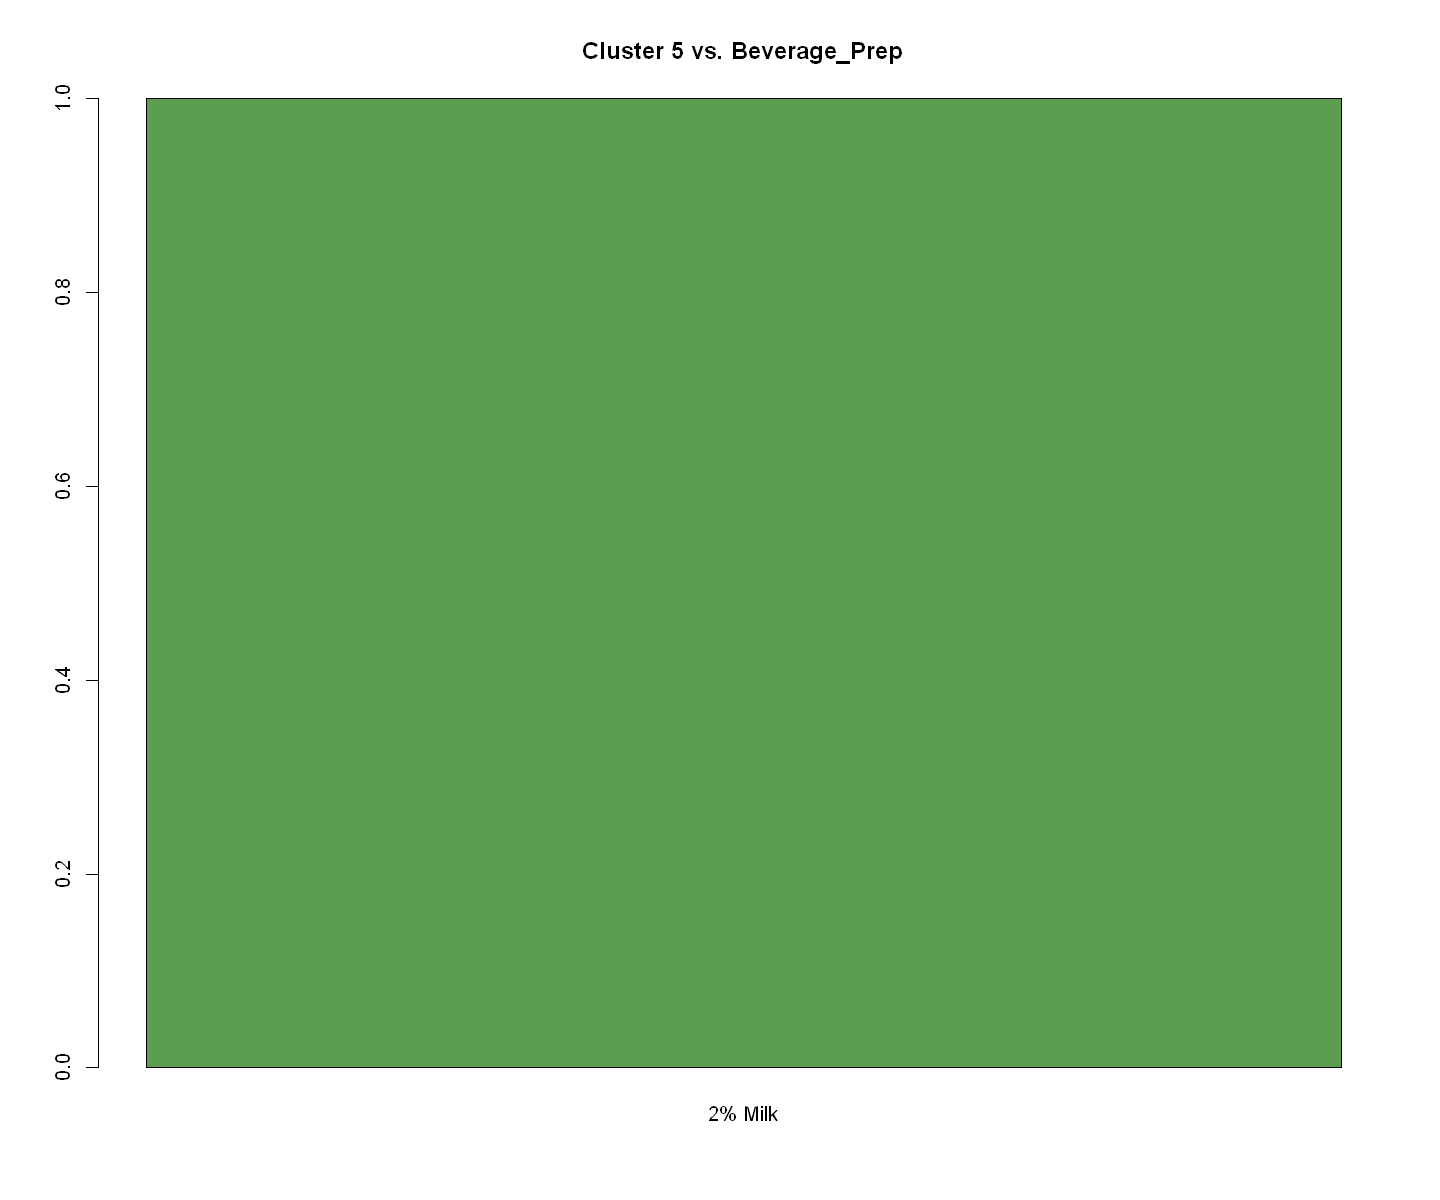

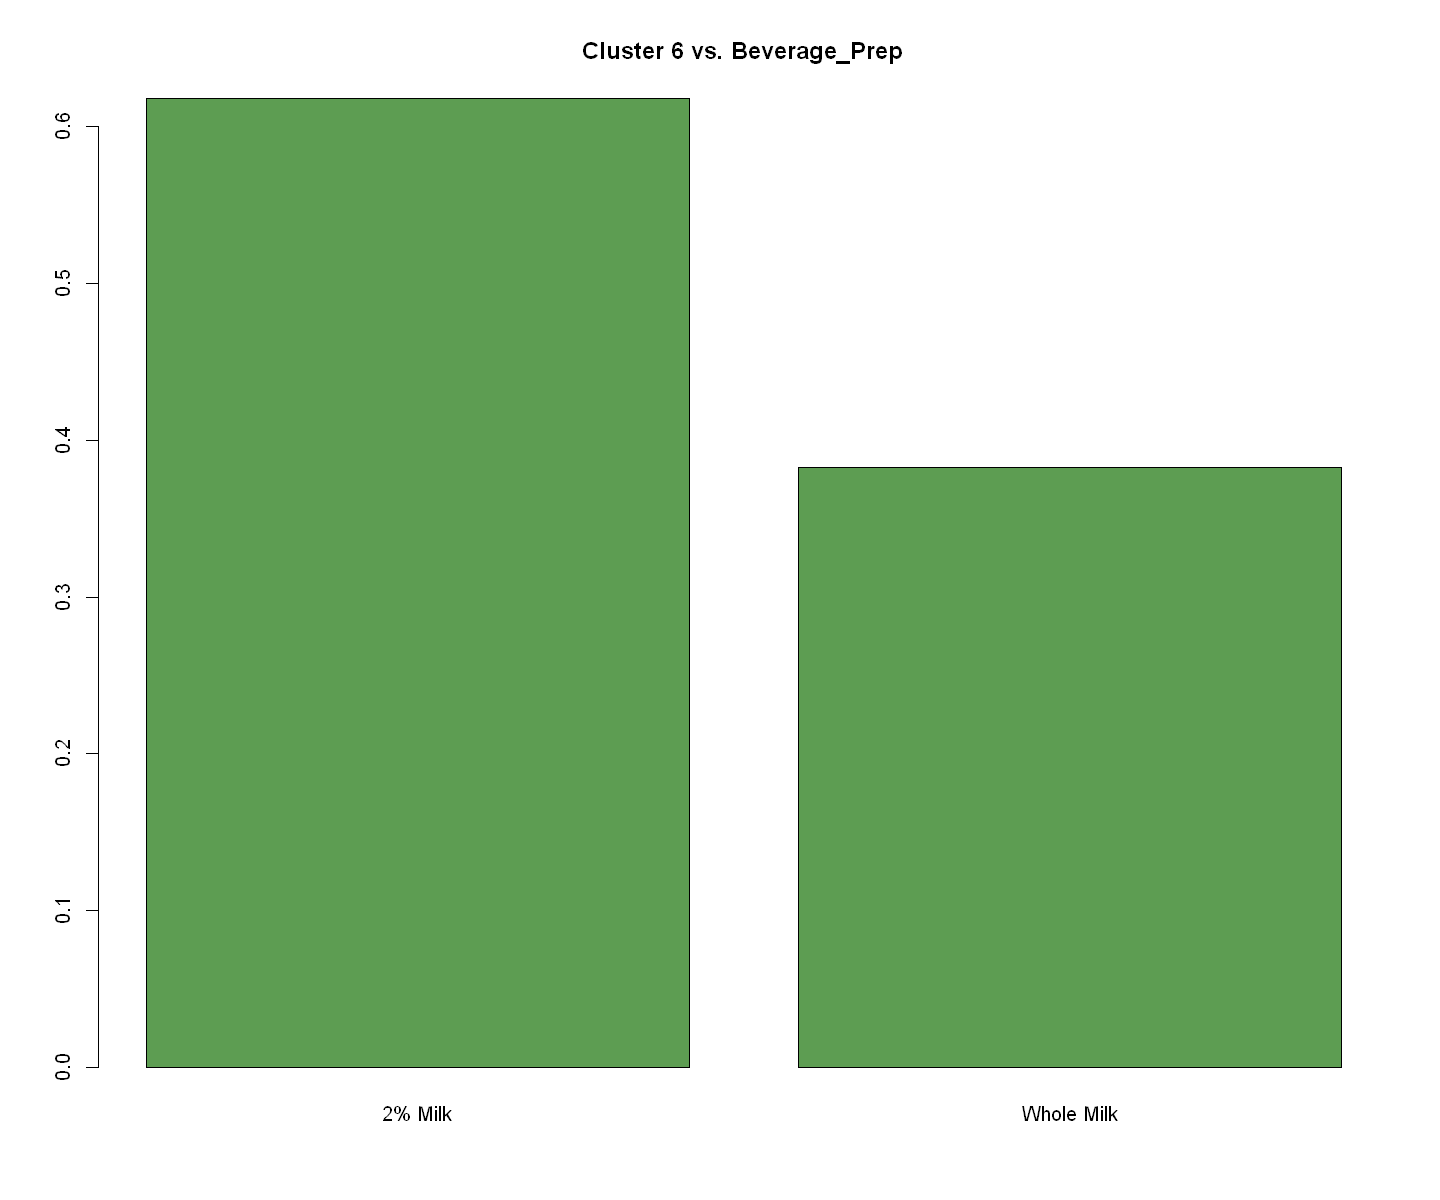

In [76]:
# Gráfico de barras de cada categoria de preparação de bebida, por cluster
options(repr.plot.width=12, repr.plot.height=10)
barplot(prop.table(table(subset(starbucks,cluster==1)[,2])),main= "Cluster 1 vs. Beverage_Prep",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==2)[,2])),main= "Cluster 2 vs. Beverage_Prep",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==3)[,2])),main= "Cluster 3 vs. Beverage_Prep",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==4)[,2])),main= "Cluster 4 vs. Beverage_Prep",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==5)[,2])),main= "Cluster 5 vs. Beverage_Prep",col="#5D9D52FF")
barplot(prop.table(table(subset(starbucks,cluster==6)[,2])),main= "Cluster 6 vs. Beverage_Prep",col="#5D9D52FF")

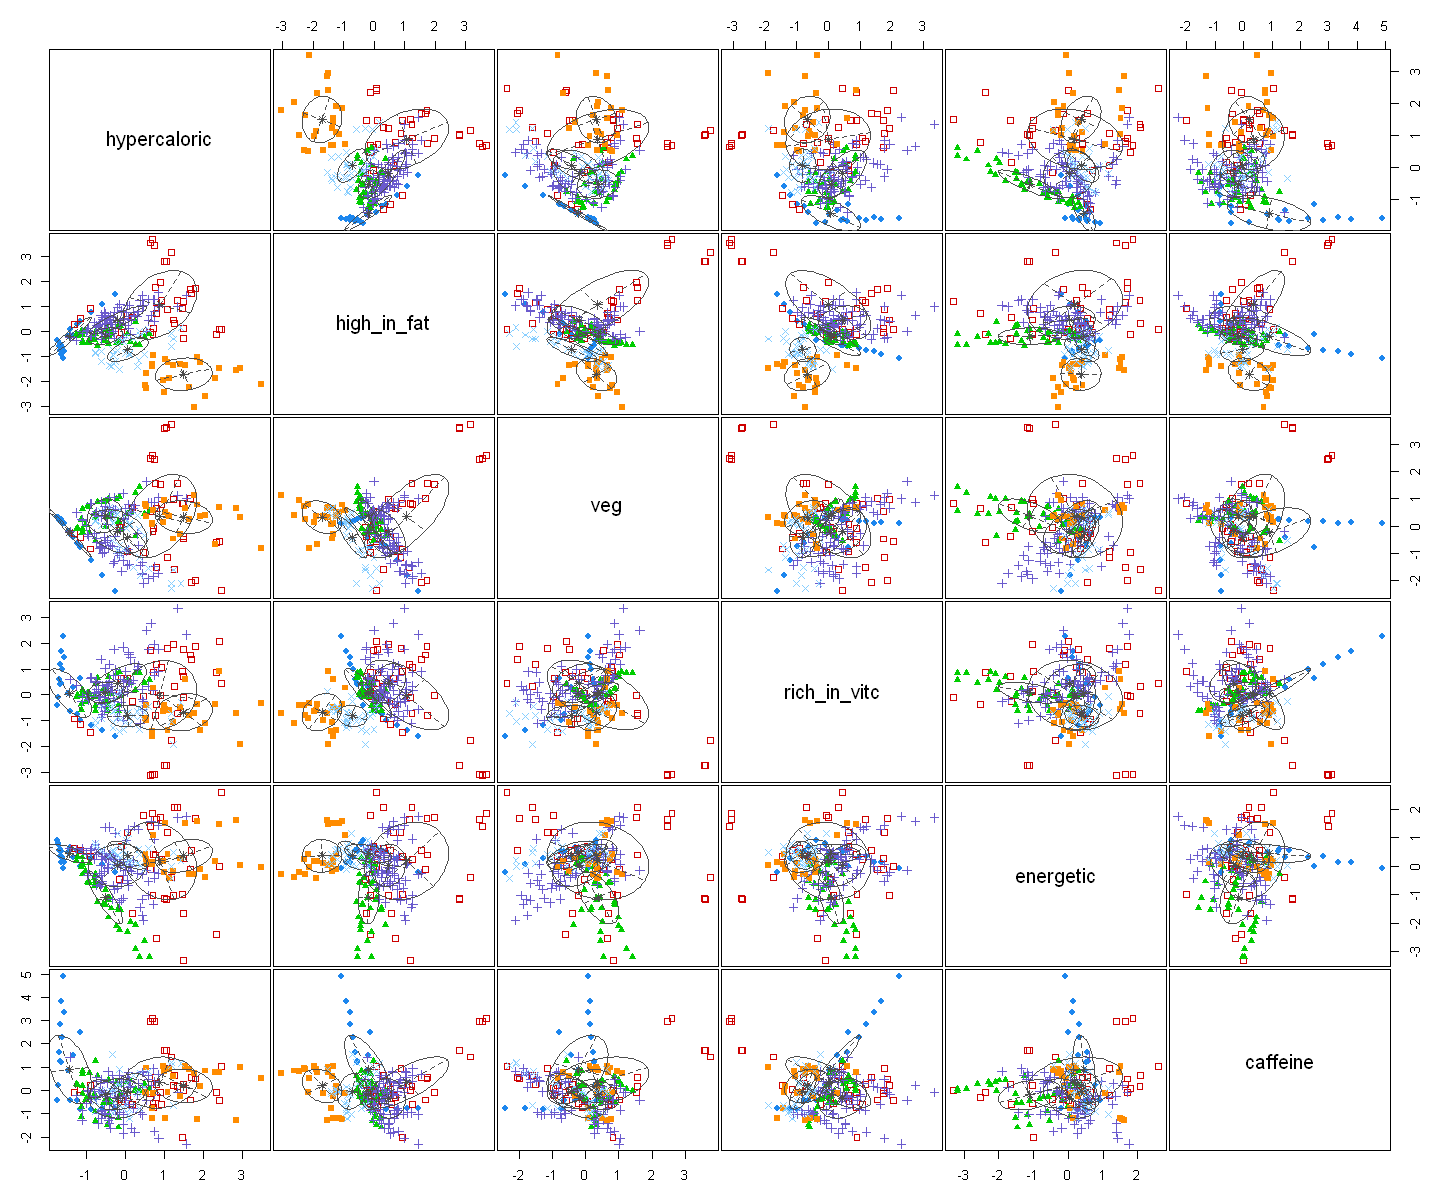

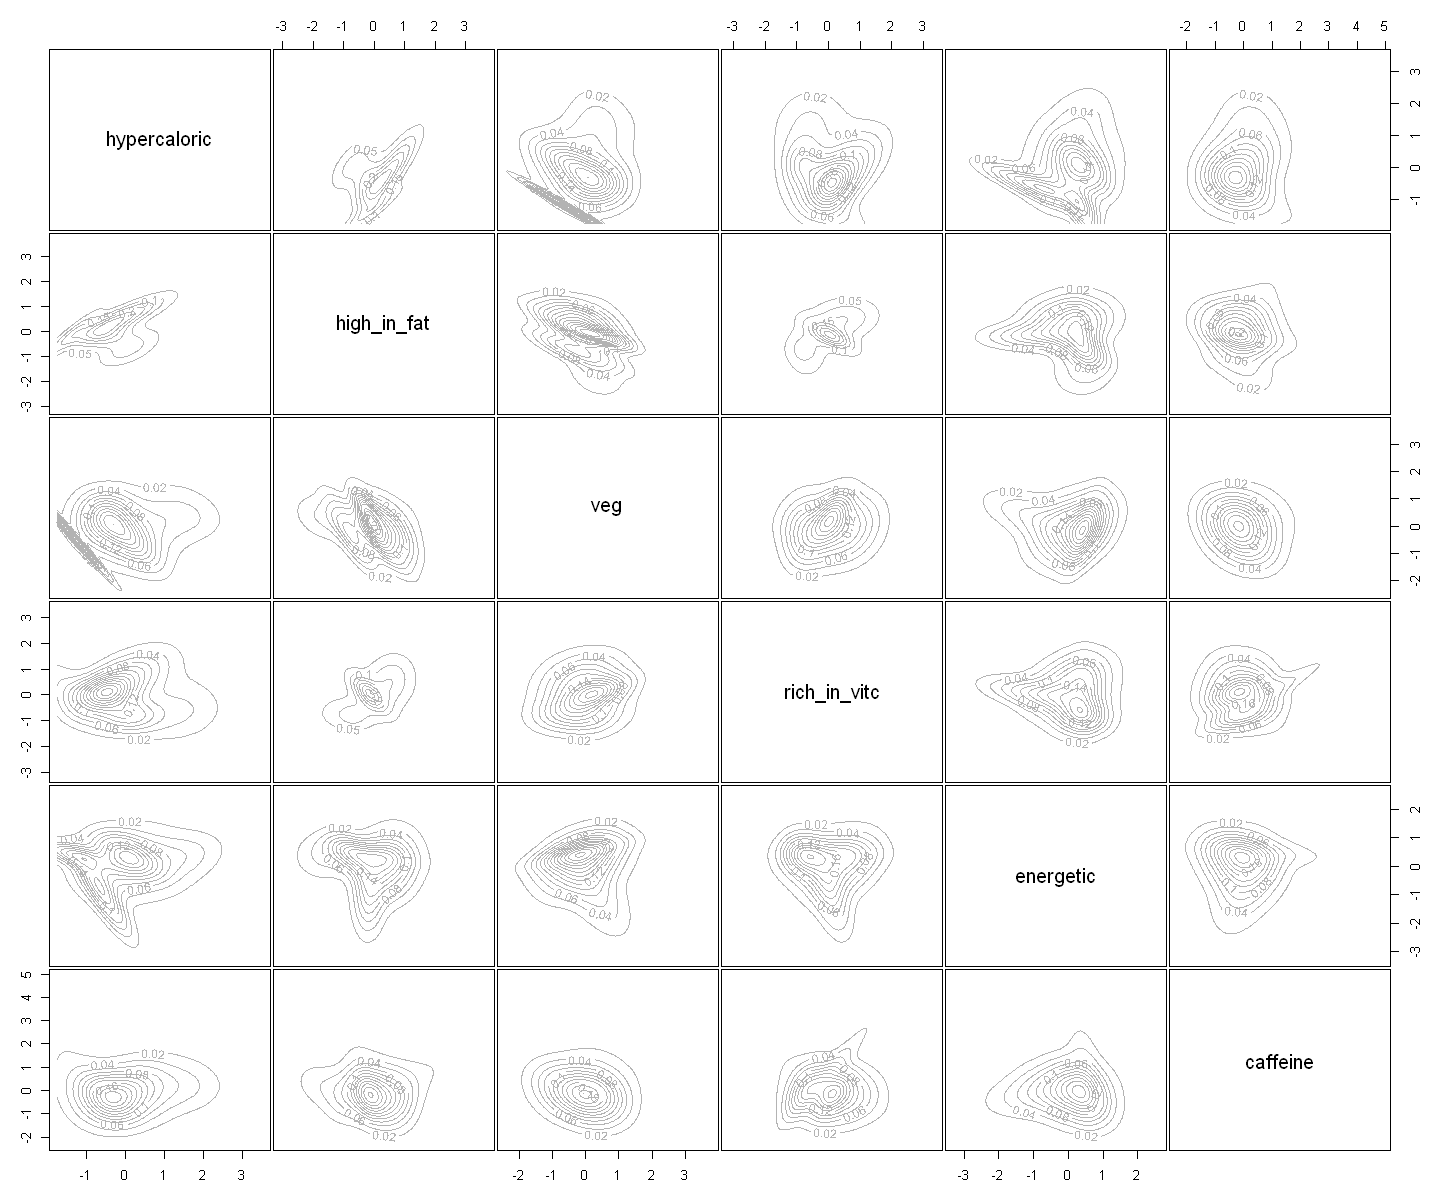

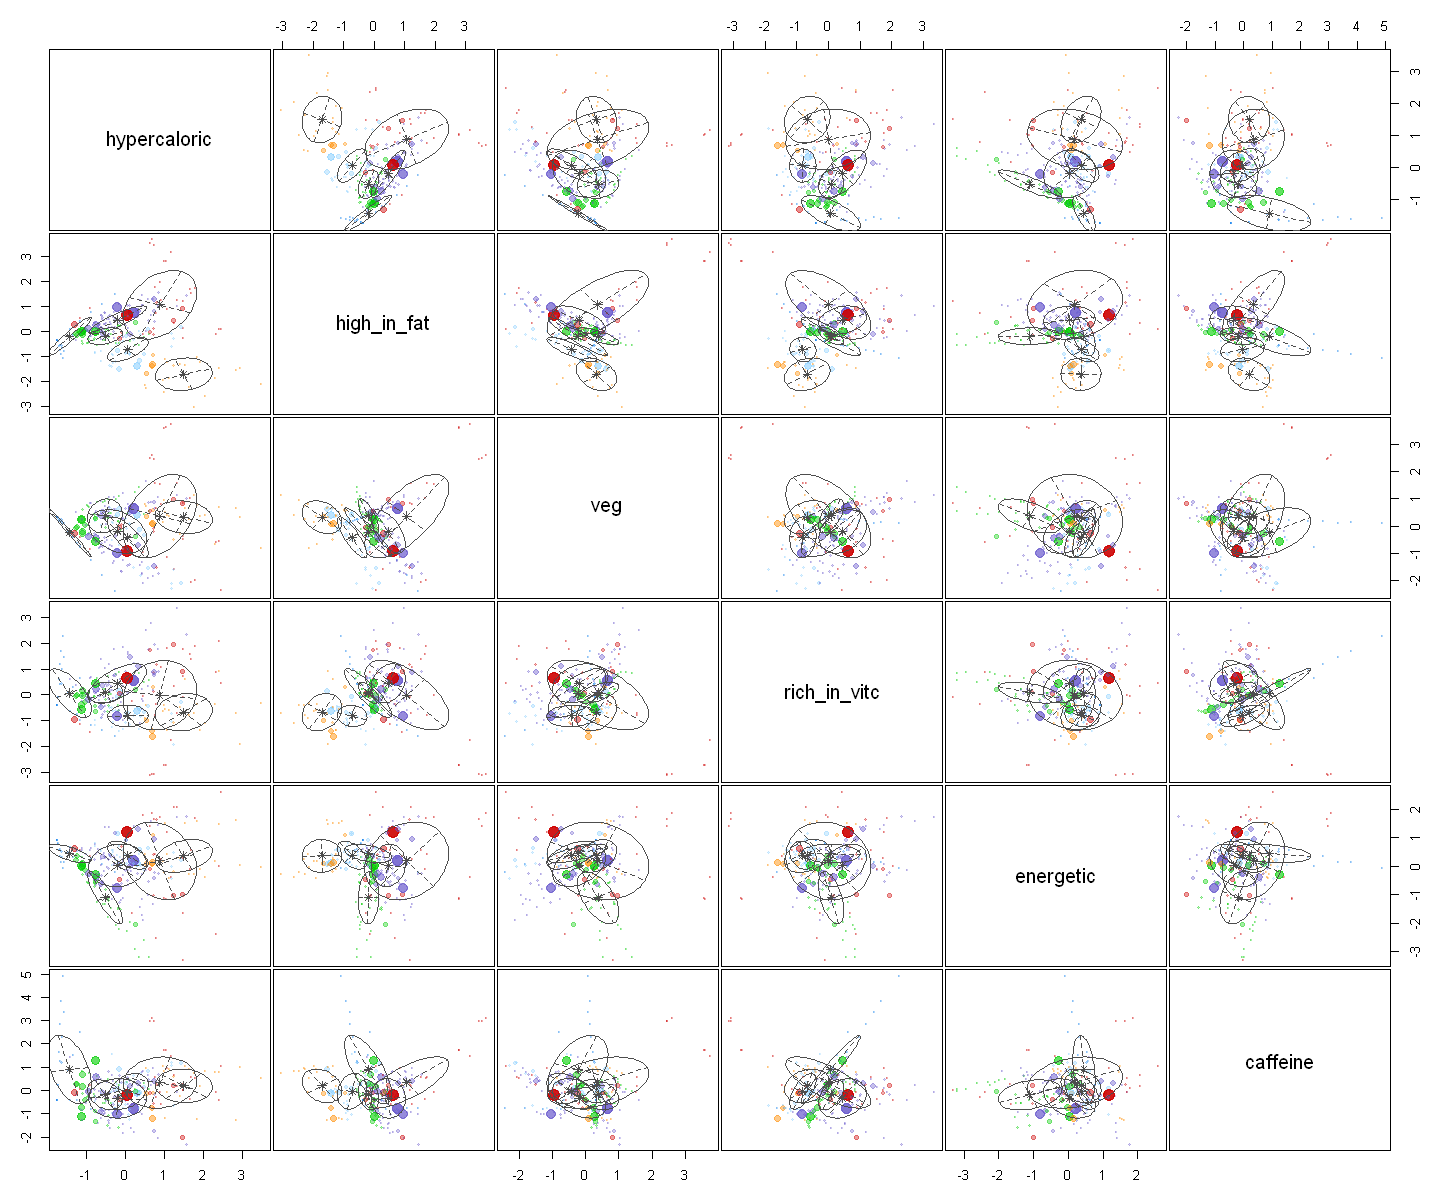

In [77]:
plot(results, what = "classification")
plot(results, what = "density")
plot(results, what = "uncertainty")